<a href="https://colab.research.google.com/github/JADE3624/Final_project/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load Dataset (CIFAR-10 as example)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define a Simple Baseline Model
def build_baseline_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Build the Model
baseline_model = build_baseline_model()

# Compile the Model
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the Model
history = baseline_model.fit(train_images, train_labels,
                             epochs=5,
                             batch_size=32,
                             validation_split=0.2)

# Evaluate the Model
test_loss, test_acc = baseline_model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


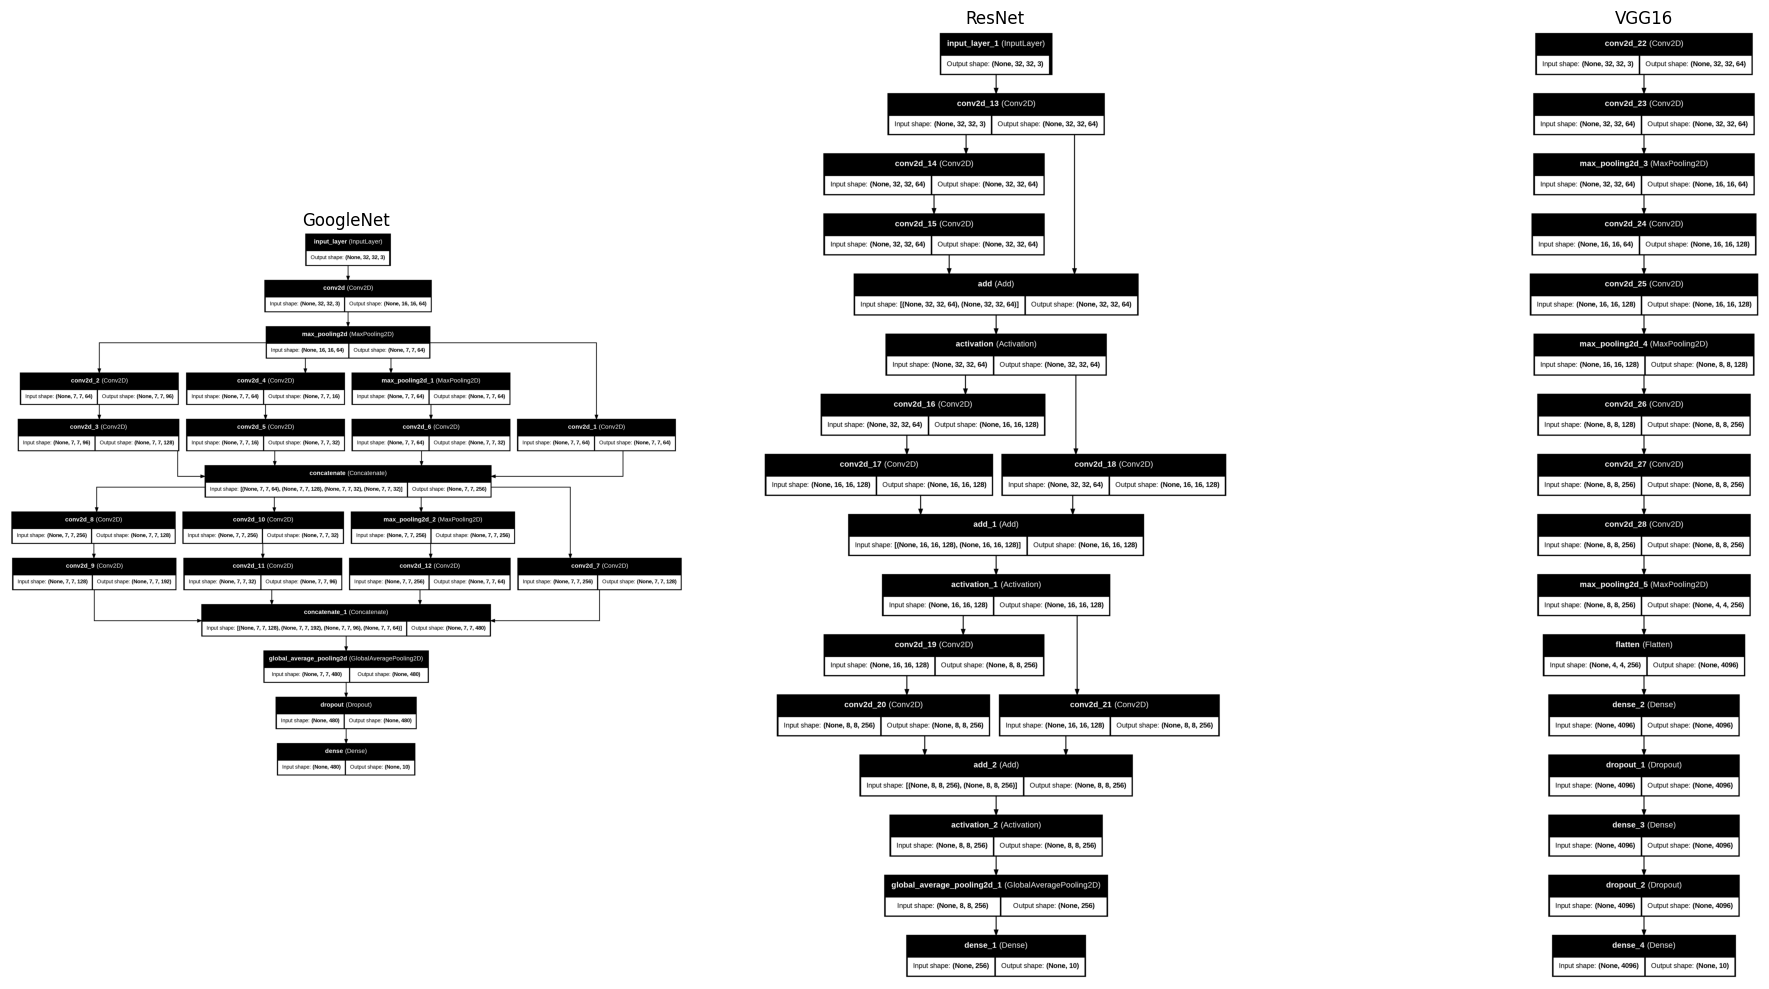

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define Inception Module for GoogleNet
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Architecture
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Generate models
googlenet = build_googlenet()
resnet = build_resnet()
vgg16 = build_vgg16()

# Save diagrams
plot_model(googlenet, to_file='googlenet.png', show_shapes=True, show_layer_names=True)
plot_model(resnet, to_file='resnet.png', show_shapes=True, show_layer_names=True)
plot_model(vgg16, to_file='vgg16.png', show_shapes=True, show_layer_names=True)

# Load images
googlenet_img = Image.open('googlenet.png')
resnet_img = Image.open('resnet.png')
vgg16_img = Image.open('vgg16.png')

# Plot images in one block
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(googlenet_img)
axes[0].axis('off')
axes[0].set_title('GoogleNet')

axes[1].imshow(resnet_img)
axes[1].axis('off')
axes[1].set_title('ResNet')

axes[2].imshow(vgg16_img)
axes[2].axis('off')
axes[2].set_title('VGG16')

plt.tight_layout()
plt.show()

# Clean up temporary files
os.remove('googlenet.png')
os.remove('resnet.png')
os.remove('vgg16.png')


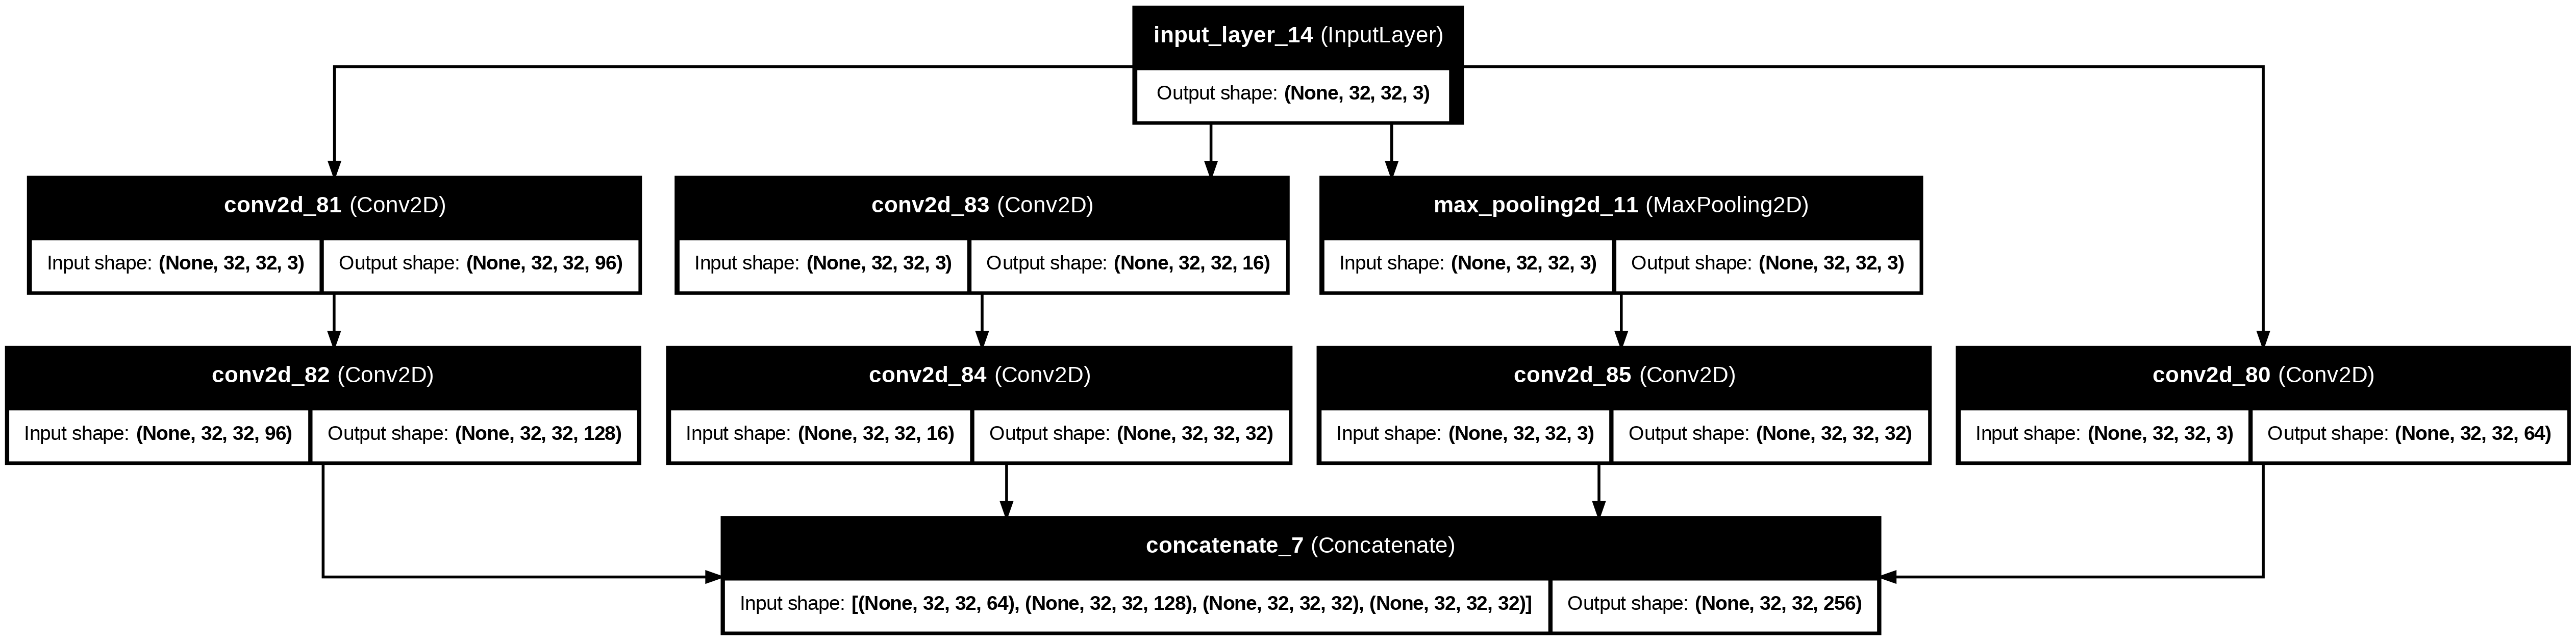

In [ ]:
from tensorflow import keras
from keras.utils import plot_model
from keras import layers, models

# ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Generate ResNet Block Diagram
inputs_resnet = layers.Input(shape=(32, 32, 3))
x_resnet = layers.Conv2D(64, (1, 1), padding='same')(inputs_resnet)
outputs_resnet = resnet_block(x_resnet, 64)
resnet_model = models.Model(inputs=inputs_resnet, outputs=outputs_resnet)
plot_model(resnet_model, to_file='resnet_block.png', show_shapes=True, show_layer_names=True)

# Generate Inception Module Diagram
inputs_inception = layers.Input(shape=(32, 32, 3))
outputs_inception = inception_module(inputs_inception, [64, 96, 128, 16, 32, 32])
inception_model = models.Model(inputs=inputs_inception, outputs=outputs_inception)
plot_model(inception_model, to_file='inception_module.png', show_shapes=True, show_layer_names=True)

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# Function to add text to an image
def annotate_image(image_path, text, position, output_path, font_size=20):
    # Open the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    # Add text to the image
    draw.text(position, text, font=font, fill="red")

    # Save the annotated image
    image.save(output_path)

# Annotate ResNet Block Diagram
annotate_image(
    image_path='resnet_block.png',
    text='ResNet Block',
    position=(10, 10),  # (x, y) coordinates for the text
    output_path='resnet_block_annotated.png'
)

# Annotate Inception Module Diagram
annotate_image(
    image_path='inception_module.png',
    text='Inception Module',
    position=(10, 10),  # (x, y) coordinates for the text
    output_path='inception_module_annotated.png'
)

In [ ]:
import graphviz

# Create a Graphviz Digraph object
graph = graphviz.Digraph(format='png', graph_attr={'rankdir': 'LR'})  # Left-to-right layout

# Define nodes with custom styles
graph.node('Input', label='Input\n(32, 32, 3)', shape='box', style='filled', fillcolor='lightblue', fontcolor='black')
graph.node('Conv3x3_1', label='Conv2D\n(3x3, 64)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('Conv3x3_2', label='Conv2D\n(3x3, 64)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('Shortcut', label='Conv2D\n(1x1, 64)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('Add', label='Add', shape='circle', style='filled', fillcolor='lightgreen', fontcolor='black')
graph.node('ReLU', label='ReLU', shape='box', style='filled', fillcolor='yellow', fontcolor='black')

# Define edges
graph.edge('Input', 'Conv3x3_1')
graph.edge('Conv3x3_1', 'Conv3x3_2')
graph.edge('Conv3x3_2', 'Add')
graph.edge('Input', 'Shortcut')
graph.edge('Shortcut', 'Add')
graph.edge('Add', 'ReLU')

# Render the graph
graph.render('resnet_block_attractive_2', cleanup=True)

'resnet_block_attractive_2.png'

In [ ]:
import graphviz

# Create a Graphviz Digraph object
graph = graphviz.Digraph(format='png', graph_attr={'rankdir': 'LR'})  # Left-to-right layout

# Define nodes with custom styles
graph.node('Input', label='Input\n(32, 32, 3)', shape='box', style='filled', fillcolor='lightblue', fontcolor='black')
graph.node('Conv1x1_1', label='Conv2D\n(1x1, 64)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('Conv1x1_2', label='Conv2D\n(1x1, 96)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('Conv3x3', label='Conv2D\n(3x3, 128)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('Conv1x1_3', label='Conv2D\n(1x1, 16)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('Conv5x5', label='Conv2D\n(5x5, 32)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('MaxPool', label='MaxPooling2D\n(3x3)', shape='box', style='filled', fillcolor='purple', fontcolor='white')
graph.node('Conv1x1_4', label='Conv2D\n(1x1, 32)', shape='box', style='filled', fillcolor='orange', fontcolor='black')
graph.node('Concat', label='Concatenate', shape='circle', style='filled', fillcolor='lightgreen', fontcolor='black')

# Define edges
graph.edge('Input', 'Conv1x1_1')
graph.edge('Input', 'Conv1x1_2')
graph.edge('Conv1x1_2', 'Conv3x3')
graph.edge('Input', 'Conv1x1_3')
graph.edge('Conv1x1_3', 'Conv5x5')
graph.edge('Input', 'MaxPool')
graph.edge('MaxPool', 'Conv1x1_4')
graph.edge('Conv1x1_1', 'Concat')
graph.edge('Conv3x3', 'Concat')
graph.edge('Conv5x5', 'Concat')
graph.edge('Conv1x1_4', 'Concat')

# Render the graph
graph.render('inception_module_attractive_2', cleanup=True)

'inception_module_attractive_2.png'

In [ ]:
import graphviz

# Create a Graphviz Digraph object
graph = graphviz.Digraph(format='png', graph_attr={'rankdir': 'LR'})  # Left-to-right layout

# Define nodes with custom styles
graph.node('Input', label='Input', shape='box', style='filled', fillcolor='lightblue')
graph.node('Conv1', label='Conv2D\n(3x3)', shape='box', style='filled', fillcolor='orange')
graph.node('BN1', label='BatchNorm', shape='box', style='filled', fillcolor='yellow')
graph.node('ReLU1', label='ReLU', shape='box', style='filled', fillcolor='yellow')
graph.node('Conv2', label='Conv2D\n(3x3)', shape='box', style='filled', fillcolor='orange')
graph.node('BN2', label='BatchNorm', shape='box', style='filled', fillcolor='yellow')
graph.node('Add', label='Add (Skip Connection)', shape='circle', style='filled', fillcolor='lightgreen')
graph.node('ReLU2', label='ReLU', shape='box', style='filled', fillcolor='yellow')
graph.node('Shortcut', label='Shortcut\n(optional 1x1 Conv)', shape='box', style='dotted', fillcolor='grey')

# Define edges
graph.edge('Input', 'Conv1')
graph.edge('Conv1', 'BN1')
graph.edge('BN1', 'ReLU1')
graph.edge('ReLU1', 'Conv2')
graph.edge('Conv2', 'BN2')
graph.edge('BN2', 'Add')
graph.edge('Input', 'Shortcut', style='dashed')  # Skip connection
graph.edge('Shortcut', 'Add', style='dashed')  # If dimensions differ
graph.edge('Add', 'ReLU2')

# Render the graph
graph.render('resnet_block_@', cleanup=True)


'resnet_block_@.png'

In [ ]:
import graphviz

# Create a Graphviz Digraph object
graph = graphviz.Digraph(format='png', graph_attr={'rankdir': 'LR'})  # Left-to-right layout

# Define nodes for the Inception module
graph.node('Input', label='Input', shape='box', style='filled', fillcolor='lightblue')
graph.node('Conv1x1_1', label='Conv2D\n(1x1, filters[0])', shape='box', style='filled', fillcolor='orange')
graph.node('Conv1x1_2', label='Conv2D\n(1x1, filters[1])', shape='box', style='filled', fillcolor='orange')
graph.node('Conv3x3', label='Conv2D\n(3x3, filters[2])', shape='box', style='filled', fillcolor='orange')
graph.node('Conv1x1_3', label='Conv2D\n(1x1, filters[3])', shape='box', style='filled', fillcolor='orange')
graph.node('Conv5x5', label='Conv2D\n(5x5, filters[4])', shape='box', style='filled', fillcolor='orange')
graph.node('MaxPool', label='MaxPooling2D\n(3x3)', shape='box', style='filled', fillcolor='purple')
graph.node('Conv1x1_4', label='Conv2D\n(1x1, filters[5])', shape='box', style='filled', fillcolor='orange')
graph.node('Concat', label='Concatenate', shape='circle', style='filled', fillcolor='lightgreen')

# Define edges between nodes to represent the data flow
graph.edge('Input', 'Conv1x1_1')       # First 1x1 convolution
graph.edge('Input', 'Conv1x1_2')       # Second 1x1 convolution
graph.edge('Conv1x1_2', 'Conv3x3')     # 3x3 convolution after 1x1
graph.edge('Input', 'Conv1x1_3')       # Third 1x1 convolution
graph.edge('Conv1x1_3', 'Conv5x5')     # 5x5 convolution after 1x1
graph.edge('Input', 'MaxPool')         # MaxPooling directly from input
graph.edge('MaxPool', 'Conv1x1_4')     # 1x1 convolution after MaxPooling
graph.edge('Conv1x1_1', 'Concat')      # All paths merged into Concatenate
graph.edge('Conv3x3', 'Concat')
graph.edge('Conv5x5', 'Concat')
graph.edge('Conv1x1_4', 'Concat')

# Render the graph
graph.render('inception_module@', cleanup=True)


'inception_module@.png'

In [ ]:
from tensorflow import keras
from keras.utils import plot_model
from keras import layers, models
import pydot
from IPython.display import SVG

# ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Generate ResNet Block Diagram
inputs_resnet = layers.Input(shape=(32, 32, 3))
x_resnet = layers.Conv2D(64, (1, 1), padding='same')(inputs_resnet)
outputs_resnet = resnet_block(x_resnet, 64)
resnet_model = models.Model(inputs=inputs_resnet, outputs=outputs_resnet)

# Save ResNet Block as .dot file
pydot_graph = pydot.Dot(graph_type='digraph', rankdir='LR')
pydot_graph = keras.utils.model_to_dot(resnet_model, show_shapes=True, show_layer_names=True, rankdir='LR')
pydot_graph.write_dot('resnet_block.dot')

# Generate Inception Module Diagram
inputs_inception = layers.Input(shape=(32, 32, 3))
outputs_inception = inception_module(inputs_inception, [64, 96, 128, 16, 32, 32])
inception_model = models.Model(inputs=inputs_inception, outputs=outputs_inception)

# Save Inception Module as .dot file
pydot_graph = pydot.Dot(graph_type='digraph', rankdir='LR')
pydot_graph = keras.utils.model_to_dot(inception_model, show_shapes=True, show_layer_names=True, rankdir='LR')
pydot_graph.write_dot('inception_module.dot')

In [ ]:
import graphviz

# Function to customize and render a .dot file
def render_dot_file(dot_file, output_file, colors=None):
    # Load the .dot file
    with open(dot_file, 'r') as file:
        dot_data = file.read()

    # Create a Graphviz Digraph object
    graph = graphviz.Digraph()

    # Parse the .dot file content and add nodes/edges to the Digraph
    for line in dot_data.splitlines():
        if '->' in line:  # Edge
            parts = line.split('->')
            src = parts[0].strip()
            dst = parts[1].split('[')[0].strip()
            graph.edge(src, dst)
        elif '[' in line and ']' in line:  # Node
            node_name = line.split('[')[0].strip()
            graph.node(node_name)

    # Apply custom colors if provided
    if colors:
        graph.attr('node', style='filled', fillcolor=colors.get('node_fill', 'lightblue'), fontcolor=colors.get('node_font', 'black'))
        graph.attr('edge', color=colors.get('edge_color', 'gray'))

    # Render the graph
    graph.render(output_file, format='png', cleanup=True)

# Define colors for customization
colors = {
    'node_fill': 'lightblue',  # Node background color
    'node_font': 'black',      # Node text color
    'edge_color': 'gray'       # Edge color
}

# Render ResNet Block Diagram
render_dot_file('resnet_block.dot', 'resnet_block_sideways', colors)

# Render Inception Module Diagram
render_dot_file('inception_module.dot', 'inception_module_sideways', colors)

# VGG WITH CIFAR



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.2935 - loss: 1.8743 - val_accuracy: 0.5204 - val_loss: 1.2990
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.5643 - loss: 1.1951 - val_accuracy: 0.6622 - val_loss: 0.9472
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.6738 - loss: 0.9149 - val_accuracy: 0.7178 - val_loss: 0.7962
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7394 - loss: 0.7394 - val_accuracy: 0.7556 - val_loss: 0.7042
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.7907 - loss: 0.6000 - val_accuracy: 0.7670 - val_loss: 0.6703
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.8290 - loss: 0.4860 - val_accuracy: 0.7798 - val_loss: 0.6573
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8710 - loss: 0.3821 - val_accuracy: 0.7818 - val_loss: 0.6627
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9044 -

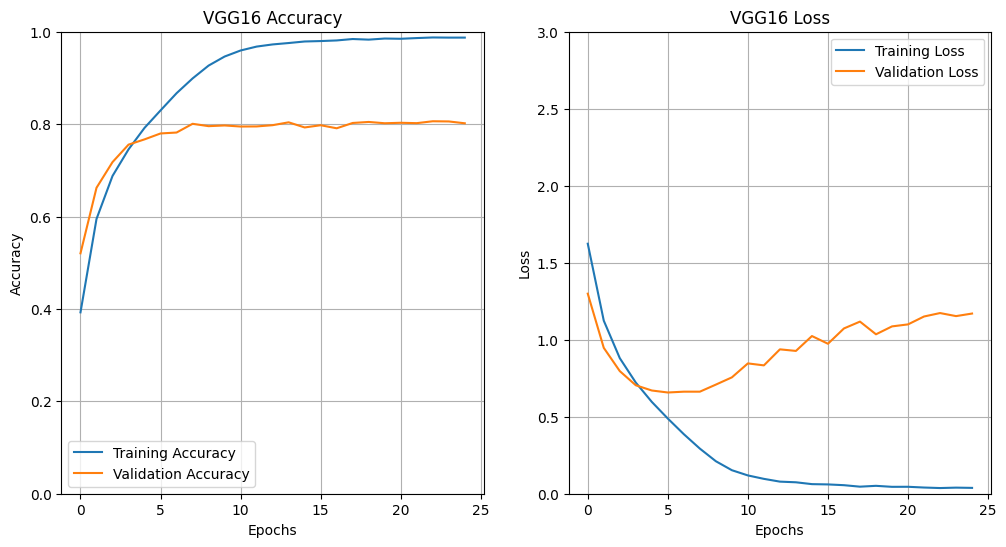

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define VGG16 Architecture
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize VGG16 Model
vgg16_model = build_vgg16((32, 32, 3), 10)
vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train VGG16 Model
vgg16_history = vgg16_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


# Plot Accuracy and Loss for VGG16 with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


# VGG transfer learning after saving it as pretrained(cifar)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3797 - loss: 1.8221 - val_accuracy: 0.5166 - val_loss: 1.3958
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5373 - loss: 1.3488 - val_accuracy: 0.5504 - val_loss: 1.3009
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5683 - loss: 1.2611 - val_accuracy: 0.5638 - val_loss: 1.2579
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5808 - loss: 1.2094 - val_accuracy: 0.5744 - val_loss: 1.2237
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5946 - loss: 1.1755 - val_accuracy: 0.5797 - val_loss: 1.2048
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6048 - loss: 1.1532 - val_accuracy: 0.5824 - val_loss: 1.1920
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6055 - loss: 1.1368 - val_accuracy: 0.5906 - val_loss: 1.1792
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6154 -

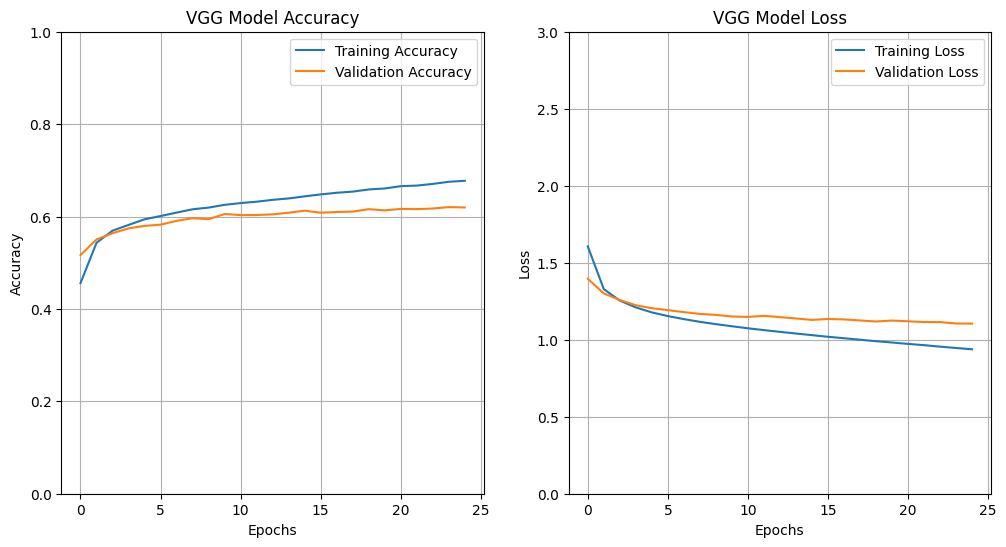

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Evaluation Metrics:
Train - Accuracy: 0.69, F1 Score: 0.68, ROC-AUC: 0.95
Validation - Accuracy: 0.62, F1 Score: 0.62, ROC-AUC: 0.93
Test - Accuracy: 0.61, F1 Score: 0.61, ROC-AUC: 0.93


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values to [0, 1]
train_labels_onehot = to_categorical(train_labels, num_classes=10)  # One-hot encode labels
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))  # 80% training, 20% validation
val_images, val_labels = train_images[val_split:], train_labels_onehot[val_split:]
train_images_split, train_labels_split = train_images[:val_split], train_labels_onehot[:val_split]

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(model, train_images_split, train_labels_split, val_images, val_labels, test_images, test_labels_onehot)

# ResNet with CIFAr


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.2539 - loss: 1.9767 - val_accuracy: 0.4130 - val_loss: 1.5937
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.4241 - loss: 1.5627 - val_accuracy: 0.4778 - val_loss: 1.4511
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4778 - loss: 1.4223 - val_accuracy: 0.5165 - val_loss: 1.3318
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5245 - loss: 1.3112 - val_accuracy: 0.5535 - val_loss: 1.2314
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5604 - loss: 1.2247 - val_accuracy: 0.5713 - val_loss: 1.1920
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5908 - loss: 1.1454 - val_accuracy: 0.6068 - val_loss: 1.1126
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6133 - loss: 1.0927 - val_accuracy: 0.6138 - val_loss: 1.0815
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6291 -

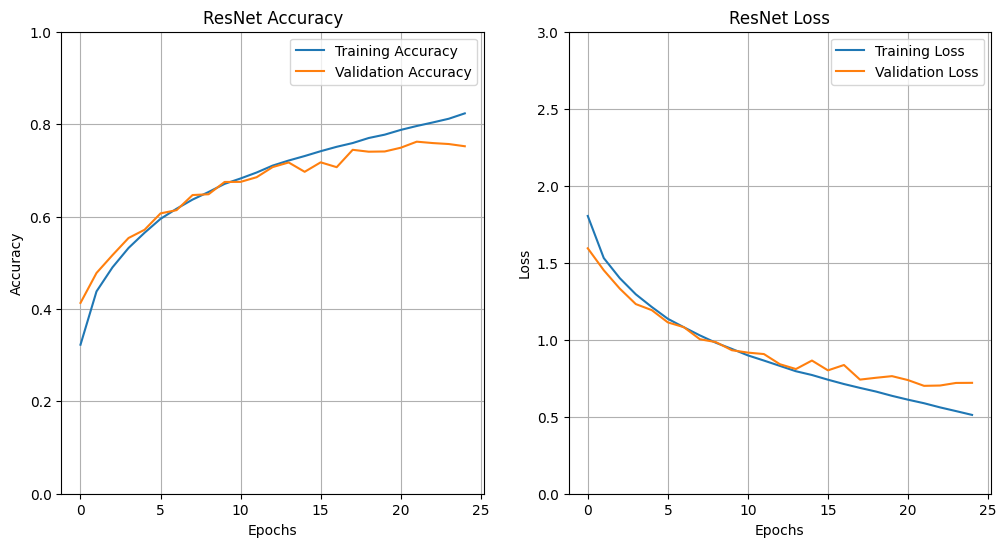

In [ ]:
# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Initialize ResNet Model
resnet_model = build_resnet((32, 32, 3), 10)
resnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train ResNet Model
resnet_history = resnet_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for ResNet with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('ResNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()



# Resnet transfer learning after saving it as pretrained(cifar)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.1734 - loss: 2.2444 - val_accuracy: 0.2398 - val_loss: 2.0292
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2801 - loss: 1.9913 - val_accuracy: 0.3214 - val_loss: 1.9081
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3089 - loss: 1.9191 - val_accuracy: 0.3228 - val_loss: 1.8740
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3309 - loss: 1.8686 - val_accuracy: 0.3446 - val_loss: 1.8553
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3423 - loss: 1.8358 - val_accuracy: 0.3617 - val_loss: 1.8080
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3477 - loss: 1.8203 - val_accuracy: 0.3591 - val_loss: 1.7964
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3612 - loss: 1.7944 - val_accuracy: 0.3718 - val_loss: 1.7892
Epoch 8/25
1250/1250 ━━━━━━━━━━

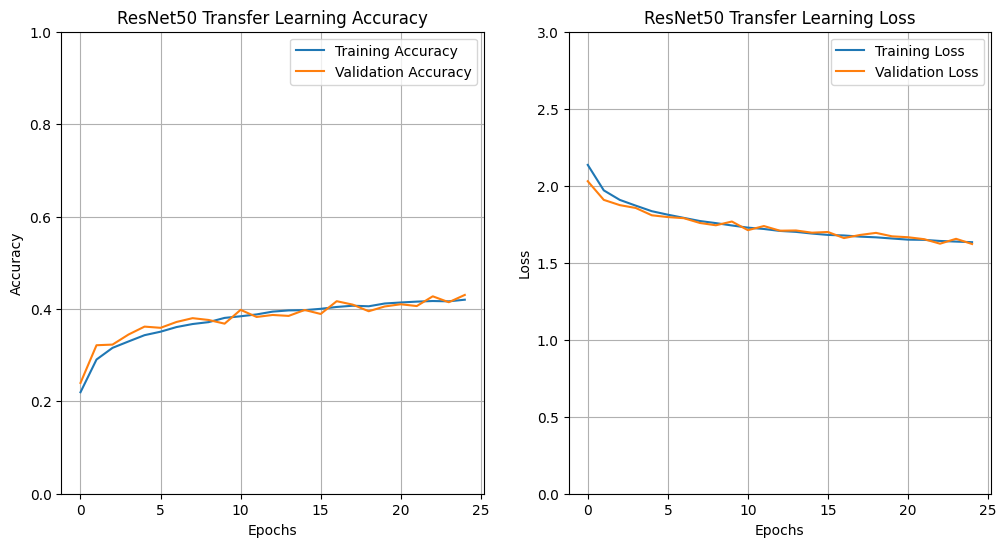

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Evaluation Metrics:
Train - Accuracy: 0.43, F1 Score: 0.41, ROC-AUC: 0.85
Validation - Accuracy: 0.43, F1 Score: 0.41, ROC-AUC: 0.84
Test - Accuracy: 0.42, F1 Score: 0.41, ROC-AUC: 0.84


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values
train_labels_onehot = to_categorical(train_labels, num_classes=10)  # One-hot encode labels
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Load pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Transfer Learning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Transfer Learning Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels_onehot[val_split:]
train_images_split, train_labels_split = train_images[:val_split], train_labels_onehot[:val_split]

evaluate_metrics(model, train_images_split, train_labels_split, val_images, val_labels, test_images, test_labels_onehot)

# GoogleNet with cifar


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.2223 - loss: 2.0447 - val_accuracy: 0.3616 - val_loss: 1.6908
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3627 - loss: 1.6772 - val_accuracy: 0.4352 - val_loss: 1.5410
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4139 - loss: 1.5687 - val_accuracy: 0.4681 - val_loss: 1.4562
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4508 - loss: 1.4770 - val_accuracy: 0.4555 - val_loss: 1.4658
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4815 - loss: 1.4124 - val_accuracy: 0.5081 - val_loss: 1.3544
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5002 - loss: 1.3585 - val_accuracy: 0.5028 - val_loss: 1.3409
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5176 - loss: 1.3272 - val_accuracy: 0.5411 - val_loss: 1.2706
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5308 - loss: 1.2870

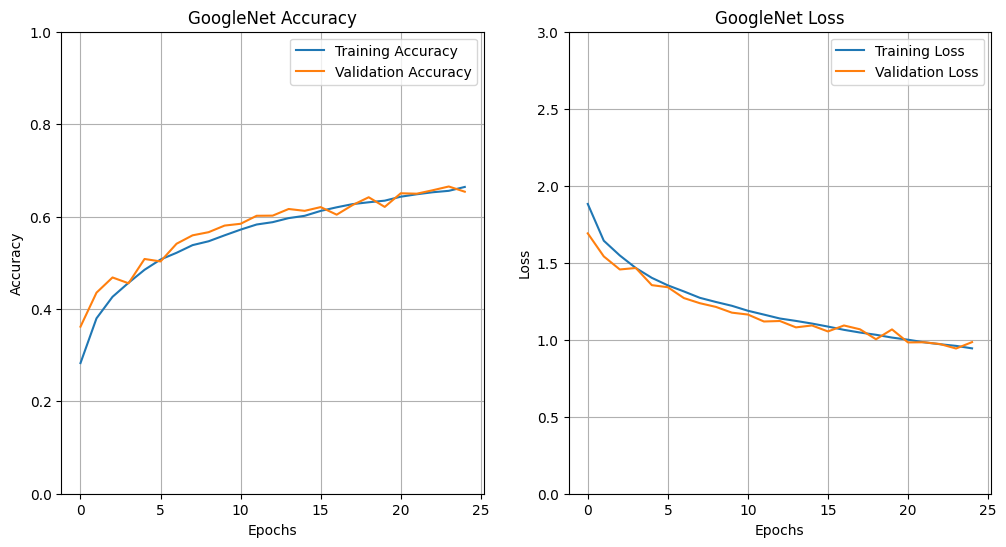

In [ ]:
# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Initialize GoogleNet Model
googlenet_model = build_googlenet((32, 32, 3), 10)
googlenet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train GoogleNet Model
googlenet_history = googlenet_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for GoogleNet with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(googlenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(googlenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GoogleNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(googlenet_history.history['loss'], label='Training Loss')
plt.plot(googlenet_history.history['val_loss'], label='Validation Loss')
plt.title('GoogleNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


# GoogleNet transfer learning after saving it as pretrained(cifar)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.4404 - loss: 1.6385 - val_accuracy: 0.5827 - val_loss: 1.2098
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.6364 - loss: 1.0727 - val_accuracy: 0.6028 - val_loss: 1.1401
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.6703 - loss: 0.9699 - val_accuracy: 0.6099 - val_loss: 1.1204
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6995 - loss: 0.8854 - val_accuracy: 0.6134 - val_loss: 1.1101
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7244 - loss: 0.8249 - val_accuracy: 0.6165 - val_loss: 1.1083
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7460 - loss: 0.7647 - val_accuracy: 0.6200 - val_loss: 1.1065
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7723 - loss: 0.7028 - val_accurac

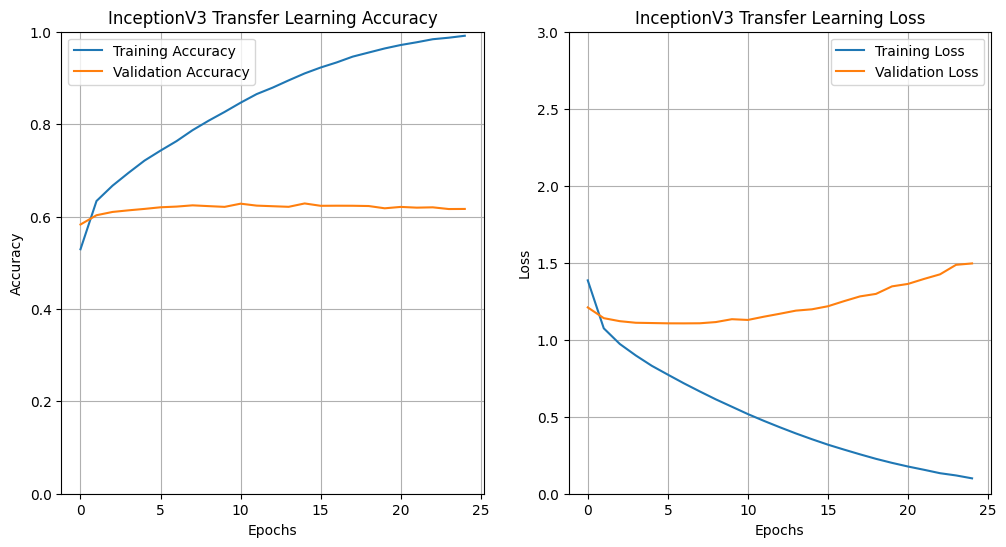

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.62, F1 Score: 0.62, ROC-AUC: 0.92
Test - Accuracy: 0.62, F1 Score: 0.62, ROC-AUC: 0.92


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Resize images to 75x75 (minimum input size for InceptionV3)
def resize_images(images, target_size=(75, 75)):
    return tf.image.resize(images, target_size)

train_images = resize_images(train_images)
test_images = resize_images(test_images)

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Load pre-trained InceptionV3 model (excluding top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('InceptionV3 Transfer Learning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('InceptionV3 Transfer Learning Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels_onehot[val_split:]
train_images_split, train_labels_split = train_images[:val_split], train_labels_onehot[:val_split]

evaluate_metrics(model, train_images_split, train_labels_split, val_images, val_labels, test_images, test_labels_onehot)

# Setio with cifar

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1992 - loss: 2.1498 - val_accuracy: 0.4071 - val_loss: 1.6946
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3742 - loss: 1.7267 - val_accuracy: 0.4513 - val_loss: 1.5316
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4222 - loss: 1.5980 - val_accuracy: 0.4838 - val_loss: 1.4495
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4496 - loss: 1.5213 - val_accuracy: 0.5042 - val_loss: 1.3944
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4686 - loss: 1.4686 - val_accuracy: 0.5094 - val_loss: 1.3685
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4884 - loss: 1.4168 - val_accuracy: 0.5360 - val_loss: 1.3014
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5047 - loss: 1.3791 - val_accuracy: 0.5562 - val_loss: 1.2641
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5243 - loss: 1.3343 -

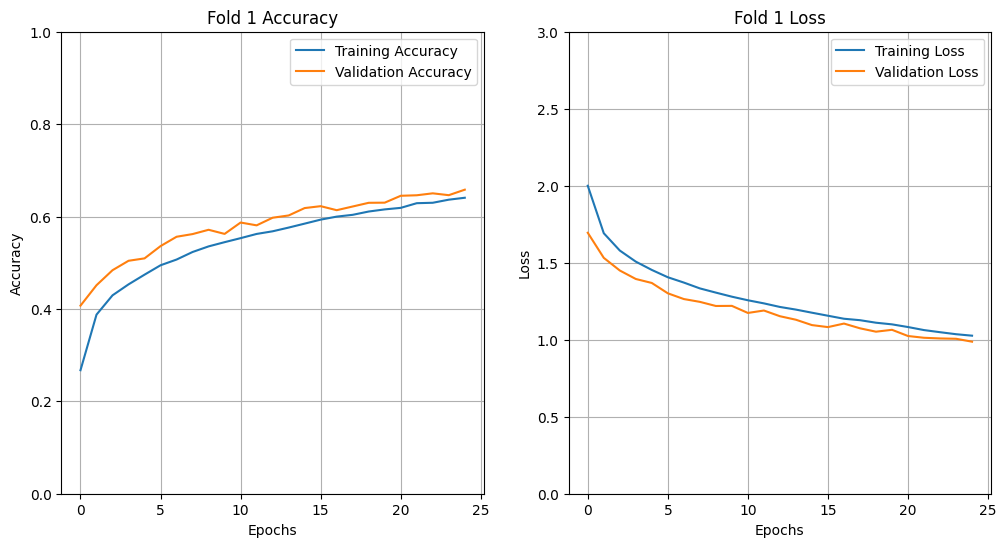

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.69, F1 Score: 0.69, ROC-AUC: 0.95
Validation - Accuracy: 0.66, F1 Score: 0.65, ROC-AUC: 0.94
Test - Accuracy: 0.66, F1 Score: 0.65, ROC-AUC: 0.94
Confusion Matrix:
[[747  20  71  17  15   4  10   8  80  28]
 [ 38 791   6  11   7   2  13   7  43  82]
 [ 76  10 552  54 109  64  79  31  16   9]
 [ 25   8 115 431  78 146 103  40  31  23]
 [ 36   7 128  51 581  24  78  76  17   2]
 [ 16   5 112 166  63 525  40  50  17   6]
 [  9   2  47  65  44  13 799   5  10   6]
 [ 24   4  40  37  90  71  13 689   9  23]
 [ 91  38  19  10   6   5   3   4 805  19]
 [ 54 169   8  15  11   8  16  24  57 638]]
Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2081 - loss: 2.1243 - val_accuracy: 0.3984 - val_loss: 1.6771
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3747 - loss: 1.7059 - val_accuracy: 0.4479 - val_loss: 1.5323
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4227 - loss: 1.5876 - val_accuracy: 0.4788 - val_loss: 1.4732
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4487 - loss: 1.5028 - val_accuracy: 0.5115 - val_loss: 1.3934
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4811 - loss: 1.4389 - val_accuracy: 0.5309 - val_loss: 1.3129
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5015 - loss: 1.3853 - val_accuracy: 0.5391 - val_loss: 1.3012
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5191 - loss: 1.3434 - val_accuracy: 0.5623 - val_loss: 1.2415
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5339 - loss: 1.3090 - 

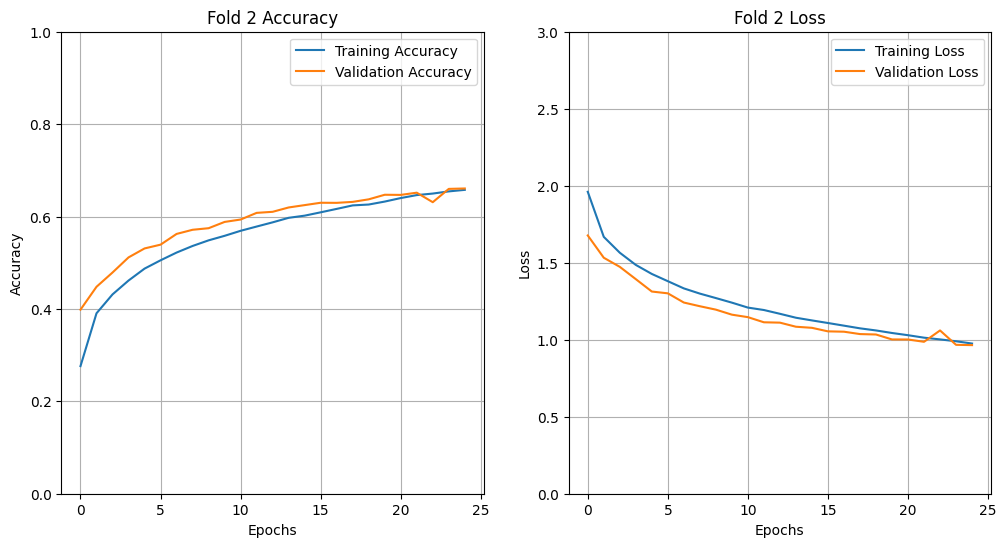

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Evaluation Metrics:
Train - Accuracy: 0.70, F1 Score: 0.70, ROC-AUC: 0.96
Validation - Accuracy: 0.66, F1 Score: 0.66, ROC-AUC: 0.94
Test - Accuracy: 0.67, F1 Score: 0.67, ROC-AUC: 0.95
Confusion Matrix:
[[667  12  80  21  37   8  14  21  94  46]
 [ 21 688   8  18   8   5  14  12  35 191]
 [ 54   2 495  75 149  76  76  53  10  10]
 [  9   4  82 505  78 168  67  48  14  25]
 [ 16   5  65  55 661  25  68  87  16   2]
 [  5   2  66 214  58 537  20  79  11   8]
 [  5   2  40  91  63  13 759  11   9   7]
 [  9   0  27  45  76  62   5 755   3  18]
 [ 64  29  12  24  13   3  10  12 799  34]
 [ 23  65   7  13   3   9  12  33  41 794]]
Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2154 - loss: 2.1102 - val_accuracy: 0.4167 - val_loss: 1.6644
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3782 - loss: 1.7077 - val_accuracy: 0.4552 - val_loss: 1.5256
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4272 - loss: 1.5694 - val_accuracy: 0.4893 - val_loss: 1.4278
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4584 - loss: 1.4900 - val_accuracy: 0.4934 - val_loss: 1.3937
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4785 - loss: 1.4417 - val_accuracy: 0.5258 - val_loss: 1.3399
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4966 - loss: 1.3903 - val_accuracy: 0.5351 - val_loss: 1.2963
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5147 - loss: 1.3507 - val_accuracy: 0.5530 - val_loss: 1.2653
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5217 - loss: 1.3267 - 

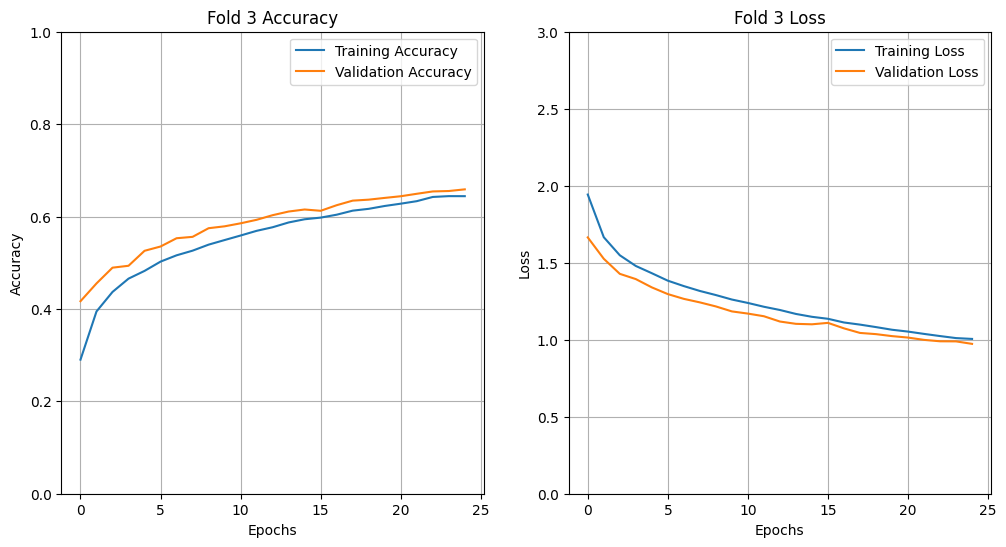

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.69, F1 Score: 0.69, ROC-AUC: 0.95
Validation - Accuracy: 0.66, F1 Score: 0.65, ROC-AUC: 0.94
Test - Accuracy: 0.66, F1 Score: 0.66, ROC-AUC: 0.94
Confusion Matrix:
[[758  19  38  13  11   7   8  10  84  52]
 [ 21 768   6   4   2   4  11   5  30 149]
 [ 85  11 452  58 142  89  67  46  20  30]
 [ 36  19  67 387  95 198  81  60  23  34]
 [ 37   6  54  40 620  38  64 116  21   4]
 [ 14   4  59 141  61 591  29  73  13  15]
 [  8   4  39  64  70  27 737  20   7  24]
 [ 16   6  19  28  63  59  11 767   5  26]
 [ 83  48  12  12   3   6   2   3 790  41]
 [ 36 122   9   8   4   6   7  14  28 766]]
Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2103 - loss: 2.1329 - val_accuracy: 0.4057 - val_loss: 1.6897
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3733 - loss: 1.7164 - val_accuracy: 0.4436 - val_loss: 1.5671
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4179 - loss: 1.6035 - val_accuracy: 0.4760 - val_loss: 1.4607
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4466 - loss: 1.5223 - val_accuracy: 0.4995 - val_loss: 1.4035
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4769 - loss: 1.4537 - val_accuracy: 0.5062 - val_loss: 1.3881
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4838 - loss: 1.4216 - val_accuracy: 0.5184 - val_loss: 1.3442
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4992 - loss: 1.3859 - val_accuracy: 0.5381 - val_loss: 1.2950
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5127 - loss: 1.3571 - 

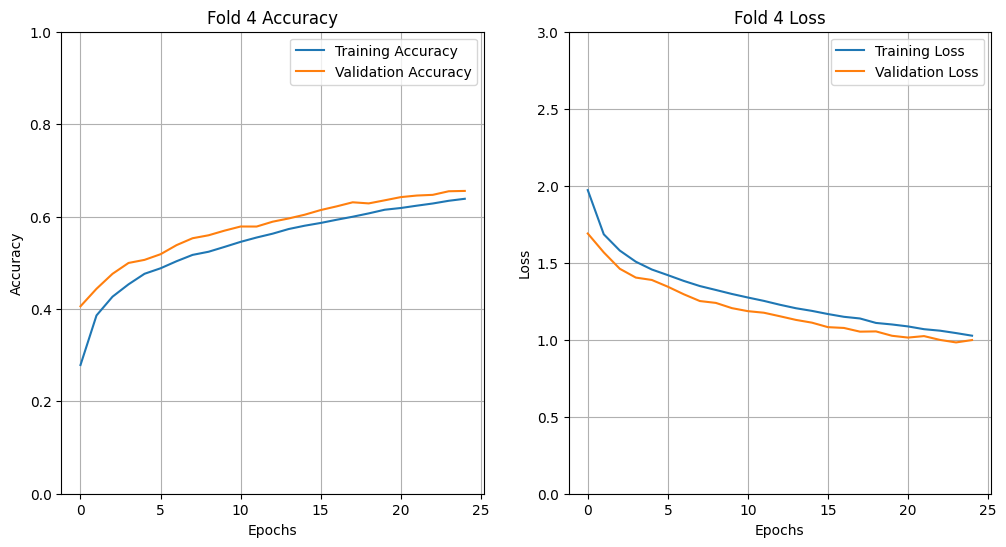

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Evaluation Metrics:
Train - Accuracy: 0.68, F1 Score: 0.68, ROC-AUC: 0.95
Validation - Accuracy: 0.66, F1 Score: 0.65, ROC-AUC: 0.94
Test - Accuracy: 0.65, F1 Score: 0.65, ROC-AUC: 0.94
Confusion Matrix:
[[720  39  47  16   6   4   4   6 103  55]
 [ 14 856   1   6   2   7   4   1  27  82]
 [ 88  18 513  82  67  92  52  46  20  22]
 [ 37  26  86 431  50 204  59  45  27  35]
 [ 40  12 117  77 499  56  51 120  20   8]
 [ 22   5  78 175  32 590  16  47  16  19]
 [ 11  20  68  92  35  33 694   8  18  21]
 [ 22   8  39  37  41  89   6 712   8  38]
 [ 61  60  11  12   3   5   2   2 818  26]
 [ 28 197   5  13   3   7   6  17  45 679]]
Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2000 - loss: 2.1435 - val_accuracy: 0.4075 - val_loss: 1.7081
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3724 - loss: 1.7403 - val_accuracy: 0.4477 - val_loss: 1.5458
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4223 - loss: 1.5984 - val_accuracy: 0.4674 - val_loss: 1.4743
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4514 - loss: 1.5084 - val_accuracy: 0.4903 - val_loss: 1.4093
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4654 - loss: 1.4711 - val_accuracy: 0.5117 - val_loss: 1.3598
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4888 - loss: 1.4186 - val_accuracy: 0.5184 - val_loss: 1.3356
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4984 - loss: 1.3905 - val_accuracy: 0.5342 - val_loss: 1.3056
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5144 - loss: 1.3568 - 

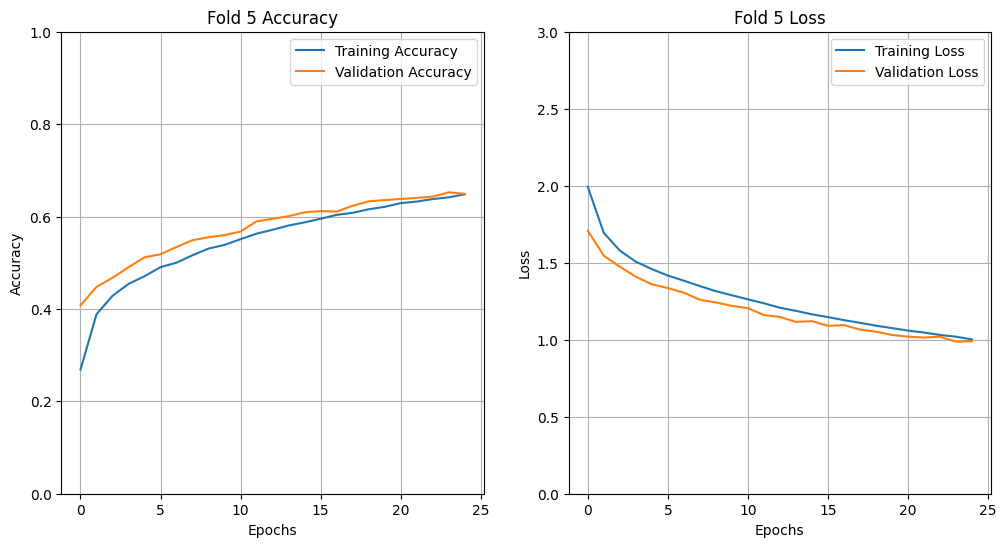

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Evaluation Metrics:
Train - Accuracy: 0.69, F1 Score: 0.69, ROC-AUC: 0.95
Validation - Accuracy: 0.65, F1 Score: 0.65, ROC-AUC: 0.94
Test - Accuracy: 0.65, F1 Score: 0.65, ROC-AUC: 0.94
Confusion Matrix:
[[712  22  84  20  18   7  20   9  74  34]
 [ 29 770  15  10   5   5  21   8  20 117]
 [ 66   7 507  77 130  56  99  33  13  12]
 [ 16  13 107 460  63 141 140  28  17  15]
 [ 20   5  92  52 612  16 111  75  16   1]
 [ 10   2 104 217  71 477  56  42  12   9]
 [  4   2  38  45  43  12 836   5   5  10]
 [ 18   0  43  52  98  67  21 679   4  18]
 [ 85  50  21  18   8   6  19   5 762  26]
 [ 35 122  12  27   5   5  30  21  29 714]]

Average Metrics after 5-Fold Cross Validation:
Train Accuracy: 0.69, Validation Accuracy: 0.66, Test Accuracy: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)



# Prepare labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# KFold Cross-Validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(train_images):
    print(f"Fold {fold}/{n_splits}")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = train_images[train_index], train_images[val_index]
    train_fold_labels, val_fold_labels = train_labels[train_index], train_labels[val_index]

    # One-hot encode labels for training and validation
    train_labels_onehot = to_categorical(train_fold_labels, num_classes=10)
    val_labels_onehot = to_categorical(val_fold_labels, num_classes=10)

    # Build and compile the model
    model = create_setio_2d_cnn(input_shape=(32, 32, 3), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_labels_onehot, epochs=25, batch_size=32, validation_data=(val_fold_images, val_labels_onehot))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_labels_onehot, val_fold_images, val_labels_onehot, test_images, test_labels_onehot
    )

    # Store metrics
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Average metrics after all folds
print("\nAverage Metrics after 5-Fold Cross Validation:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}, Validation Accuracy: {np.mean(all_val_accuracies):.2f}, Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1: {np.mean(all_train_f1):.2f}, Validation F1: {np.mean(all_val_f1):.2f}, Test F1: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}, Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}, Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# Custom cnn with cifar

Fold 1/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.2869 - loss: 1.9203 - val_accuracy: 0.5401 - val_loss: 1.2858
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.5234 - loss: 1.3216 - val_accuracy: 0.6168 - val_loss: 1.0866
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.6019 - loss: 1.1223 - val_accuracy: 0.6516 - val_loss: 0.9838
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.6597 - loss: 0.9712 - val_accuracy: 0.6827 - val_loss: 0.8923
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.6988 - loss: 0.8592 - val_accuracy: 0.7054 - val_loss: 0.8496
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7337 - loss: 0.7513 - val_accuracy: 0.7187 - val_loss: 0.8019
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7785 - loss: 0.6449 - val_accuracy: 0.7334 - val_loss: 0.7781
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy:

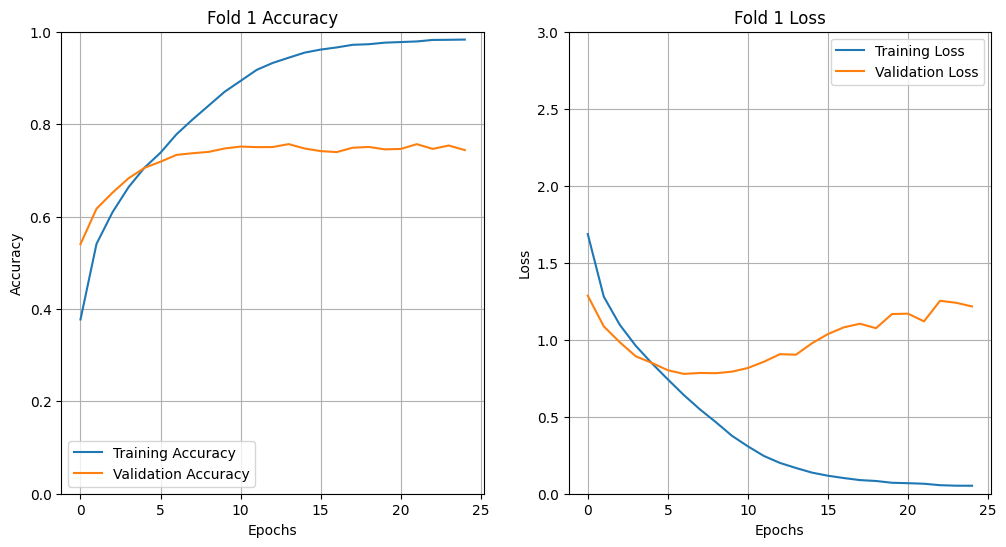

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Test - Accuracy: 0.74, F1 Score: 0.73, ROC-AUC: 0.96
Confusion Matrix:
[[796  27  27  13   9   6   5   5  62  50]
 [ 13 870   1   5   0   5   2   0  16  88]
 [ 90  13 587  75  61  62  47  28  14  23]
 [ 30  23  54 575  47 144  42  31  14  40]
 [ 35   9  83  82 604  28  53  79  20   7]
 [ 25  11  36 165  26 648  16  42  11  20]
 [  6  14  40  70  28  23 779   7  11  22]
 [ 29   3  20  35  34  59   6 781   4  29]
 [ 49  51   5   7   2   2   2   2 852  28]
 [ 23  67   4   5   2   2   2   8  23 864]]
Fold 2/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.2813 - loss: 1.9385 - val_accuracy:

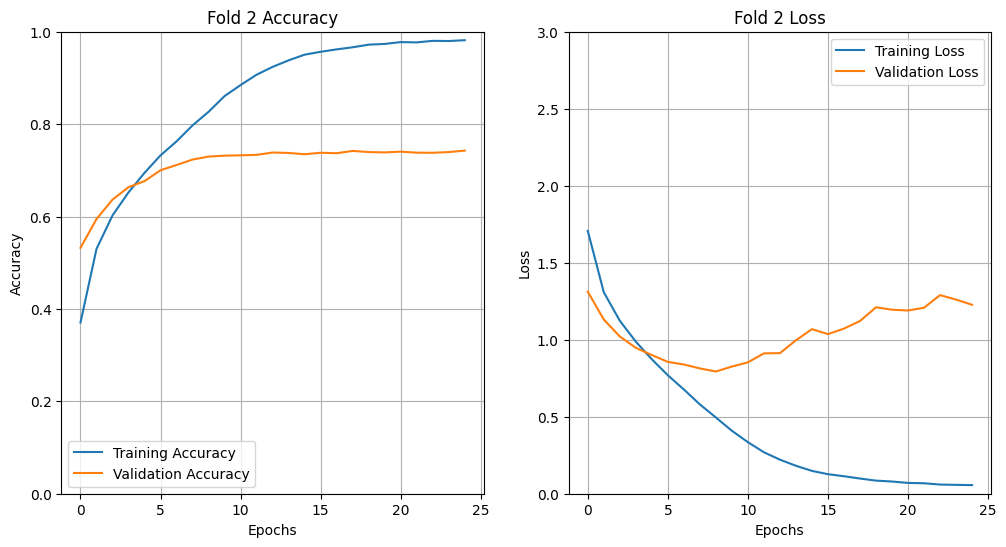

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Test - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Confusion Matrix:
[[779  19  33  23  12   7   8   8  77  34]
 [ 21 825   4  10   1   5   7   2  30  95]
 [ 84   9 551  69 103  73  57  27  16  11]
 [ 25   5  44 577  63 173  45  33  15  20]
 [ 26   5  50  65 722  37  32  47  14   2]
 [ 11   3  32 150  48 691  14  34  11   6]
 [  6   6  36  73  56  35 771   3   6   8]
 [ 19   3  24  38  65  65   3 772   2   9]
 [ 52  33   9  17   4   6   6   0 850  23]
 [ 29  55   4  20   6   4   3  12  31 836]]
Fold 3/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.2874 - loss: 1.9321 - val_accuracy:

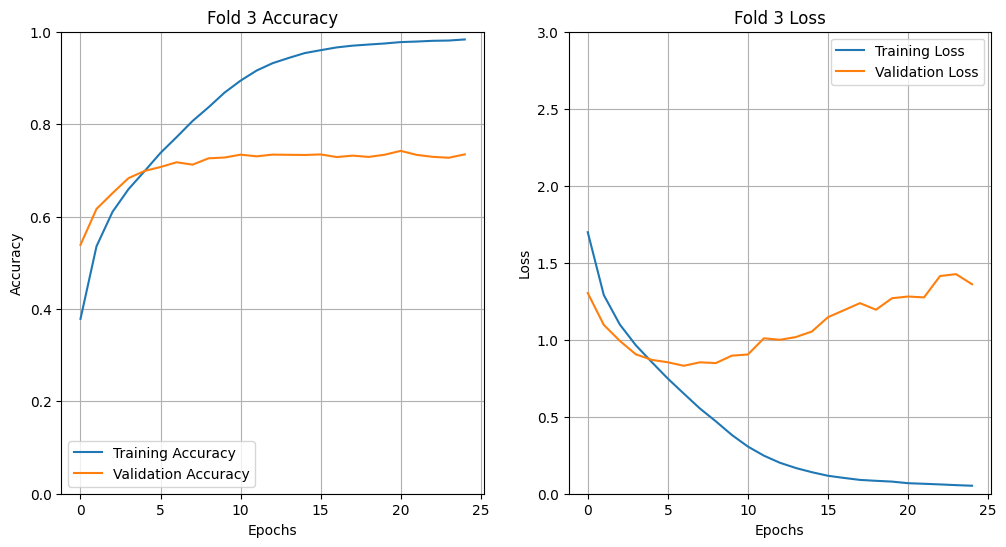

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.96
Test - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.96
Confusion Matrix:
[[784  11  63  13  13   3  13  11  55  34]
 [ 26 808   7   9   3   4   8   4  34  97]
 [ 71   0 641  52  64  48  68  33  19   4]
 [ 16  11 100 536  53 147  78  26  17  16]
 [ 20   7  92  50 660  25  77  50  16   3]
 [ 10   3  72 172  32 630  29  39   8   5]
 [  4   2  52  40  20  13 857   3   6   3]
 [ 15   3  50  36  61  52   4 765   3  11]
 [ 56  33  12  11   7   8  11   3 839  20]
 [ 31  61  10  12   3   9   5  19  24 826]]
Fold 4/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.2947 - loss: 1.8998 - val_accuracy:

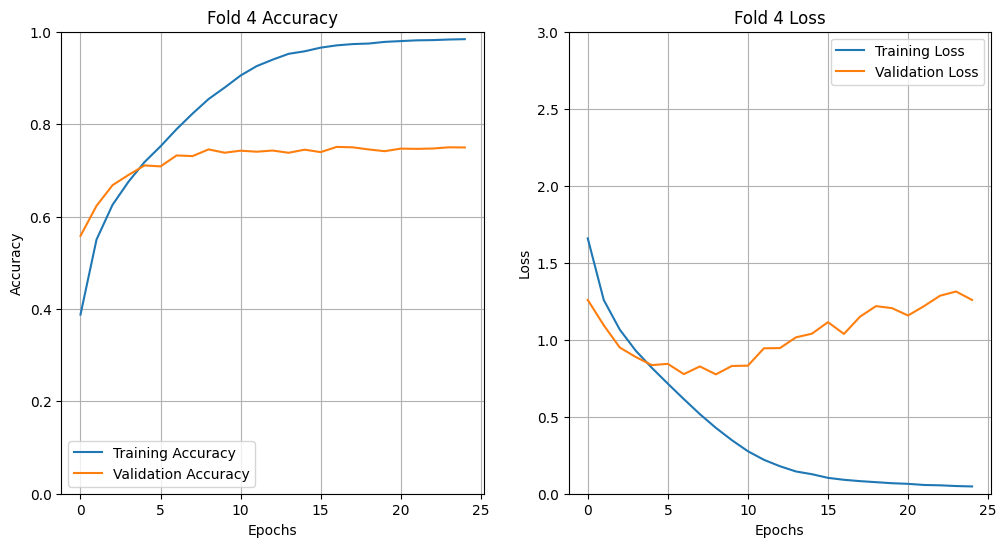

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.75, F1 Score: 0.75, ROC-AUC: 0.96
Test - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Confusion Matrix:
[[763  15  48  26  12   4   9  13  68  42]
 [ 11 865   3   9   2   3   4   1  27  75]
 [ 63   6 586  73  95  52  61  45  12   7]
 [ 17  14  51 583  64 134  58  40  19  20]
 [ 27   4  43  67 703  18  45  79  13   1]
 [ 11   7  37 170  48 639  18  57   7   6]
 [  8   9  27  58  46  17 809   8  10   8]
 [ 17   4  29  39  49  27   4 816   3  12]
 [ 50  34   7  10   4   3   7   6 859  20]
 [ 34  67   4  18   4   4   6  18  28 817]]
Fold 5/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.2840 - loss: 1.9220 - val_accuracy:

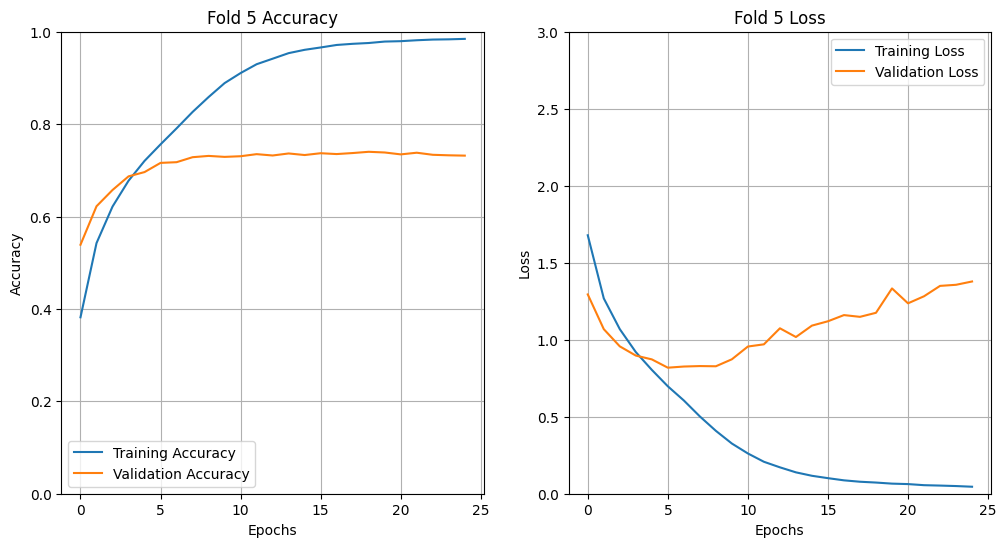

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.96
Test - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.96
Confusion Matrix:
[[738  23  54  21  26   7  15  11  72  33]
 [ 10 856   5  17   2   6   8   2  20  74]
 [ 53   3 563  86  98  72  75  33  10   7]
 [ 14  12  53 567  56 183  67  23  13  12]
 [ 10   4  57  74 708  38  46  50  13   0]
 [  7   7  25 162  50 684  17  37   6   5]
 [  3   3  30  60  48  28 818   4   5   1]
 [  7   2  19  45  70  69   6 771   3   8]
 [ 36  35   9  14   6   9   9   7 846  29]
 [ 26  74   9  26   9  12  10  26  32 776]]

Average Metrics after 5-Fold Cross Validation:
Train Accuracy: 1.00, Validation Accuracy: 0.74, Test Accuracy: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


# Inception module (simplified with fewer filters)
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)


# Number of folds for cross-validation
n_splits = 5

# KFold Cross-Validation setup
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Prepare the labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(train_images):
    print(f"Fold {fold}/{n_splits}")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = train_images[train_index], train_images[val_index]
    train_fold_labels, val_fold_labels = train_labels[train_index], train_labels[val_index]

    # One-hot encode labels for training and validation
    train_labels_onehot = to_categorical(train_fold_labels, num_classes=10)
    val_labels_onehot = to_categorical(val_fold_labels, num_classes=10)

    # Build and compile the model (assuming model is a function that returns a compiled model)
    model = hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_labels_onehot, epochs=25, batch_size=32, validation_data=(val_fold_images, val_labels_onehot))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_labels_onehot, val_fold_images, val_labels_onehot, test_images, test_labels_onehot
    )

    # Store metrics
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Average metrics after all folds
print("\nAverage Metrics after 5-Fold Cross Validation:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}, Validation Accuracy: {np.mean(all_val_accuracies):.2f}, Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1: {np.mean(all_train_f1):.2f}, Validation F1: {np.mean(all_val_f1):.2f}, Test F1: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}, Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}, Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")




# VGG WITH MNIST


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.8325 - loss: 3.4777 - val_accuracy: 0.9854 - val_loss: 0.7763
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9822 - loss: 0.5811 - val_accuracy: 0.9888 - val_loss: 0.2213
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9871 - loss: 0.1841 - val_accuracy: 0.9892 - val_loss: 0.1226
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9888 - loss: 0.1048 - val_accuracy: 0.9918 - val_loss: 0.0811
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9916 - loss: 0.0796 - val_accuracy: 0.9926 - val_loss: 0.0702
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9930 - loss: 0.0625 - val_accuracy: 0.9900 - val_loss: 0.0775
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9943 - loss: 0.0560 - val_accuracy: 0.9906 - val_loss: 0.0698
Epoch 8/25
1719/1719 ━━━━

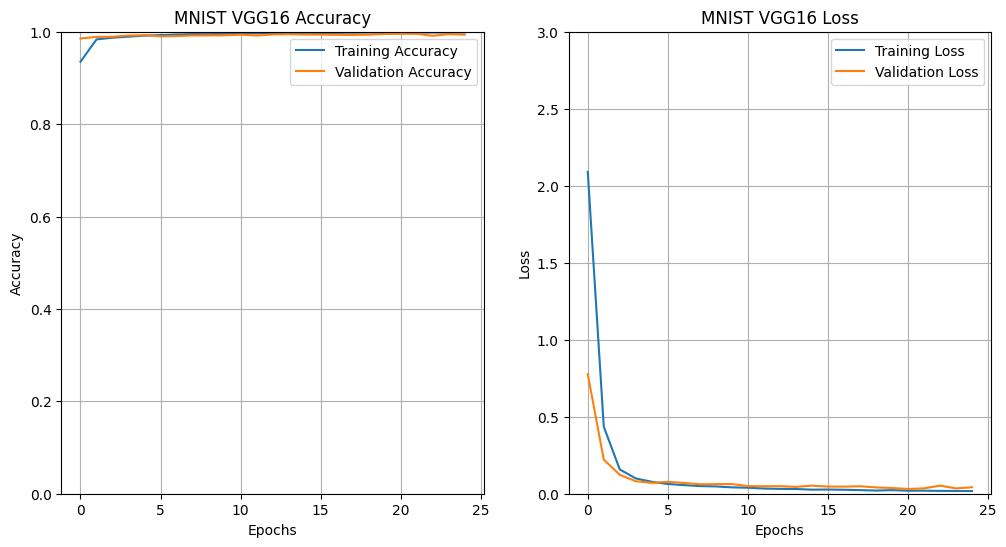

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define VGG16 model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Initialize and train the VGG16 model
mnist_vgg16_model = build_vgg16(input_shape=(28, 28, 1), num_classes=10)
mnist_vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy', metrics=['accuracy'])

mnist_vgg16_history = mnist_vgg16_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for VGG16
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mnist_vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mnist_vgg16_history.history['loss'], label='Training Loss')
plt.plot(mnist_vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('MNIST VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 0.5681 - loss: 3.1393 - val_accuracy: 0.9246 - val_loss: 0.5175
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 67s 18ms/step - accuracy: 0.9385 - loss: 0.4120 - val_accuracy: 0.9564 - val_loss: 0.2553
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9568 - loss: 0.2336 - val_accuracy: 0.9544 - val_loss: 0.2279
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.9692 - loss: 0.1718 - val_accuracy: 0.9644 - val_loss: 0.1818
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9754 - loss: 0.1387 - val_accuracy: 0.9668 - val_loss: 0.1731
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9819 - loss: 0.1107 - val_accuracy: 0.9632 - val_loss: 0.1787
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.9848 - loss: 0.0990 - val_accuracy: 0.9646 - val_loss: 0.1748
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9858 -

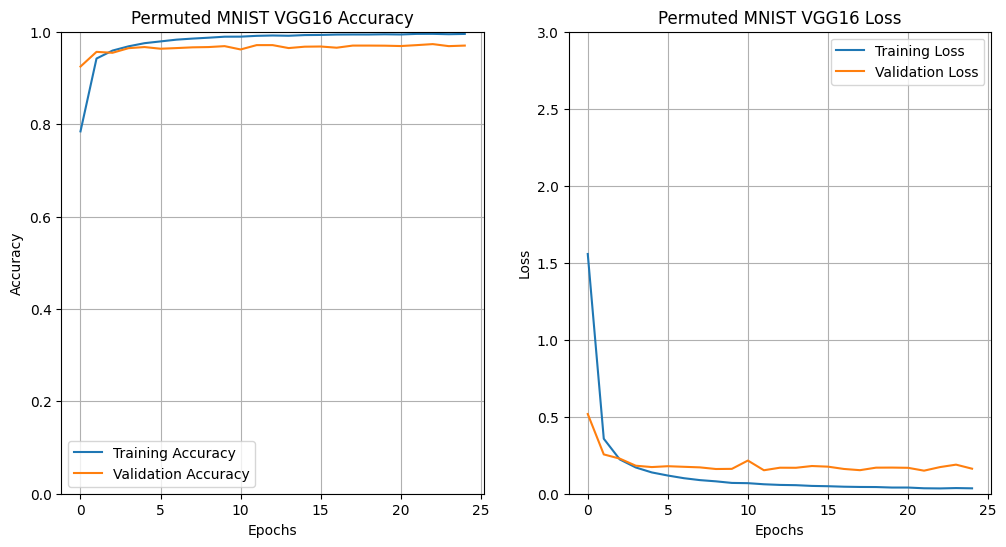

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Function to permute the pixels of the images
def permute_pixels(images, permutation):
    return images.reshape(-1, 28 * 28)[:, permutation].reshape(-1, 28, 28, 1)

# Create a random permutation of the pixels
np.random.seed(42)  # For reproducibility
permutation = np.random.permutation(28 * 28)

# Apply the permutation to the training and test images
mnist_train_images = permute_pixels(mnist_train_images, permutation)
mnist_test_images = permute_pixels(mnist_test_images, permutation)

# Preprocess data
mnist_train_images = mnist_train_images.astype('float32') / 255.0
mnist_test_images = mnist_test_images.astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define VGG16 model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Initialize and train the VGG16 model
mnist_vgg16_model = build_vgg16(input_shape=(28, 28, 1), num_classes=10)
mnist_vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy', metrics=['accuracy'])

mnist_vgg16_history = mnist_vgg16_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for VGG16
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mnist_vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Permuted MNIST VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mnist_vgg16_history.history['loss'], label='Training Loss')
plt.plot(mnist_vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('Permuted MNIST VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()

# VGG transfer learning after saving it as pretrained(MNIST)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train[..., np.newaxis].astype('float32') / 255.0
x_test = x_test[..., np.newaxis].astype('float32') / 255.0
x_train = np.repeat(x_train, 3, axis=-1)  # Convert to 3 channels
x_test = np.repeat(x_test, 3, axis=-1)

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(28, 28, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot Accuracy and Loss for VGG on MNIST
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG on MNIST Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG on MNIST Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function for VGG on MNIST
def evaluate_metrics(model, x_train, y_train, x_test, y_test):
    # Convert labels to one-hot encoding
    y_train_onehot = to_categorical(y_train, num_classes=10)
    y_test_onehot = to_categorical(y_test, num_classes=10)

    # Training Metrics
    train_loss, train_accuracy = model.evaluate(x_train, y_train_onehot, verbose=0)
    train_predictions = np.argmax(model.predict(x_train), axis=1)
    train_f1 = f1_score(y_train, train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(y_train_onehot, model.predict(x_train), multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
    test_predictions = np.argmax(model.predict(x_test), axis=1)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(y_test_onehot, model.predict(x_test), multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation for VGG on MNIST
evaluate_metrics(model, x_train, y_train, x_test, y_test)


# RESNET WITH MNIST


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.6854 - loss: 0.9154 - val_accuracy: 0.9618 - val_loss: 0.1439
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9626 - loss: 0.1245 - val_accuracy: 0.9806 - val_loss: 0.0670
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9763 - loss: 0.0783 - val_accuracy: 0.9820 - val_loss: 0.0624
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9818 - loss: 0.0571 - val_accuracy: 0.9798 - val_loss: 0.0652
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9864 - loss: 0.0459 - val_accuracy: 0.9842 - val_loss: 0.0495
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9880 - loss: 0.0386 - val_accuracy: 0.9886 - val_loss: 0.0374
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9912 - loss: 0.0289 - val_accuracy: 0.9880 - val_loss: 0.0387
Epoch 8/25
1719/1719 ━━━━

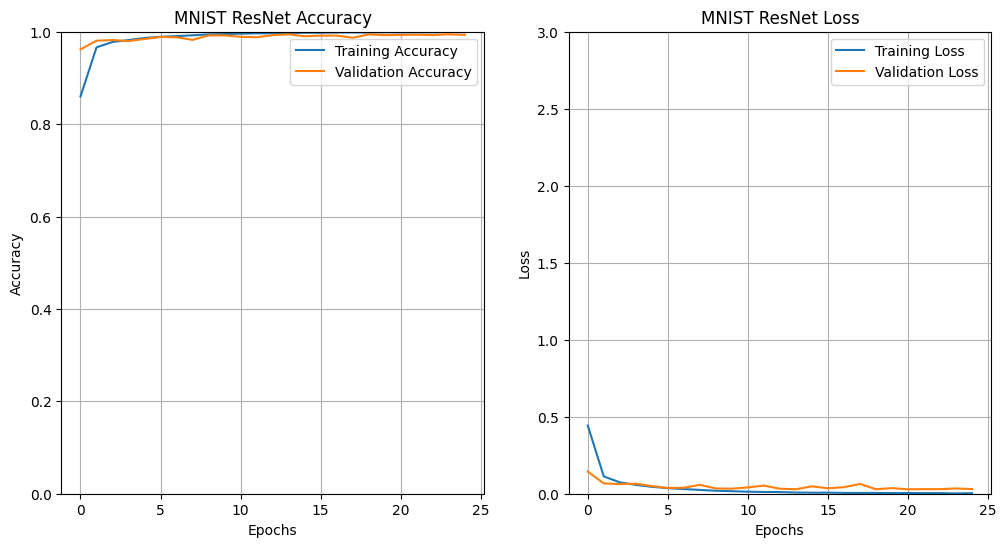

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Initialize and train the ResNet model
mnist_resnet_model = build_resnet(input_shape=(28, 28, 1), num_classes=10)
mnist_resnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                           loss='categorical_crossentropy', metrics=['accuracy'])

mnist_resnet_history = mnist_resnet_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for ResNet
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mnist_resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST ResNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mnist_resnet_history.history['loss'], label='Training Loss')
plt.plot(mnist_resnet_history.history['val_loss'], label='Validation Loss')
plt.title('MNIST ResNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()


# Resnet transfer learning after saving it as pretrained(MNIST)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train[..., np.newaxis].astype('float32') / 255.0
x_test = x_test[..., np.newaxis].astype('float32') / 255.0
x_train = np.repeat(x_train, 3, axis=-1)  # Convert to 3 channels
x_test = np.repeat(x_test, 3, axis=-1)

# Load pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(28, 28, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot Accuracy and Loss for ResNet on MNIST
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet on MNIST Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet on MNIST Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function for ResNet on MNIST
def evaluate_metrics(model, x_train, y_train, x_test, y_test):
    # Convert labels to one-hot encoding
    y_train_onehot = to_categorical(y_train, num_classes=10)
    y_test_onehot = to_categorical(y_test, num_classes=10)

    # Training Metrics
    train_loss, train_accuracy = model.evaluate(x_train, y_train_onehot, verbose=0)
    train_predictions = np.argmax(model.predict(x_train), axis=1)
    train_f1 = f1_score(y_train, train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(y_train_onehot, model.predict(x_train), multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
    test_predictions = np.argmax(model.predict(x_test), axis=1)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(y_test_onehot, model.predict(x_test), multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation for ResNet on MNIST
evaluate_metrics(model, x_train, y_train, x_test, y_test)


# GOOGLENETT WITH MNIST


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.5436 - loss: 1.3199 - val_accuracy: 0.9160 - val_loss: 0.2729
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9273 - loss: 0.2501 - val_accuracy: 0.9640 - val_loss: 0.1296
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9501 - loss: 0.1700 - val_accuracy: 0.9696 - val_loss: 0.1053
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9586 - loss: 0.1391 - val_accuracy: 0.9740 - val_loss: 0.0838
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9645 - loss: 0.1150 - val_accuracy: 0.9764 - val_loss: 0.0764
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9684 - loss: 0.1036 - val_accuracy: 0.9808 - val_loss: 0.0708
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9742 - loss: 0.0828 - val_accuracy: 0.9812 - val_loss: 0.0607
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9779 - loss: 0.078

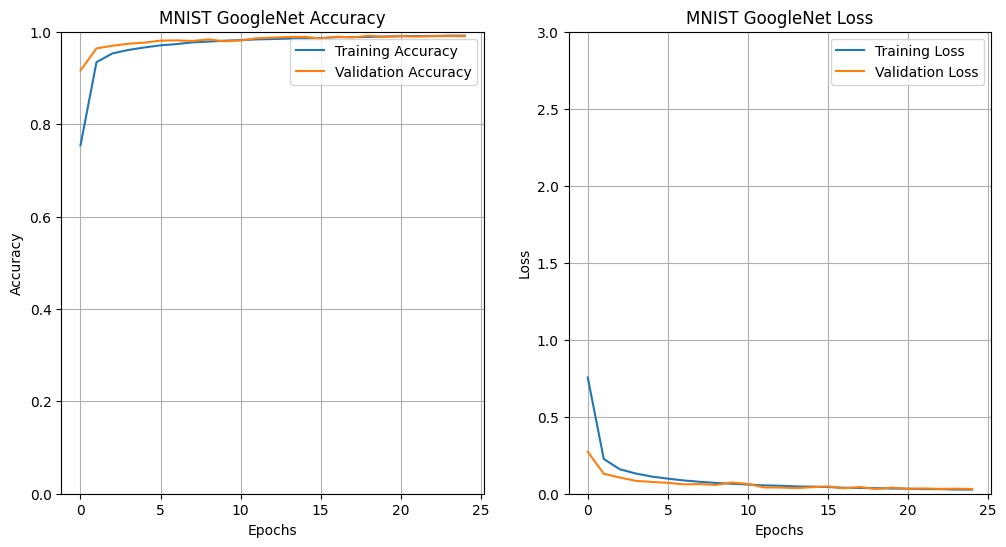

In [ ]:
# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Initialize and train the GoogleNet model
mnist_googlenet_model = build_googlenet(input_shape=(28, 28, 1), num_classes=10)
mnist_googlenet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                              loss='categorical_crossentropy', metrics=['accuracy'])

mnist_googlenet_history = mnist_googlenet_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for GoogleNet
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mnist_googlenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_googlenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST GoogleNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mnist_googlenet_history.history['loss'], label='Training Loss')
plt.plot(mnist_googlenet_history.history['val_loss'], label='Validation Loss')
plt.title('MNIST GoogleNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()


# GoogleNet transfer learning after saving it as pretrained(MNIST)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train[..., np.newaxis].astype('float32') / 255.0
x_test = x_test[..., np.newaxis].astype('float32') / 255.0
x_train = np.repeat(x_train, 3, axis=-1)  # Convert to 3 channels
x_test = np.repeat(x_test, 3, axis=-1)

# Load pre-trained InceptionV3 model (excluding top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(28, 28, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot Accuracy and Loss for GoogLeNet on MNIST
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GoogLeNet on MNIST Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GoogLeNet on MNIST Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function for GoogLeNet on MNIST
def evaluate_metrics(model, x_train, y_train, x_test, y_test):
    # Convert labels to one-hot encoding
    y_train_onehot = to_categorical(y_train, num_classes=10)
    y_test_onehot = to_categorical(y_test, num_classes=10)

    # Training Metrics
    train_loss, train_accuracy = model.evaluate(x_train, y_train_onehot, verbose=0)
    train_predictions = np.argmax(model.predict(x_train), axis=1)
    train_f1 = f1_score(y_train, train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(y_train_onehot, model.predict(x_train), multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
    test_predictions = np.argmax(model.predict(x_test), axis=1)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(y_test_onehot, model.predict(x_test), multi_class='ov


# Setio cnn with mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5429 - loss: 1.4159 - val_accuracy: 0.9374 - val_loss: 0.2049
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.2879 - val_accuracy: 0.9569 - val_loss: 0.1411
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9387 - loss: 0.2042 - val_accuracy: 0.9643 - val_loss: 0.1085
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9537 - loss: 0.1556 - val_accuracy: 0.9707 - val_loss: 0.0950
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9619 - loss: 0.1337 - val_accuracy: 0.9741 - val_loss: 0.0822
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9668 - loss: 0.1174 - val_accuracy: 0.9765 - val_loss: 0.0744
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9690 - loss: 0.1050 - val_accuracy: 0.9761 - val_loss: 0.0728
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9717 - loss: 0.0951 - 

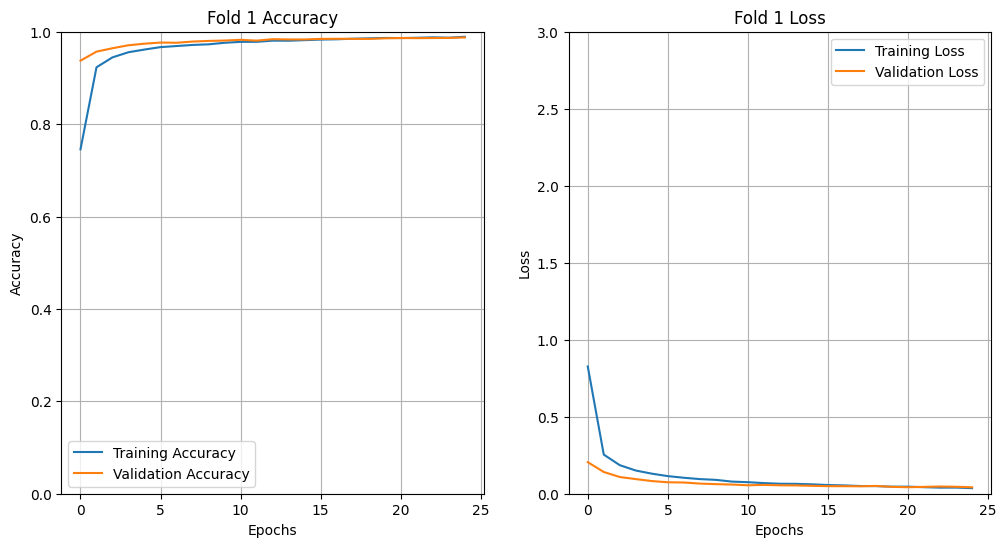

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 976    0    0    0    0    1    1    1    1    0]
 [   0 1130    0    2    0    0    1    0    2    0]
 [   2    0 1020    2    0    0    0    7    1    0]
 [   0    0    0 1006    0    1    0    3    0    0]
 [   0    0    2    0  971    0    1    0    1    7]
 [   1    0    1    4    0  881    2    0    1    2]
 [   3    2    0    1    2    4  943    0    3    0]
 [   0    1    3    3    0    0    0 1019    0    2]
 [   1    0    0    5    0    1    0    2  961    4]
 [   2    0    0    2    4    1    0    2    1  997]]
Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5409 - loss: 1.4167 - val_accuracy: 0.9458 - val_loss: 0.1894
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9248 - loss: 0.2544 - val_accuracy: 0.9613 - val_loss: 0.1233
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9451 - loss: 0.1856 - val_accuracy: 0.9695 - val_loss: 0.0978
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9554 - loss: 0.1476 - val_accuracy: 0.9739 - val_loss: 0.0851
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9629 - loss: 0.1226 - val_accuracy: 0.9743 - val_loss: 0.0762
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9684 - loss: 0.1084 - val_accuracy: 0.9789 - val_loss: 0.0647
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9688 - loss: 0.0984 - val_accuracy: 0.9810 - val_loss: 0.0596
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.0892 - 

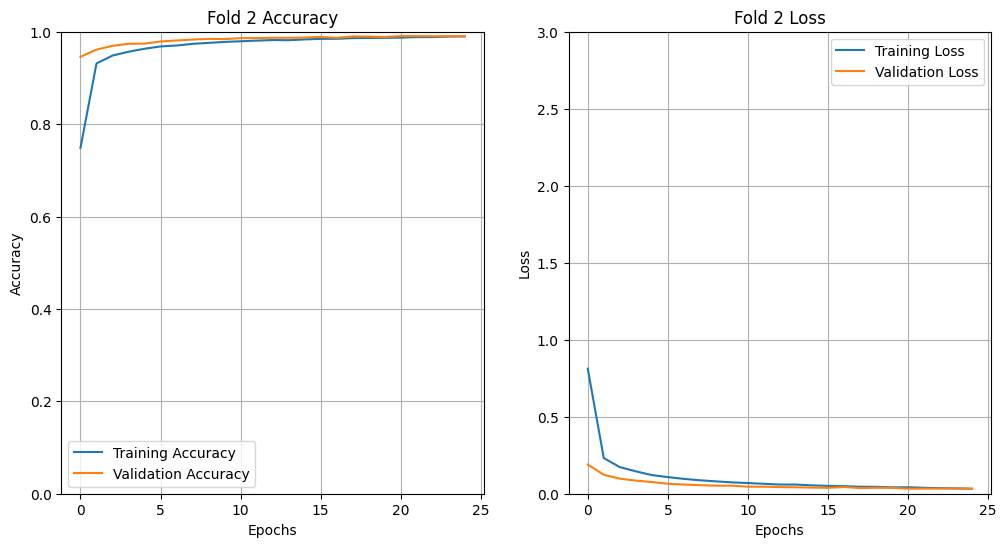

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    1 1027    1    0    0    0    2    0    0]
 [   0    0    0 1008    0    2    0    0    0    0]
 [   0    0    0    0  971    0    1    1    0    9]
 [   1    0    0    5    0  882    1    0    1    2]
 [   5    2    0    1    1    3  945    0    1    0]
 [   0    2    3    1    0    0    0 1020    1    1]
 [   3    0    1    4    1    1    0    2  957    5]
 [   0    2    0    0    3    1    0    5    0  998]]
Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5459 - loss: 1.3883 - val_accuracy: 0.9395 - val_loss: 0.2109
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9203 - loss: 0.2625 - val_accuracy: 0.9599 - val_loss: 0.1390
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9429 - loss: 0.1941 - val_accuracy: 0.9649 - val_loss: 0.1154
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9525 - loss: 0.1588 - val_accuracy: 0.9710 - val_loss: 0.0980
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9594 - loss: 0.1403 - val_accuracy: 0.9742 - val_loss: 0.0848
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9639 - loss: 0.1222 - val_accuracy: 0.9769 - val_loss: 0.0769
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9678 - loss: 0.1054 - val_accuracy: 0.9782 - val_loss: 0.0735
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9706 - loss: 0.0980 - 

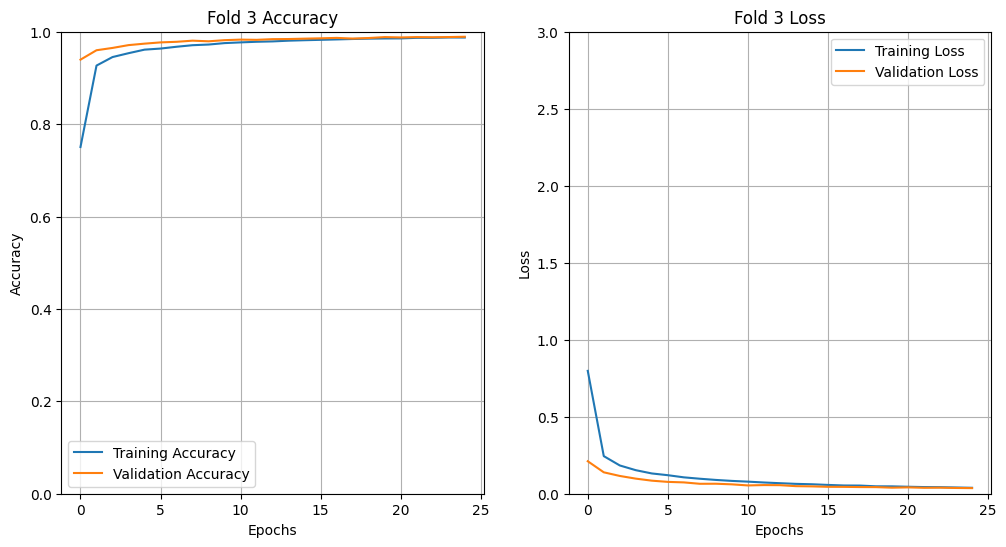

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 973    0    2    0    0    0    3    1    1    0]
 [   0 1130    1    1    0    1    0    1    1    0]
 [   2    0 1026    0    1    0    0    3    0    0]
 [   0    0    1 1002    0    3    0    2    2    0]
 [   1    0    0    0  979    0    0    0    0    2]
 [   1    0    2    6    0  880    1    0    0    2]
 [   3    2    0    0    5    3  944    0    1    0]
 [   0    2    3    1    0    0    0 1019    2    1]
 [   2    0    2    5    1    1    0    2  957    4]
 [   0    2    0    3    7    3    0    6    1  987]]
Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5462 - loss: 1.4024 - val_accuracy: 0.9475 - val_loss: 0.1890
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9231 - loss: 0.2627 - val_accuracy: 0.9649 - val_loss: 0.1166
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9485 - loss: 0.1755 - val_accuracy: 0.9742 - val_loss: 0.0892
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9560 - loss: 0.1467 - val_accuracy: 0.9777 - val_loss: 0.0739
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9626 - loss: 0.1265 - val_accuracy: 0.9797 - val_loss: 0.0680
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1113 - val_accuracy: 0.9817 - val_loss: 0.0604
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9690 - loss: 0.1012 - val_accuracy: 0.9823 - val_loss: 0.0564
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0884 - 

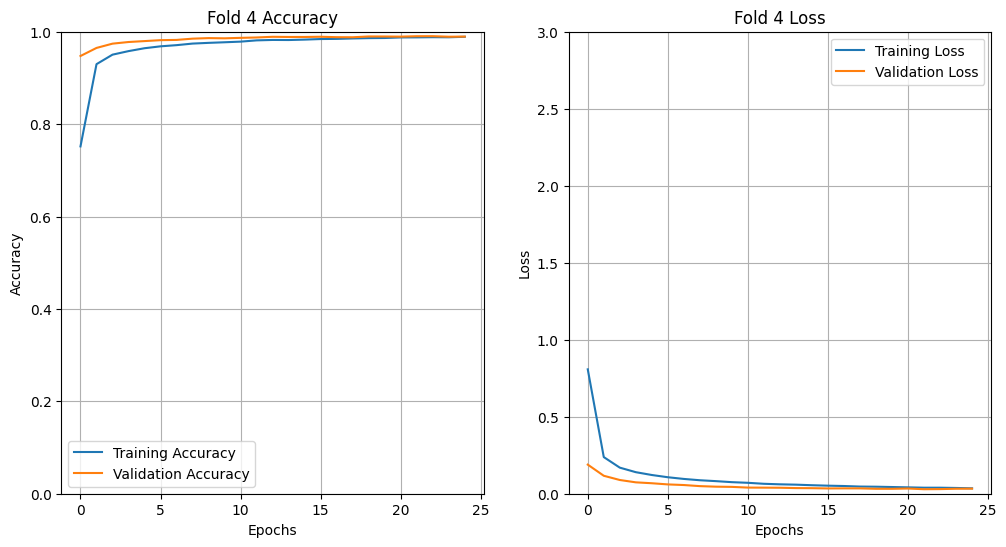

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 976    0    0    0    0    1    1    1    1    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   1    2 1027    0    0    0    0    2    0    0]
 [   0    0    1 1004    0    3    0    2    0    0]
 [   0    0    1    0  980    0    0    0    0    1]
 [   1    0    0    6    0  881    3    1    0    0]
 [   4    3    0    0    1    4  946    0    0    0]
 [   0    2    5    0    0    0    0 1020    1    0]
 [   5    1    3    3    1    2    1    2  952    4]
 [   3    3    0    1    9    2    0   10    1  980]]
Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5407 - loss: 1.3902 - val_accuracy: 0.9363 - val_loss: 0.2102
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9203 - loss: 0.2803 - val_accuracy: 0.9592 - val_loss: 0.1314
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9439 - loss: 0.1890 - val_accuracy: 0.9669 - val_loss: 0.1082
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9555 - loss: 0.1538 - val_accuracy: 0.9731 - val_loss: 0.0893
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9631 - loss: 0.1237 - val_accuracy: 0.9773 - val_loss: 0.0808
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9665 - loss: 0.1129 - val_accuracy: 0.9765 - val_loss: 0.0799
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9693 - loss: 0.1003 - val_accuracy: 0.9788 - val_loss: 0.0696
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9720 - loss: 0.0931 - 

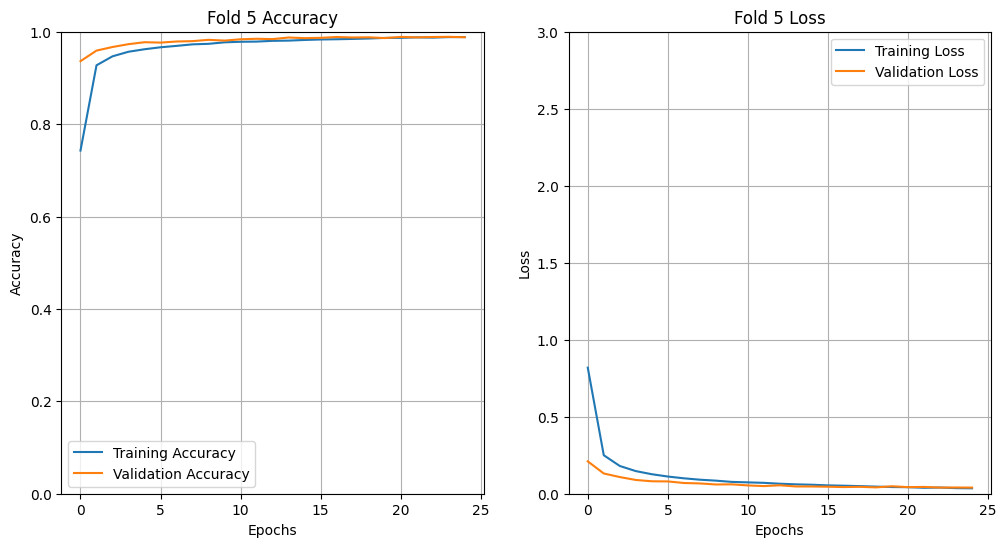

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1131    2    0    0    0    1    1    0    0]
 [   1    0 1028    1    0    0    0    1    1    0]
 [   0    0    1 1002    0    3    0    0    3    1]
 [   0    0    1    0  975    0    1    0    1    4]
 [   2    0    0    3    0  883    1    1    1    1]
 [   4    3    1    0    2    1  945    0    2    0]
 [   0    2    5    1    0    0    0 1016    3    1]
 [   1    0    1    0    1    0    0    0  970    1]
 [   0    2    1    2    6    1    0    2    5  990]]

Average Metri

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Prepare labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# KFold Cross-Validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(mnist_train_images):
    print(f"Fold {fold}/{n_splits}")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = mnist_train_images[train_index], mnist_train_images[val_index]
    train_fold_labels, val_fold_labels = mnist_train_labels_onehot[train_index], mnist_train_labels_onehot[val_index]

    # Build and compile the model
    model = create_setio_2d_cnn(input_shape=(28, 28, 1), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_fold_labels, epochs=25, batch_size=32, validation_data=(val_fold_images, val_fold_labels))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_fold_labels, val_fold_images, val_fold_labels, mnist_test_images, mnist_test_labels_onehot
    )

    # Store metrics
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Average metrics after all folds
print("\nAverage Metrics after 5-Fold Cross Validation:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}, Validation Accuracy: {np.mean(all_val_accuracies):.2f}, Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1: {np.mean(all_train_f1):.2f}, Validation F1: {np.mean(all_val_f1):.2f}, Test F1: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}, Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}, Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# Custom cnn with mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 73s 32ms/step - accuracy: 0.8270 - loss: 0.5349 - val_accuracy: 0.9828 - val_loss: 0.0584
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 0.9758 - loss: 0.0811 - val_accuracy: 0.9872 - val_loss: 0.0431
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9846 - loss: 0.0482 - val_accuracy: 0.9904 - val_loss: 0.0322
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9891 - loss: 0.0353 - val_accuracy: 0.9914 - val_loss: 0.0314
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9915 - loss: 0.0284 - val_accuracy: 0.9920 - val_loss: 0.0323
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9944 - loss: 0.0214 - val_accuracy: 0.9912 - val_loss: 0.0328
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9914 - val_loss: 0.0345
Epoch 8/25
1719/1719 ━━━━

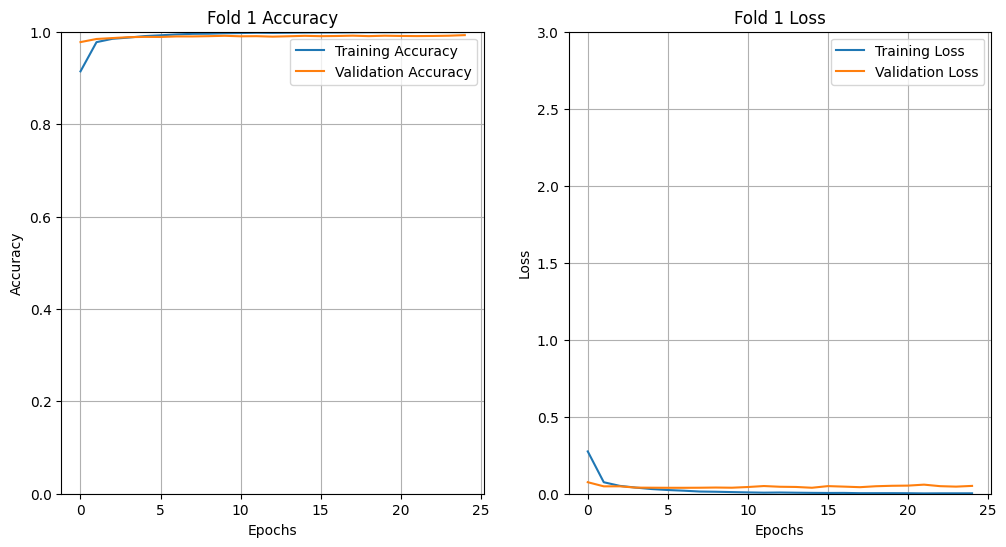

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 979    0    0    0    0    0    0    1    0    0]
 [   1 1130    0    1    0    0    2    1    0    0]
 [   2    2 1025    0    0    0    0    3    0    0]
 [   0    0    1 1008    0    1    0    0    0    0]
 [   0    0    0    0  974    0    1    0    2    5]
 [   1    0    0    5    0  885    1    0    0    0]
 [   5    2    0    0    1    1  946    0    3    0]
 [   0    2    2    0    0    0    0 1022    1    1]
 [   1    0    0    1    0    0    0    0  971    1]
 [   0    0    0    1    4    1    0    3    1  999]]
Fold 2/5
Epoch

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# Inception module (simplified with fewer filters)
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize and train the VGG16 model
mnist_vgg16_model = hybrid_googlenet_vgg16(input_shape=(28, 28, 1), num_classes=10)
mnist_vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy', metrics=['accuracy'])

mnist_vgg16_history = mnist_vgg16_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Prepare the labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in KFold(n_splits=5, shuffle=True, random_state=42).split(mnist_train_images):
    print(f"Fold {fold}/5")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = mnist_train_images[train_index], mnist_train_images[val_index]
    train_fold_labels, val_fold_labels = mnist_train_labels_onehot[train_index], mnist_train_labels_onehot[val_index]

    # Build and compile the model
    model = hybrid_googlenet_vgg16(input_shape=(28, 28, 1), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_fold_labels, epochs=25, batch_size=32, validation_data=(val_fold_images, val_fold_labels))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_fold_labels, val_fold_images, val_fold_labels, mnist_test_images, mnist_test_labels_onehot
    )

    # Store the metrics for each fold
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Calculate and print the average metrics
print(f"\nAverage Metrics over 5 folds:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}")
print(f"Validation Accuracy: {np.mean(all_val_accuracies):.2f}")
print(f"Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1 Score: {np.mean(all_train_f1):.2f}")
print(f"Validation F1 Score: {np.mean(all_val_f1):.2f}")
print(f"Test F1 Score: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}")
print(f"Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}")
print(f"Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# FUsion 1 vgg resnet cifar

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.2025 - loss: 3.9088 - val_accuracy: 0.3634 - val_loss: 1.6507
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.3830 - loss: 1.6141 - val_accuracy: 0.4195 - val_loss: 1.5100
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.4810 - loss: 1.3913 - val_accuracy: 0.5286 - val_loss: 1.3055
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.5477 - loss: 1.2519 - val_accuracy: 0.5433 - val_loss: 1.2591
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.6004 - loss: 1.1247 - val_accuracy: 0.6201 - val_loss: 1.0711
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.6375 - loss: 1.0279 - val_accuracy: 0.6467 - val_loss: 1.0211
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.6751 - loss: 0.9321 - val_accuracy: 0.6722 - val_loss: 0.9611
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.7063 -

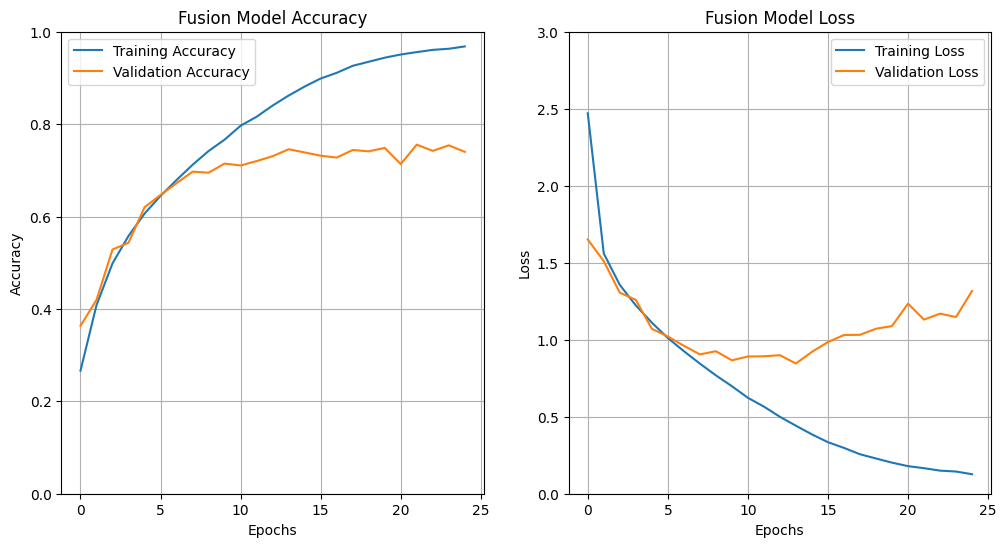

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Evaluation Metrics:
Train - Accuracy: 0.97, F1 Score: 0.97, ROC-AUC: 1.00
Validation - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Test - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    resnet_model = build_resnet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    resnet_features = resnet_model(input_resnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, resnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_resnet], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# Fusion 1 vgg googlenet cifar

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - accuracy: 0.1699 - loss: 3.9554 - val_accuracy: 0.2781 - val_loss: 1.8435
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 25ms/step - accuracy: 0.2936 - loss: 1.7968 - val_accuracy: 0.3588 - val_loss: 1.6694
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.3732 - loss: 1.6171 - val_accuracy: 0.4522 - val_loss: 1.4652
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4566 - loss: 1.4594 - val_accuracy: 0.5153 - val_loss: 1.3532
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5206 - loss: 1.3169 - val_accuracy: 0.5552 - val_loss: 1.2935
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5765 - loss: 1.1915 - val_accuracy: 0.5983 - val_loss: 1.1530
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6224 - loss: 1.0893 - val_accuracy: 0.6250 - val_loss: 1.1011
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.6594 -

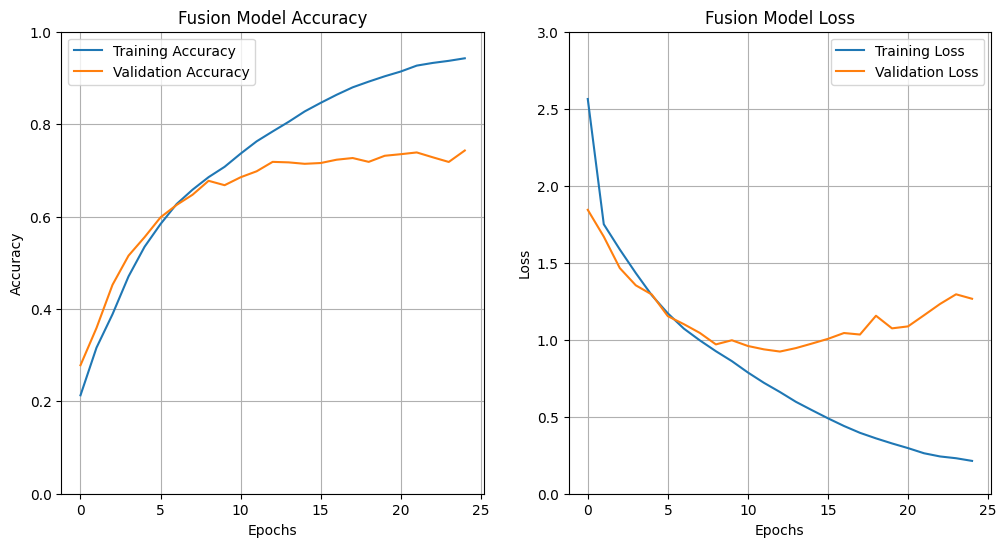

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.97, F1 Score: 0.97, ROC-AUC: 1.00
Validation - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Test - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.95


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + ResNet)
def build_fusion_model_google_vgg(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_google_vgg((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# Fusion 1 resnet googlenet cifar

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - accuracy: 0.1992 - loss: 2.0832 - val_accuracy: 0.3342 - val_loss: 1.7263
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3517 - loss: 1.6679 - val_accuracy: 0.3701 - val_loss: 1.6237
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4099 - loss: 1.5408 - val_accuracy: 0.4451 - val_loss: 1.4521
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4569 - loss: 1.4121 - val_accuracy: 0.4847 - val_loss: 1.3605
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4972 - loss: 1.3197 - val_accuracy: 0.4985 - val_loss: 1.3120
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.5286 - loss: 1.2433 - val_accuracy: 0.5373 - val_loss: 1.2273
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.5531 - loss: 1.1865 - val_accuracy: 0.5488 - val_loss: 1.2233
Epoch 8/25
1250/1250 ━━

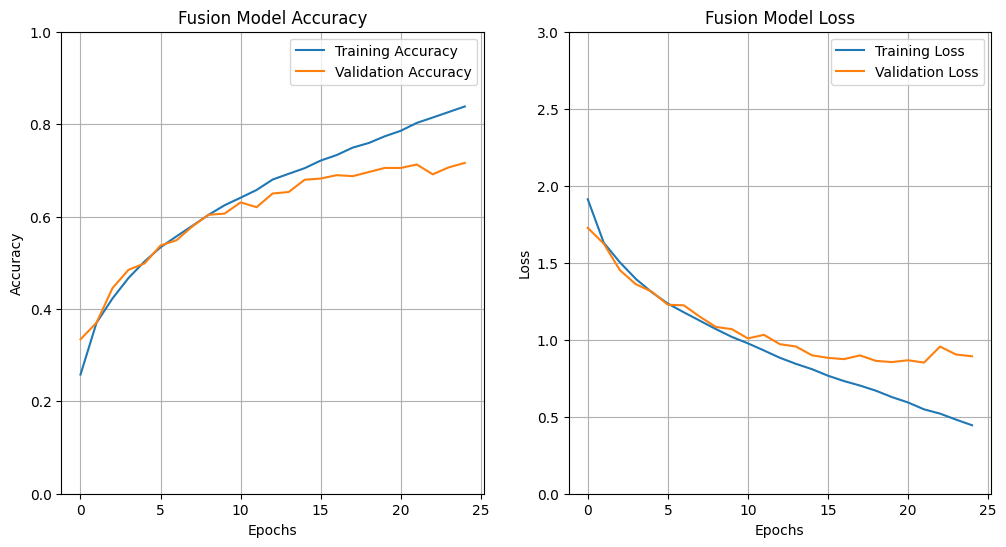

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 0.86, F1 Score: 0.85, ROC-AUC: 0.99
Validation - Accuracy: 0.86, F1 Score: 0.86, ROC-AUC: 0.99
Test - Accuracy: 0.71, F1 Score: 0.70, ROC-AUC: 0.96


In [ ]:
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model_google_resnet(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([resnet_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_google_resnet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)

# Fusion 1 custom setio cifar

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


# Inception module (simplified with fewer filters)
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model


# Define Fusion Model (Hybrid GoogleNet + SetIO 2D CNN)
def build_fusion_model_hybrid_setio(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (Hybrid GoogleNet + SetIO 2D CNN)
    hybrid_googlenet_model = hybrid_googlenet_vgg16(input_shape, num_classes)
    setio_2d_cnn_model = create_setio_2d_cnn(input_shape, num_classes)

    # Define inputs
    input_hybrid_googlenet = layers.Input(shape=input_shape)
    input_setio_2d_cnn = layers.Input(shape=input_shape)

    # Extract features from both models
    hybrid_googlenet_features = hybrid_googlenet_model(input_hybrid_googlenet)
    setio_2d_cnn_features = setio_2d_cnn_model(input_setio_2d_cnn)

    # Concatenate the features from both models
    combined_features = layers.Concatenate()([hybrid_googlenet_features, setio_2d_cnn_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final fusion model
    fusion_model = models.Model(inputs=[input_hybrid_googlenet, input_setio_2d_cnn], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)



# Prepare labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# KFold Cross-Validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(train_images):
    print(f"Fold {fold}/{n_splits}")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = train_images[train_index], train_images[val_index]
    train_fold_labels, val_fold_labels = train_labels[train_index], train_labels[val_index]

    # One-hot encode labels for training and validation
    train_labels_onehot = to_categorical(train_fold_labels, num_classes=10)
    val_labels_onehot = to_categorical(val_fold_labels, num_classes=10)

    # Build and compile the model
    model = build_fusion_model_hybrid_setio(input_shape=(32, 32, 3), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_labels_onehot, epochs=25, batch_size=32, validation_data=(val_fold_images, val_labels_onehot))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_labels_onehot, val_fold_images, val_labels_onehot, test_images, test_labels_onehot
    )

    # Store metrics
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Average metrics after all folds
print("\nAverage Metrics after 5-Fold Cross Validation:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}, Validation Accuracy: {np.mean(all_val_accuracies):.2f}, Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1: {np.mean(all_train_f1):.2f}, Validation F1: {np.mean(all_val_f1):.2f}, Test F1: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}, Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}, Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# Fusion 1 vgg resnet mnist

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 71s 34ms/step - accuracy: 0.5512 - loss: 2.7184 - val_accuracy: 0.9676 - val_loss: 0.2369
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9671 - loss: 0.2022 - val_accuracy: 0.9772 - val_loss: 0.1474
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9793 - loss: 0.1278 - val_accuracy: 0.9844 - val_loss: 0.1014
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9866 - loss: 0.0909 - val_accuracy: 0.9876 - val_loss: 0.0845
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9894 - loss: 0.0718 - val_accuracy: 0.9908 - val_loss: 0.0676
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9915 - loss: 0.0591 - val_accuracy: 0.9854 - val_loss: 0.0841
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9930 - loss: 0.0520 - val_accuracy: 0.9852 - val_loss: 0.0887
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9939 -

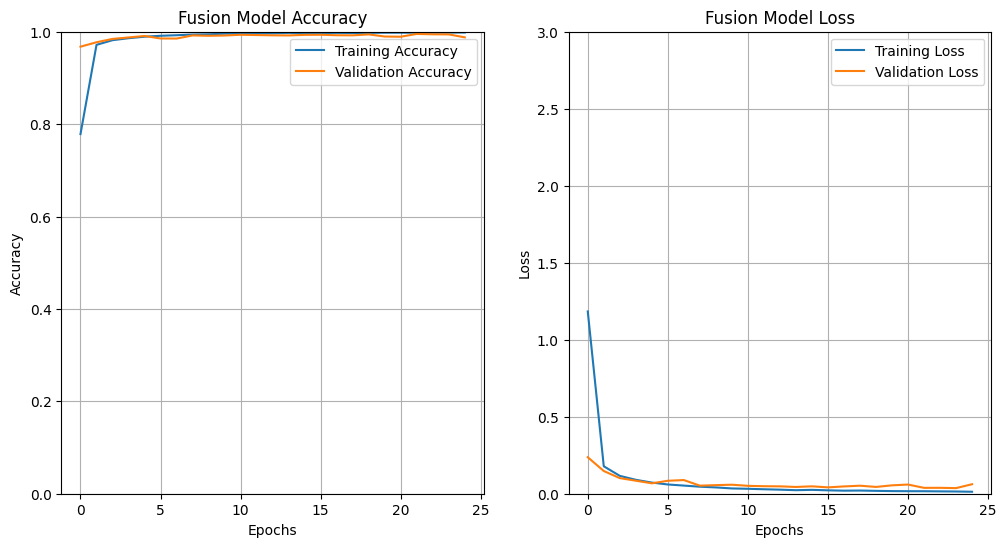

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    resnet_model = build_resnet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    resnet_features = resnet_model(input_resnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, resnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_resnet], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)




#Fusion 1 vgg googlnet mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 71s 29ms/step - accuracy: 0.4782 - loss: 2.8567 - val_accuracy: 0.9602 - val_loss: 0.2362
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 0.9613 - loss: 0.2095 - val_accuracy: 0.9764 - val_loss: 0.1359
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9769 - loss: 0.1229 - val_accuracy: 0.9836 - val_loss: 0.0914
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9842 - loss: 0.0875 - val_accuracy: 0.9874 - val_loss: 0.0709
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9877 - loss: 0.0684 - val_accuracy: 0.9912 - val_loss: 0.0614
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9895 - loss: 0.0609 - val_accuracy: 0.9876 - val_loss: 0.0739
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9914 - loss: 0.0506 - val_accuracy: 0.9898 - val_loss: 0.0563
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9932 -

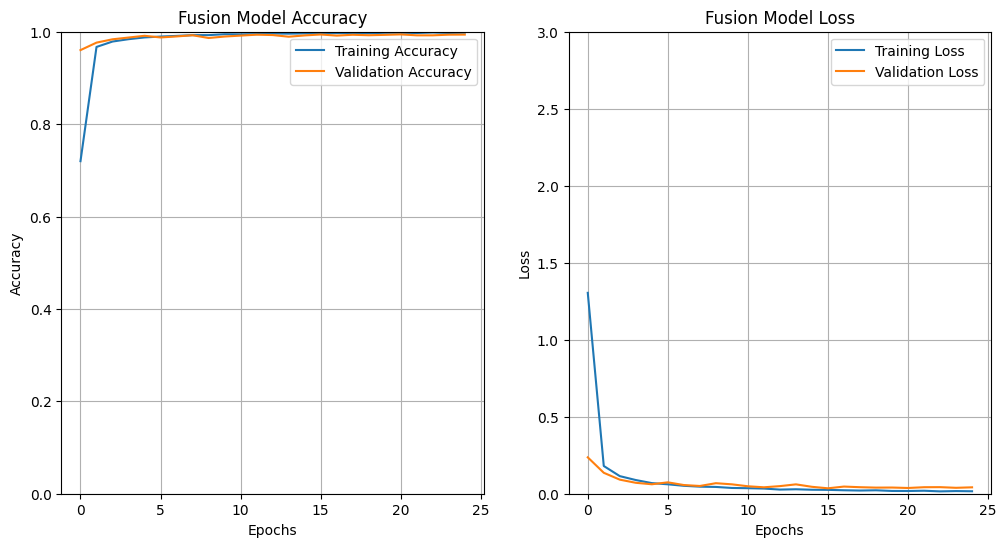

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogLeNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)



# Fusion 1 googlenet resnet mnist

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 0.4044 - loss: 1.5550 - val_accuracy: 0.8284 - val_loss: 0.5331
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.8690 - loss: 0.4289 - val_accuracy: 0.9406 - val_loss: 0.2164
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9390 - loss: 0.2183 - val_accuracy: 0.9632 - val_loss: 0.1320
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9550 - loss: 0.1558 - val_accuracy: 0.9680 - val_loss: 0.1086
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9673 - loss: 0.1145 - val_accuracy: 0.9726 - val_loss: 0.0898
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9723 - loss: 0.0970 - val_accuracy: 0.9730 - val_loss: 0.0911
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9762 - loss: 0.0807 - val_accuracy: 0.9728 - val_loss: 0.0922
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9796 -

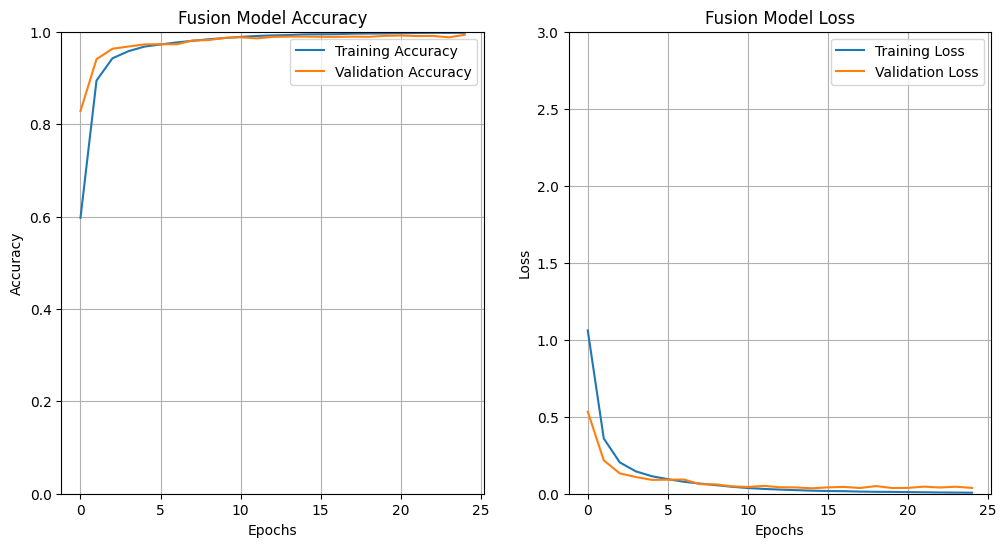

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Fusion Model (ResNet + GoogLeNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([resnet_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)



# Fusion 1 custom setio mnist

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model


# Define Fusion Model (Hybrid GoogleNet + SetIO 2D CNN)
def build_fusion_model_hybrid_setio(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (Hybrid GoogleNet + SetIO 2D CNN)
    hybrid_googlenet_model = hybrid_googlenet_vgg16(input_shape, num_classes)
    setio_2d_cnn_model = create_setio_2d_cnn(input_shape, num_classes)

    # Define inputs
    input_hybrid_googlenet = layers.Input(shape=input_shape)
    input_setio_2d_cnn = layers.Input(shape=input_shape)

    # Extract features from both models
    hybrid_googlenet_features = hybrid_googlenet_model(input_hybrid_googlenet)
    setio_2d_cnn_features = setio_2d_cnn_model(input_setio_2d_cnn)

    # Concatenate the features from both models
    combined_features = layers.Concatenate()([hybrid_googlenet_features, setio_2d_cnn_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final fusion model
    fusion_model = models.Model(inputs=[input_hybrid_googlenet, input_setio_2d_cnn], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize and train the VGG16 model
mnist_vgg16_model = hybrid_googlenet_vgg16(input_shape=(28, 28, 1), num_classes=10)
mnist_vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy', metrics=['accuracy'])

mnist_vgg16_history = mnist_vgg16_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Prepare the labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in KFold(n_splits=5, shuffle=True, random_state=42).split(mnist_train_images):
    print(f"Fold {fold}/5")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = mnist_train_images[train_index], mnist_train_images[val_index]
    train_fold_labels, val_fold_labels = mnist_train_labels_onehot[train_index], mnist_train_labels_onehot[val_index]

    # Build and compile the model
    model = build_fusion_model_hybrid_setio(input_shape=(28, 28, 1), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_fold_labels, epochs=10, batch_size=64, validation_data=(val_fold_images, val_fold_labels))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_fold_labels, val_fold_images, val_fold_labels, mnist_test_images, mnist_test_labels_onehot
    )

    # Store the metrics for each fold
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Calculate and print the average metrics
print(f"\nAverage Metrics over 5 folds:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}")
print(f"Validation Accuracy: {np.mean(all_val_accuracies):.2f}")
print(f"Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1 Score: {np.mean(all_train_f1):.2f}")
print(f"Validation F1 Score: {np.mean(all_val_f1):.2f}")
print(f"Test F1 Score: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}")
print(f"Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}")
print(f"Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# FUSION 2 vgg resnet cifar

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.2134 - loss: 4.1311 - val_accuracy: 0.3548 - val_loss: 2.0570
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 31ms/step - accuracy: 0.3806 - loss: 2.0116 - val_accuracy: 0.4352 - val_loss: 1.9188
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.4479 - loss: 1.8980 - val_accuracy: 0.4959 - val_loss: 1.8288
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4964 - loss: 1.8264 - val_accuracy: 0.5296 - val_loss: 1.7714
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.5361 - loss: 1.7621 - val_accuracy: 0.5761 - val_loss: 1.7064
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.5750 - loss: 1.7034 - val_accuracy: 0.5784 - val_loss: 1.7078
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.6034 - loss: 1.6603 - val_accuracy: 0.6260 - val_loss: 1.6241
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.6289 -

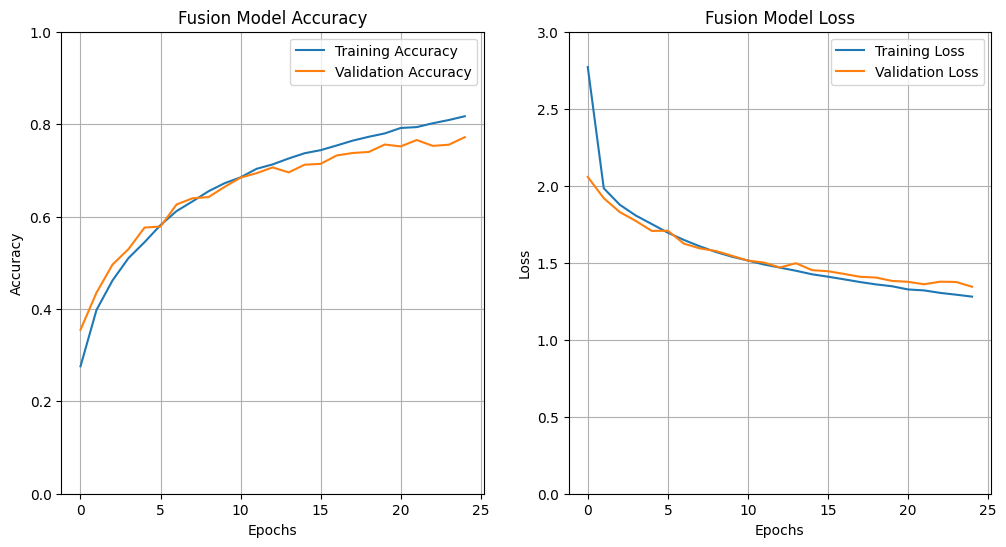

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Evaluation Metrics:
Train - Accuracy: 0.84, F1 Score: 0.83, ROC-AUC: 0.97
Validation - Accuracy: 0.77, F1 Score: 0.77, ROC-AUC: 0.95
Test - Accuracy: 0.77, F1 Score: 0.76, ROC-AUC: 0.95


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_committee_fusion_model(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (ResNet + VGG16)
    resnet_model = build_resnet(input_shape, num_classes)
    vgg16_model = build_vgg16(input_shape, num_classes)

    # Define inputs
    input_resnet = layers.Input(shape=input_shape)
    input_vgg16 = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    resnet_output = resnet_model(input_resnet)
    vgg16_output = vgg16_model(input_vgg16)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_output)
    vgg16_probs = layers.Activation('softmax')(vgg16_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([resnet_probs, vgg16_probs])


    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_resnet, input_vgg16], outputs=combined_probs)
    return committee_fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_committee_fusion_model((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# Fusion 2 vgg googlenet cifar

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.2005 - loss: 4.1748 - val_accuracy: 0.3024 - val_loss: 2.1056
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 24ms/step - accuracy: 0.3351 - loss: 2.0602 - val_accuracy: 0.3885 - val_loss: 1.9641
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.4062 - loss: 1.9471 - val_accuracy: 0.4689 - val_loss: 1.8586
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.4830 - loss: 1.8564 - val_accuracy: 0.5299 - val_loss: 1.7918
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5389 - loss: 1.7843 - val_accuracy: 0.5605 - val_loss: 1.7543
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.5675 - loss: 1.7452 - val_accuracy: 0.5935 - val_loss: 1.6964
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.5927 - loss: 1.7069 - val_accuracy: 0.6047 - val_loss: 1.6968
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6232 -

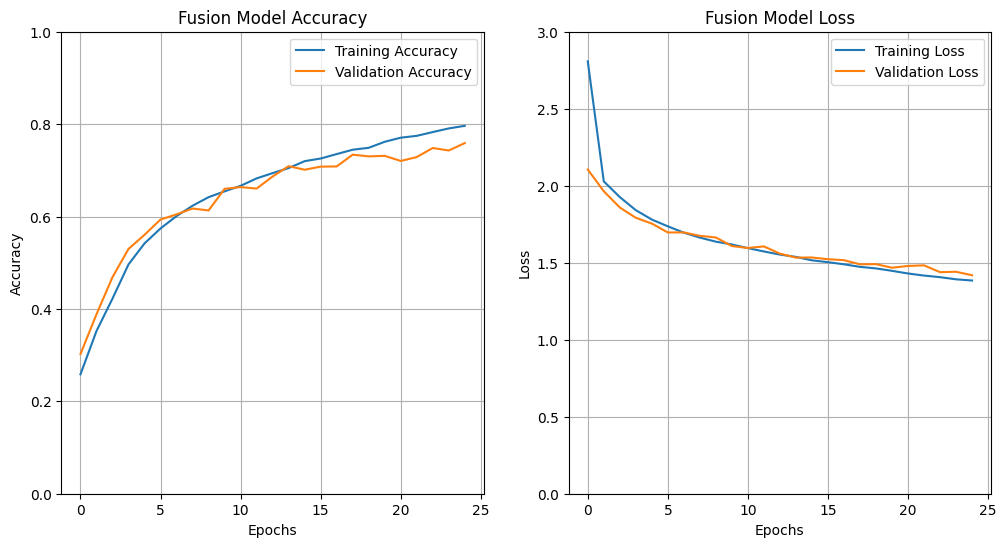

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 0.83, F1 Score: 0.83, ROC-AUC: 0.96
Validation - Accuracy: 0.76, F1 Score: 0.76, ROC-AUC: 0.94
Test - Accuracy: 0.75, F1 Score: 0.75, ROC-AUC: 0.94


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogleNet)
def build_fusion_model_google_vgg(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    vgg_probs = layers.Activation('softmax')(vgg_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([vgg_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=combined_output)
    return fusion_model



# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_google_vgg((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# Fusion 2 googlenet resnet cifar

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2093 - loss: 2.1887 - val_accuracy: 0.3572 - val_loss: 1.9995
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.3561 - loss: 1.9924 - val_accuracy: 0.3754 - val_loss: 1.9525
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4059 - loss: 1.9133 - val_accuracy: 0.4278 - val_loss: 1.8782
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4336 - loss: 1.8693 - val_accuracy: 0.4566 - val_loss: 1.8331
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4589 - loss: 1.8311 - val_accuracy: 0.4754 - val_loss: 1.7937
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.4738 - loss: 1.7995 - val_accuracy: 0.4898 - val_loss: 1.7750
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4952 - loss: 1.7669 - val_accuracy: 0.4973 - val_loss: 1.7560
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.5041 -

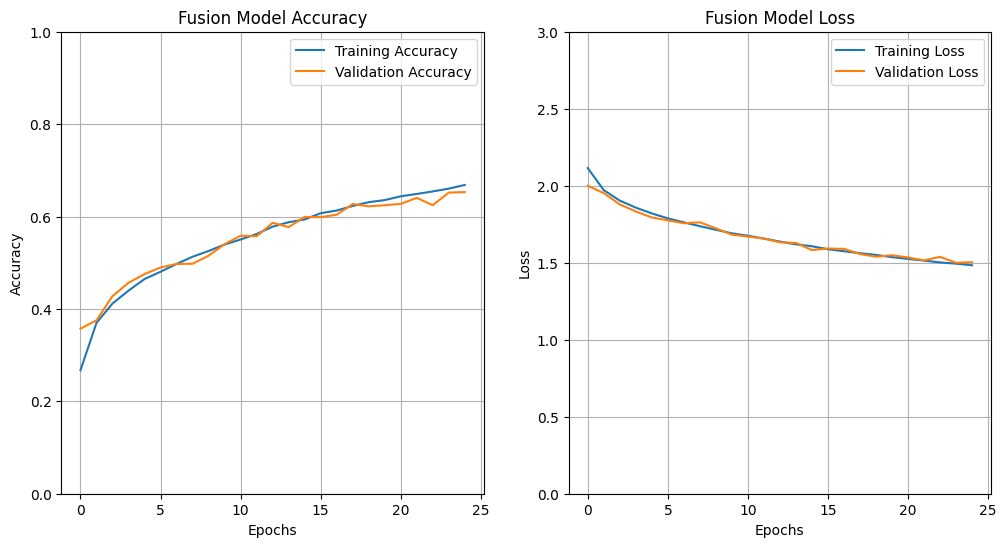

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 0.68, F1 Score: 0.68, ROC-AUC: 0.93
Validation - Accuracy: 0.68, F1 Score: 0.68, ROC-AUC: 0.93
Test - Accuracy: 0.65, F1 Score: 0.65, ROC-AUC: 0.92


In [ ]:
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model_google_resnet(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([resnet_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=combined_output)
    return fusion_model


# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_google_resnet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)

# Fusion 2 custom setio cifar

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model


# Define Fusion Model (Hybrid GoogleNet + SetIO 2D CNN)
def build_fusion_model_hybrid_setio(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (Hybrid GoogleNet + SetIO 2D CNN)
    hybrid_googlenet_model = hybrid_googlenet_vgg16(input_shape, num_classes)
    setio_2d_cnn_model = create_setio_2d_cnn(input_shape, num_classes)

    # Define inputs
    input_hybrid_googlenet = layers.Input(shape=input_shape)
    input_setio_2d_cnn = layers.Input(shape=input_shape)

    # Extract features from both models
    hybrid_googlenet_features = hybrid_googlenet_model(input_hybrid_googlenet)
    setio_2d_cnn_features = setio_2d_cnn_model(input_setio_2d_cnn)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([output1, output2])

    # Final classification layer
    output = layers.Dense(num_classes, activation='softmax')(combined_output)

    # Final fusion model
    fusion_model = models.Model(inputs=[input_hybrid_googlenet, input_setio_2d_cnn], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize and train the VGG16 model
mnist_vgg16_model = hybrid_googlenet_vgg16(input_shape=(28, 28, 1), num_classes=10)
mnist_vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy', metrics=['accuracy'])

mnist_vgg16_history = mnist_vgg16_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Prepare the labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in KFold(n_splits=5, shuffle=True, random_state=42).split(mnist_train_images):
    print(f"Fold {fold}/5")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = mnist_train_images[train_index], mnist_train_images[val_index]
    train_fold_labels, val_fold_labels = mnist_train_labels_onehot[train_index], mnist_train_labels_onehot[val_index]

    # Build and compile the model
    model = build_fusion_model_hybrid_setio(input_shape=(28, 28, 1), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_fold_labels, epochs=10, batch_size=64, validation_data=(val_fold_images, val_fold_labels))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_fold_labels, val_fold_images, val_fold_labels, mnist_test_images, mnist_test_labels_onehot
    )

    # Store the metrics for each fold
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Calculate and print the average metrics
print(f"\nAverage Metrics over 5 folds:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}")
print(f"Validation Accuracy: {np.mean(all_val_accuracies):.2f}")
print(f"Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1 Score: {np.mean(all_train_f1):.2f}")
print(f"Validation F1 Score: {np.mean(all_val_f1):.2f}")
print(f"Test F1 Score: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}")
print(f"Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}")
print(f"Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# fusion 2 vgg resnet mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6432 - loss: 3.4785 - val_accuracy: 0.9618 - val_loss: 1.2390
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 30ms/step - accuracy: 0.9608 - loss: 1.1843 - val_accuracy: 0.9772 - val_loss: 1.0482
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9729 - loss: 1.0482 - val_accuracy: 0.9772 - val_loss: 0.9470
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9781 - loss: 0.9322 - val_accuracy: 0.9834 - val_loss: 0.8588
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9856 - loss: 0.8591 - val_accuracy: 0.9866 - val_loss: 0.8524
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9876 - loss: 0.8513 - val_accuracy: 0.9874 - val_loss: 0.8452
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9884 - loss: 0.8449 - val_accuracy: 0.9874 - val_loss: 0.8442
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9904 -

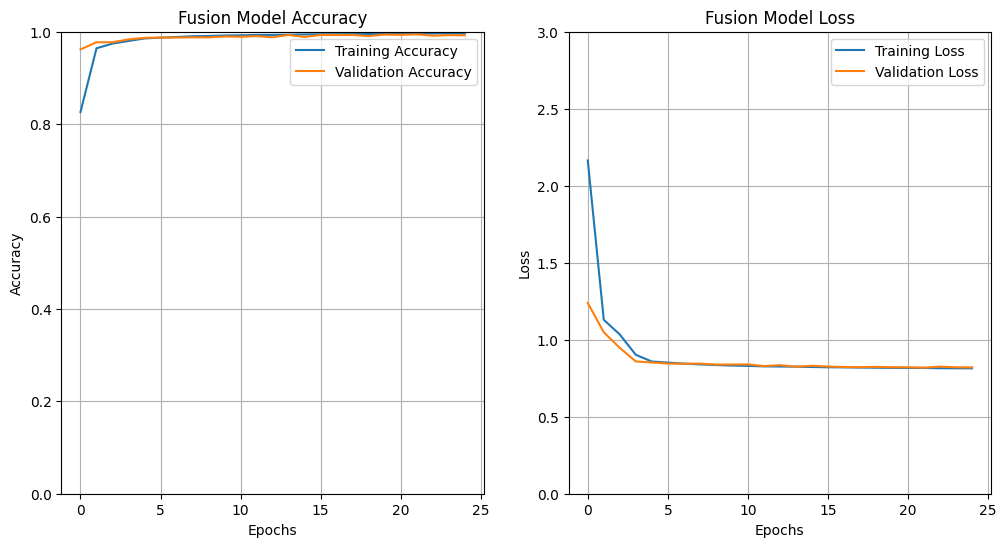

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_committee_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two models (ResNet + VGG16)
    resnet_model = build_resnet(input_shape, num_classes)
    vgg16_model = build_vgg16(input_shape, num_classes)

    # Define inputs
    input_resnet = layers.Input(shape=input_shape)
    input_vgg16 = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    resnet_output = resnet_model(input_resnet)
    vgg16_output = vgg16_model(input_vgg16)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_output)
    vgg16_probs = layers.Activation('softmax')(vgg16_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([resnet_probs, vgg16_probs])

    # Final output with softmax normalization

    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_resnet, input_vgg16], outputs=combined_probs)
    return committee_fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_committee_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)




# fusion 2 vgg google mnist

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 66s 29ms/step - accuracy: 0.6909 - loss: 3.4454 - val_accuracy: 0.9706 - val_loss: 1.1012
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9668 - loss: 1.0565 - val_accuracy: 0.9778 - val_loss: 0.9319
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9782 - loss: 0.9269 - val_accuracy: 0.9798 - val_loss: 0.8984
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9821 - loss: 0.8966 - val_accuracy: 0.9838 - val_loss: 0.8718
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9837 - loss: 0.8817 - val_accuracy: 0.9854 - val_loss: 0.8723
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9865 - loss: 0.8706 - val_accuracy: 0.9890 - val_loss: 0.8533
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9867 - loss: 0.8629 - val_accuracy: 0.9906 - val_loss: 0.8509
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9890 -

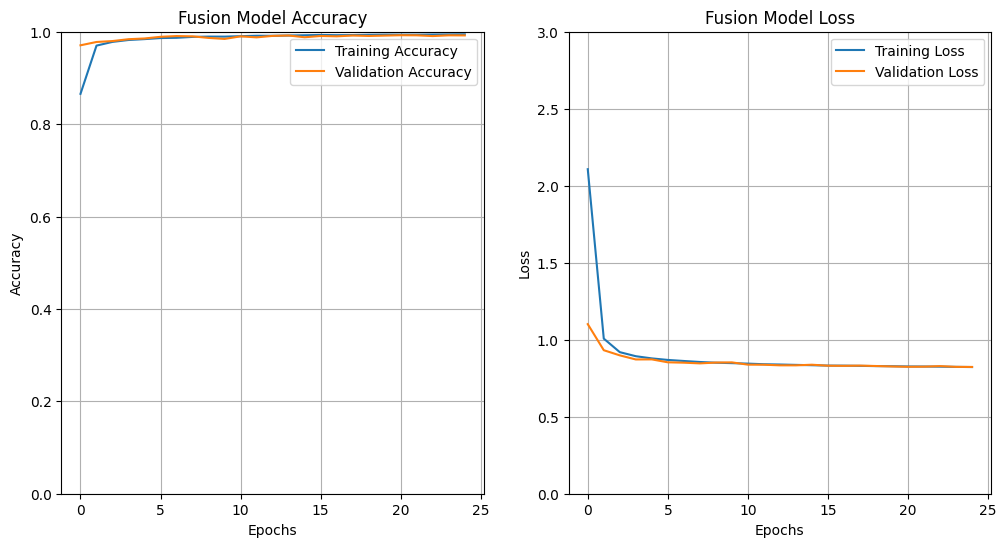

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogLeNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    vgg_probs = layers.Activation('softmax')(vgg_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([vgg_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=combined_output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)



# fusion 2 googlenet resnet mnist

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.5124 - loss: 1.7826 - val_accuracy: 0.8956 - val_loss: 1.1933
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.8800 - loss: 1.1563 - val_accuracy: 0.9264 - val_loss: 1.0254
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9187 - loss: 1.0442 - val_accuracy: 0.9548 - val_loss: 1.0071
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9416 - loss: 1.0004 - val_accuracy: 0.9708 - val_loss: 0.8705
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9689 - loss: 0.8754 - val_accuracy: 0.9782 - val_loss: 0.8565
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9765 - loss: 0.8590 - val_accuracy: 0.9818 - val_loss: 0.8413
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9807 - loss: 0.8512 - val_accuracy: 0.9812 - val_loss: 0.8395
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9827 -

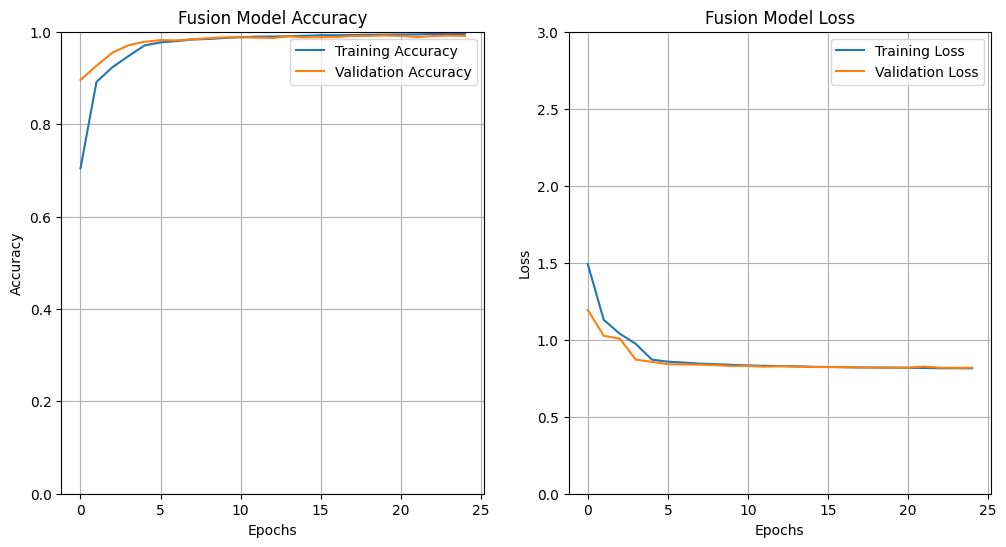

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Fusion Model (ResNet + GoogLeNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
     # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([resnet_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=combined_output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)


# Fusion 2  custom setio mnist


Training Fold 1...
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.1876 - loss: 3.9216
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.3461 - loss: 1.6767
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.4517 - loss: 1.4695
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.5216 - loss: 1.2965
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.5761 - loss: 1.1679
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.6350 - loss: 1.0488
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6800 - loss: 0.9375
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7124 - loss: 0.8531
Epoch 9/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7443 - loss: 0.7791
Epoch 10/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7652 - loss: 0.7208
Epoch 11/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8021 - l

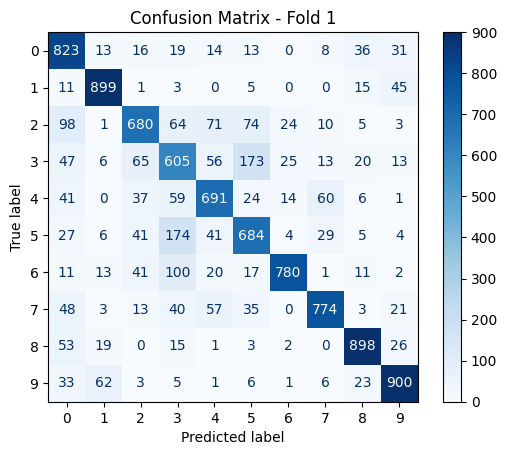


Training Fold 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.1743 - loss: 3.9348
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.3539 - loss: 1.6738
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.4180 - loss: 1.5236
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.4699 - loss: 1.4130
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.5415 - loss: 1.2649
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6022 - loss: 1.1162
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6519 - loss: 0.9961
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6898 - loss: 0.9001
Epoch 9/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7208 - loss: 0.8239
Epoch 10/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7491 - loss: 0.7462
Epoch 11/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7700 - loss: 0.6838
Epoch 12

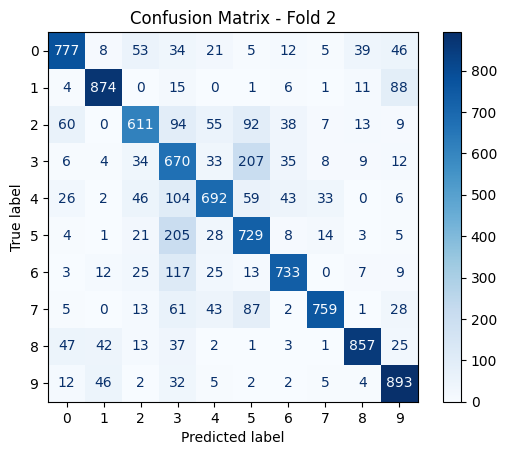


Training Fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.1788 - loss: 3.9413
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.3300 - loss: 1.7632
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.4043 - loss: 1.5915
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.4678 - loss: 1.4181
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5423 - loss: 1.2548
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.5922 - loss: 1.1300
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6375 - loss: 1.0215
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6767 - loss: 0.9295
Epoch 9/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7058 - loss: 0.8513
Epoch 10/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7283 - loss: 0.7771
Epoch 11/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7568 - loss: 0.7108
Epoch 12

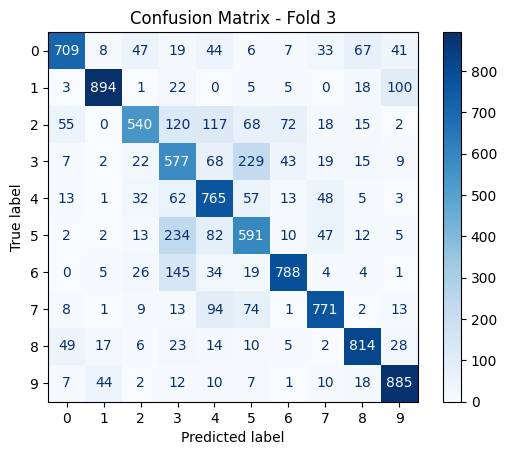


Training Fold 4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.1734 - loss: 3.9464
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3035 - loss: 1.7957
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.3958 - loss: 1.5889
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.4669 - loss: 1.4219
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5233 - loss: 1.3061
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5766 - loss: 1.1897
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6069 - loss: 1.1002
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6508 - loss: 1.0044
Epoch 9/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6816 - loss: 0.9245
Epoch 10/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7081 - loss: 0.8464
Epoch 11/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7365 - loss: 0.7651
Epoch 12

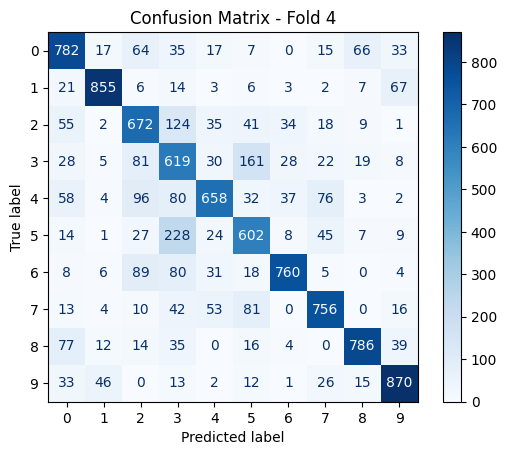


Training Fold 5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.1767 - loss: 3.9389
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3546 - loss: 1.6620
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.4345 - loss: 1.4845
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.5002 - loss: 1.3350
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5575 - loss: 1.1959
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.6138 - loss: 1.0783
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6579 - loss: 0.9749
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.6960 - loss: 0.8900
Epoch 9/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7341 - loss: 0.7945
Epoch 10/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7657 - loss: 0.7164
Epoch 11/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7938 - loss: 0.6432
Epoch 12

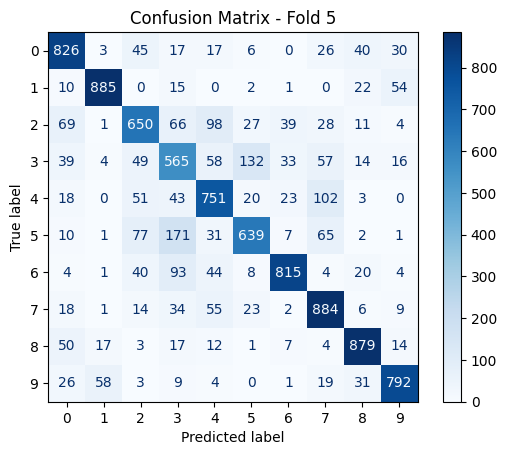


Average Metrics Across Folds:
Loss: 1.27, Accuracy: 0.75, F1 Score: 0.76, ROC-AUC: 0.96


Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


100%|██████████| 182M/182M [00:10<00:00, 16.8MB/s]


100%|██████████| 64.3M/64.3M [00:04<00:00, 15.7MB/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.1868 - loss: 2.2453 - val_accuracy: 0.1874 - val_loss: 2.2404
Epoch 2/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 70s 17ms/step - accuracy: 0.1897 - loss: 2.2392 - val_accuracy: 0.1874 - val_loss: 2.2396
Epoch 3/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.1914 - loss: 2.2358 - val_accuracy: 0.1874 - val_loss: 2.2403
Epoch 4/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.1904 - loss: 2.2359 - val_accuracy: 0.1874 - val_loss: 2.2398
Epoch 5/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.1897 - loss: 2.2375 - val_accuracy: 0.1874 - val_loss: 2.2397
Epoch 6/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1902 - loss: 2.2359 - val_accuracy: 0.1874 - val_loss: 2.2396
Epoch 7/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1893 - loss: 2.2366 - val_accuracy: 0.1874 - val_loss: 2.2392
Epoch 8/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1888 -

KeyboardInterrupt: 

# VGG with SVHN

100%|██████████| 182M/182M [00:15<00:00, 11.4MB/s]


100%|██████████| 64.3M/64.3M [00:09<00:00, 7.09MB/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.4347 - loss: 3.5948 - val_accuracy: 0.8801 - val_loss: 0.5718
Epoch 2/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 70s 22ms/step - accuracy: 0.8919 - loss: 0.5147 - val_accuracy: 0.9086 - val_loss: 0.4253
Epoch 3/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9233 - loss: 0.3729 - val_accuracy: 0.9252 - val_loss: 0.3535
Epoch 4/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9356 - loss: 0.3154 - val_accuracy: 0.9317 - val_loss: 0.3252
Epoch 5/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9476 - loss: 0.2790 - val_accuracy: 0.9315 - val_loss: 0.3327
Epoch 6/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9566 - loss: 0.2443 - val_accuracy: 0.9400 - val_loss: 0.2978
Epoch 7/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9639 - loss: 0.2145 - val_accuracy: 0.9368 - val_loss: 0.3136
Epoch 8/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9718 -

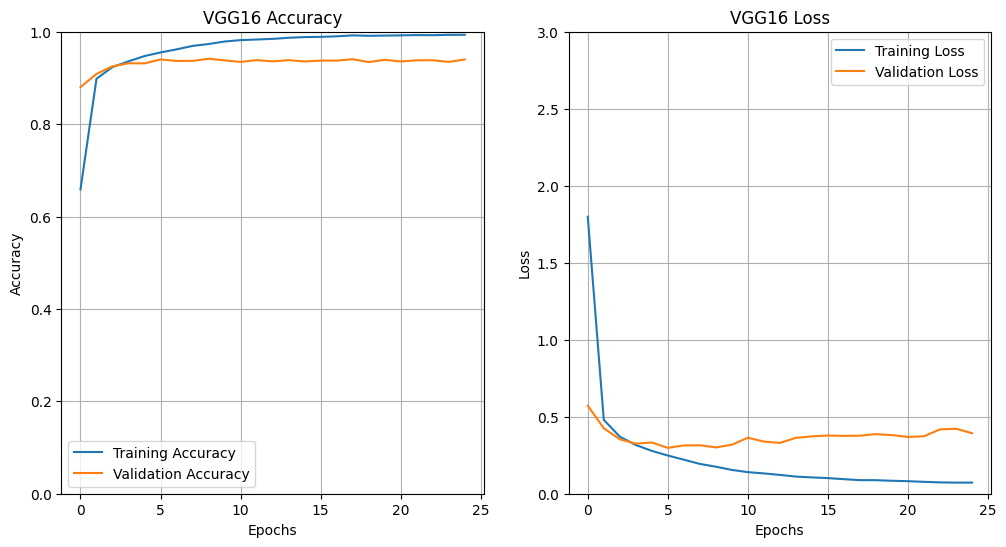

In [ ]:
import tensorflow as tf
import torch
from torchvision import datasets, transforms
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the SVHN dataset using PyTorch
def load_svhn_data():
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    train_dataset = datasets.SVHN(root="./data", split='train', transform=transform, download=True)
    test_dataset = datasets.SVHN(root="./data", split='test', transform=transform, download=True)

    # Convert PyTorch tensors to numpy arrays and normalize to [-1, 1]
    train_images = (np.transpose(train_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    train_labels = np.array(train_dataset.labels)

    test_images = (np.transpose(test_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    test_labels = np.array(test_dataset.labels)

    return (train_images, train_labels), (test_images, test_labels)

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = load_svhn_data()

# Step 2: Preprocess labels for TensorFlow (one-hot encoding)
num_classes = 10
train_labels_onehot = to_categorical(train_labels, num_classes=num_classes)
test_labels_onehot = to_categorical(test_labels, num_classes=num_classes)

# Shuffle the training data to ensure a proper validation split
train_images, train_labels_onehot = shuffle(train_images, train_labels_onehot)



# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model



# Initialize Fusion Model
fusion_model = build_vgg16((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


# Plot Accuracy and Loss for VGG16 with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Resnet with svhn

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat
Epoch 1/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.2524 - loss: 2.0963 - val_accuracy: 0.6779 - val_loss: 0.9855
Epoch 2/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7403 - loss: 0.8268 - val_accuracy: 0.8432 - val_loss: 0.5096
Epoch 3/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8571 - loss: 0.4761 - val_accuracy: 0.8830 - val_loss: 0.3840
Epoch 4/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8907 - loss: 0.3670 - val_accuracy: 0.8971 - val_loss: 0.3443
Epoch 5/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9086 - loss: 0.3068 - val_accuracy: 0.9012 - val_loss: 0.3231
Epoch 6/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9212 - loss: 0.2655 - val_accuracy: 0.9195 - val_loss: 0.2735
Epoch 7/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9319 - loss: 0.2379 -

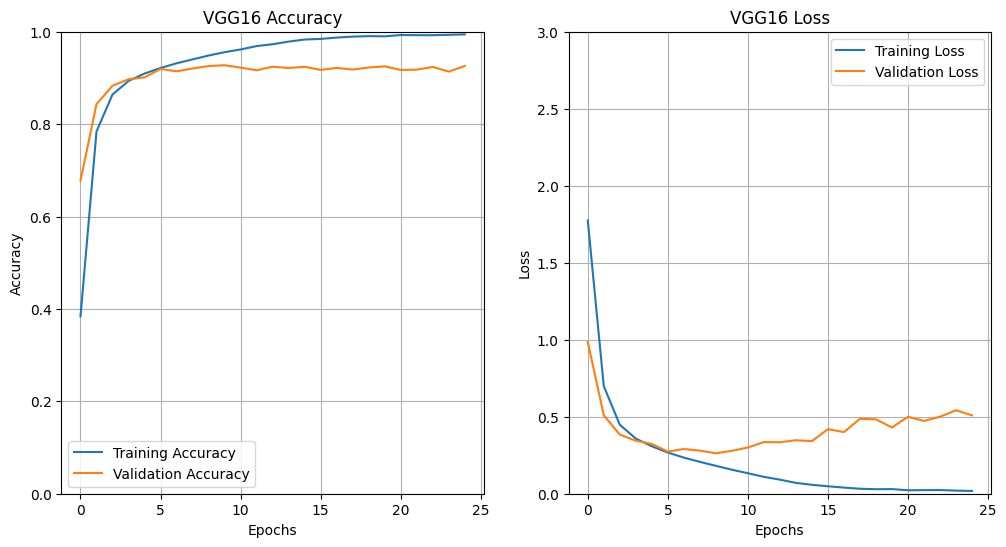

In [ ]:
import tensorflow as tf
import torch
from torchvision import datasets, transforms
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the SVHN dataset using PyTorch
def load_svhn_data():
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    train_dataset = datasets.SVHN(root="./data", split='train', transform=transform, download=True)
    test_dataset = datasets.SVHN(root="./data", split='test', transform=transform, download=True)

    # Convert PyTorch tensors to numpy arrays and normalize to [-1, 1]
    train_images = (np.transpose(train_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    train_labels = np.array(train_dataset.labels)

    test_images = (np.transpose(test_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    test_labels = np.array(test_dataset.labels)

    return (train_images, train_labels), (test_images, test_labels)

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = load_svhn_data()

# Step 2: Preprocess labels for TensorFlow (one-hot encoding)
num_classes = 10
train_labels_onehot = to_categorical(train_labels, num_classes=num_classes)
test_labels_onehot = to_categorical(test_labels, num_classes=num_classes)

# Shuffle the training data to ensure a proper validation split
train_images, train_labels_onehot = shuffle(train_images, train_labels_onehot)



# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)




# Initialize Fusion Model
fusion_model = build_resnet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


# Plot Accuracy and Loss for VGG16 with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# GOOGLENET with SVHN

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat
Epoch 1/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.2580 - loss: 2.0833 - val_accuracy: 0.5248 - val_loss: 1.4317
Epoch 2/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.5487 - loss: 1.3513 - val_accuracy: 0.6876 - val_loss: 0.9921
Epoch 3/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6731 - loss: 1.0035 - val_accuracy: 0.7702 - val_loss: 0.7790
Epoch 4/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7423 - loss: 0.8192 - val_accuracy: 0.7897 - val_loss: 0.6834
Epoch 5/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7813 - loss: 0.7035 - val_accuracy: 0.8165 - val_loss: 0.6018
Epoch 6/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8036 - loss: 0.6279 - val_accuracy: 0.8331 - val_loss: 0.5436
Epoch 7/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8264 - loss: 0.5610 - val_a

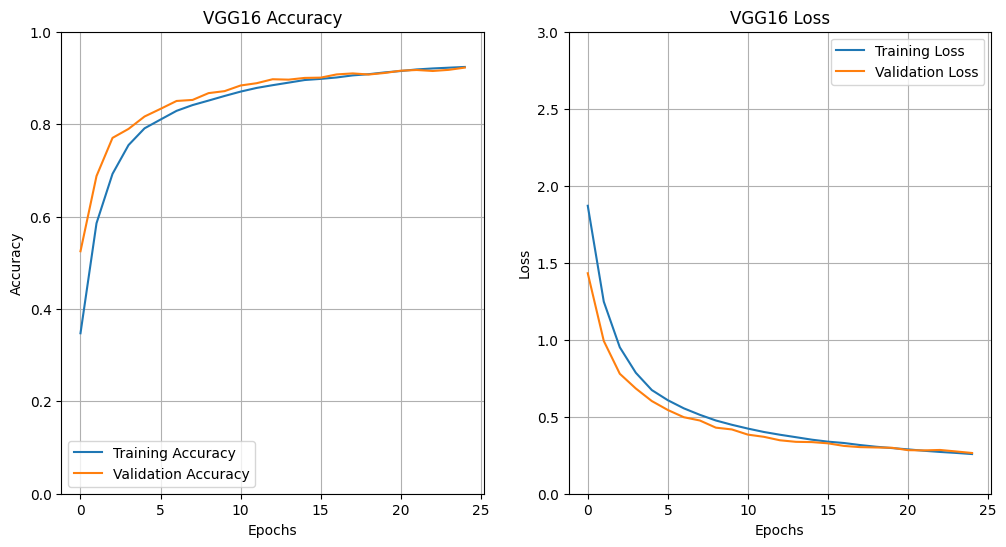

In [ ]:
import tensorflow as tf
import torch
from torchvision import datasets, transforms
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the SVHN dataset using PyTorch
def load_svhn_data():
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    train_dataset = datasets.SVHN(root="./data", split='train', transform=transform, download=True)
    test_dataset = datasets.SVHN(root="./data", split='test', transform=transform, download=True)

    # Convert PyTorch tensors to numpy arrays and normalize to [-1, 1]
    train_images = (np.transpose(train_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    train_labels = np.array(train_dataset.labels)

    test_images = (np.transpose(test_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    test_labels = np.array(test_dataset.labels)

    return (train_images, train_labels), (test_images, test_labels)

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = load_svhn_data()

# Step 2: Preprocess labels for TensorFlow (one-hot encoding)
num_classes = 10
train_labels_onehot = to_categorical(train_labels, num_classes=num_classes)
test_labels_onehot = to_categorical(test_labels, num_classes=num_classes)

# Shuffle the training data to ensure a proper validation split
train_images, train_labels_onehot = shuffle(train_images, train_labels_onehot)



# Define ResNet Block
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)




# Initialize Fusion Model
fusion_model = build_googlenet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)




# Plot Accuracy and Loss for VGG16 with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Vgg resnet fusion 1 with SVHN

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 99s 45ms/step - accuracy: 0.1880 - loss: 3.6206 - val_accuracy: 0.1938 - val_loss: 2.2318
Epoch 2/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 116s 36ms/step - accuracy: 0.1908 - loss: 2.2370 - val_accuracy: 0.1938 - val_loss: 2.2332
Epoch 3/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.1895 - loss: 2.2371 - val_accuracy: 0.1938 - val_loss: 2.2314
Epoch 4/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 66s 36ms/step - accuracy: 0.1897 - loss: 2.2363 - val_accuracy: 0.1938 - val_loss: 2.2323
Epoch 5/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 66s 36ms/step - accuracy: 0.1891 - loss: 2.2375 - val_accuracy: 0.1938 - val_loss: 2.2323
Epoch 6/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.1893 - loss: 2.2379 - val_accuracy: 0.1938 - val_loss: 2.2325
Epoch 7/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 65s 36ms/step - accuracy: 0.1893 - loss: 2.2365 - val_accuracy: 0.1938 - val_loss: 2.2336
Epoch 8/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.1875 

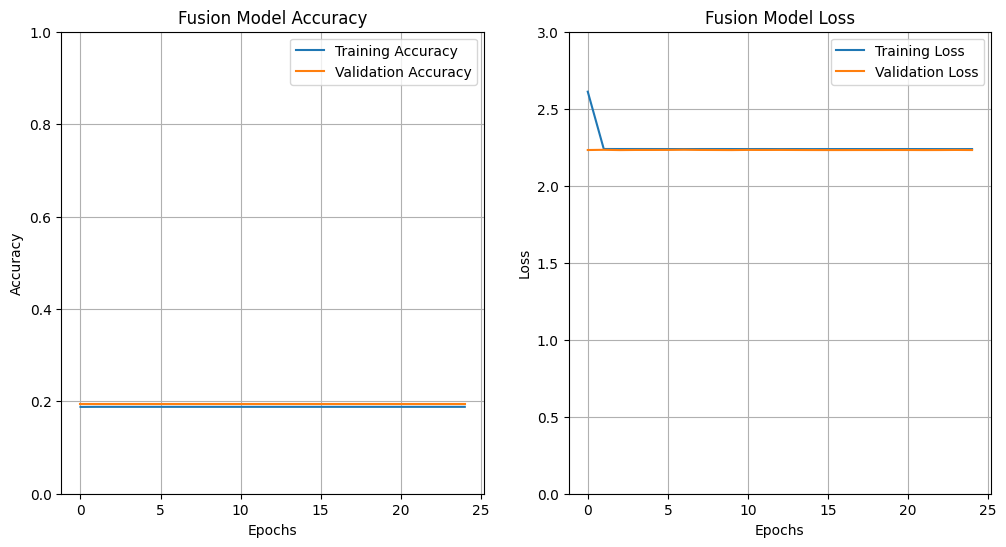

1832/1832 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
814/814 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step

Evaluation Metrics:
Train - Accuracy: 0.19, F1 Score: 0.06, ROC-AUC: 0.50
Validation - Accuracy: 0.19, F1 Score: 0.06, ROC-AUC: 0.50
Test - Accuracy: 0.20, F1 Score: 0.06, ROC-AUC: 0.50


In [ ]:
import tensorflow as tf
import torch
from torchvision import datasets, transforms
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the SVHN dataset using PyTorch
def load_svhn_data():
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    train_dataset = datasets.SVHN(root="./data", split='train', transform=transform, download=True)
    test_dataset = datasets.SVHN(root="./data", split='test', transform=transform, download=True)

    # Convert PyTorch tensors to numpy arrays and normalize to [-1, 1]
    train_images = (np.transpose(train_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    train_labels = np.array(train_dataset.labels)

    test_images = (np.transpose(test_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    test_labels = np.array(test_dataset.labels)

    return (train_images, train_labels), (test_images, test_labels)

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = load_svhn_data()

# Step 2: Preprocess labels for TensorFlow (one-hot encoding)
num_classes = 10
train_labels_onehot = to_categorical(train_labels, num_classes=num_classes)
test_labels_onehot = to_categorical(test_labels, num_classes=num_classes)

# Shuffle the training data to ensure a proper validation split
train_images, train_labels_onehot = shuffle(train_images, train_labels_onehot)



# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    resnet_model = build_resnet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    resnet_features = resnet_model(input_resnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, resnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_resnet], outputs=output)
    return fusion_model

# Initialize Fusion Model
fusion_model = build_fusion_model((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])

    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')
    train_accuracy = np.mean(train_predictions == np.argmax(train_labels, axis=1))

    # Validation Metrics
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])

    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')
    val_accuracy = np.mean(val_predictions == np.argmax(val_labels, axis=1))

    # Test Metrics
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])

    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis=1))

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
train_images, val_images, train_labels_onehot, val_labels_onehot = train_test_split(
    train_images, train_labels_onehot, test_size=0.2, random_state=42)

# Now you can evaluate the metrics using the validation set
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)




# fusion 1 googlenet resnet svhn


Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat
Epoch 1/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 59s 24ms/step - accuracy: 0.2189 - loss: 2.1759 - val_accuracy: 0.3670 - val_loss: 1.7601
Epoch 2/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 62s 17ms/step - accuracy: 0.3934 - loss: 1.6921 - val_accuracy: 0.4971 - val_loss: 1.3745
Epoch 3/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.5145 - loss: 1.3414 - val_accuracy: 0.5762 - val_loss: 1.1806
Epoch 4/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.5892 - loss: 1.1524 - val_accuracy: 0.6557 - val_loss: 1.0225
Epoch 5/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6523 - loss: 1.0112 - val_accuracy: 0.6894 - val_loss: 0.9307
Epoch 6/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.7100 - loss: 0.8823 - val_accuracy: 0.7580 - val_loss: 0.7782
Epoch 7/25
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.7471 - loss: 0.7886 -

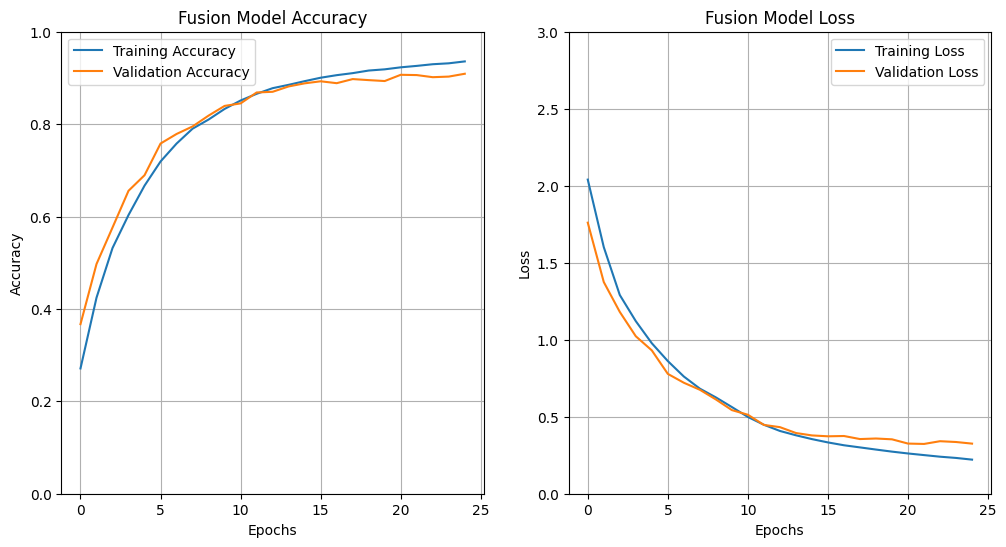

1832/1832 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.94, F1 Score: 0.94, ROC-AUC: 1.00
Validation - Accuracy: 0.94, F1 Score: 0.94, ROC-AUC: 1.00
Test - Accuracy: 0.92, F1 Score: 0.92, ROC-AUC: 0.99


In [ ]:
import tensorflow as tf
import torch
from torchvision import datasets, transforms
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the SVHN dataset using PyTorch
def load_svhn_data():
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    train_dataset = datasets.SVHN(root="./data", split='train', transform=transform, download=True)
    test_dataset = datasets.SVHN(root="./data", split='test', transform=transform, download=True)

    # Convert PyTorch tensors to numpy arrays and normalize to [-1, 1]
    train_images = (np.transpose(train_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    train_labels = np.array(train_dataset.labels)

    test_images = (np.transpose(test_dataset.data, (0, 2, 3, 1)) / 255.0) * 2 - 1
    test_labels = np.array(test_dataset.labels)

    return (train_images, train_labels), (test_images, test_labels)

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = load_svhn_data()

# Step 2: Preprocess labels for TensorFlow (one-hot encoding)
num_classes = 10
train_labels_onehot = to_categorical(train_labels, num_classes=num_classes)
test_labels_onehot = to_categorical(test_labels, num_classes=num_classes)

# Shuffle the training data to ensure a proper validation split
train_images, train_labels_onehot = shuffle(train_images, train_labels_onehot)



# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model_google_resnet(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([resnet_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=output)
    return fusion_model

# Initialize Fusion Model
fusion_model = build_fusion_model_google_resnet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])

    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')
    train_accuracy = np.mean(train_predictions == np.argmax(train_labels, axis=1))

    # Validation Metrics
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])

    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')
    val_accuracy = np.mean(val_predictions == np.argmax(val_labels, axis=1))

    # Test Metrics
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])

    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')
    test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis=1))

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
train_images, val_images, train_labels_onehot, val_labels_onehot = train_test_split(
    train_images, train_labels_onehot, test_size=0.2, random_state=42)

# Now you can evaluate the metrics using the validation set
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akash2sharma/tiny-imagenet")

print("Path to dataset files:", path)

100%|██████████| 474M/474M [00:07<00:00, 63.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/akash2sharma/tiny-imagenet/versions/1


# RESNET TINYIMAGENET

Downloading...


100%|██████████| 248M/248M [00:17<00:00, 14.5MB/s]


Extracting...
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 4

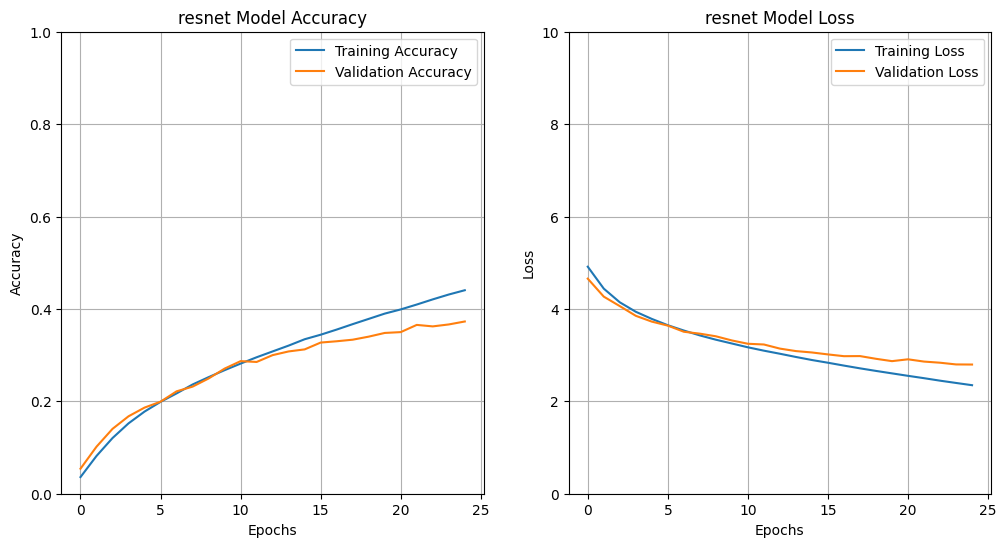

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)


# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize resnet Model
resnet_model = build_resnet((64, 64, 3), 200)
resnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train resnet Model
resnet_history = resnet_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('resnet Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('resnet Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()



# Vgg16 TinyImagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 166s 52ms/step - accuracy: 0.0154 - loss: 5.1242 - val_accuracy: 0.1136 - val_loss: 4.1613
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.1245 - loss: 4.0405 - val_accuracy: 0.2138 - val_loss: 3.5217
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.2135 - loss: 3.4767 - val_accuracy: 0.2784 - val_loss: 3.2075
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.2861 - loss: 3.0552 - val_accuracy: 0.2984 - val_loss: 3.0246
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.3623 - loss: 2.6709 - val_accuracy: 0.3424 - val_loss: 2.8741
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.4542 - loss: 2.2123 - val_accuracy: 0.3426 - val_loss: 2.8590
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.5618 - loss: 1.6822 - val_accuracy: 0.3488 - val_loss: 2.9647
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 

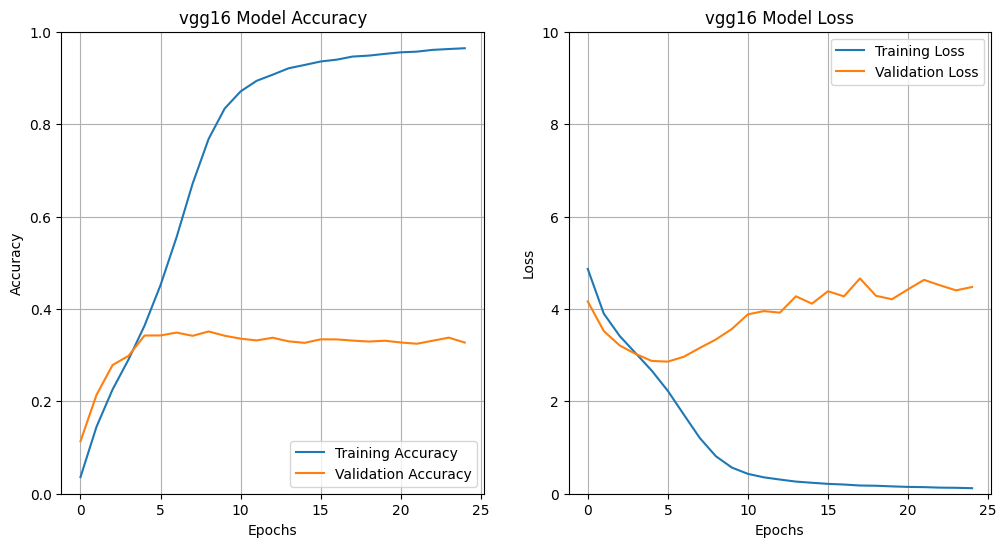

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define VGG16 Architecture
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize vgg16 Model
vgg16_model = build_vgg16((64, 64, 3), 200)
vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train vgg16 Model
vgg16_history = vgg16_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('vgg16 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('vgg16 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()



#RegnetX TinyImagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

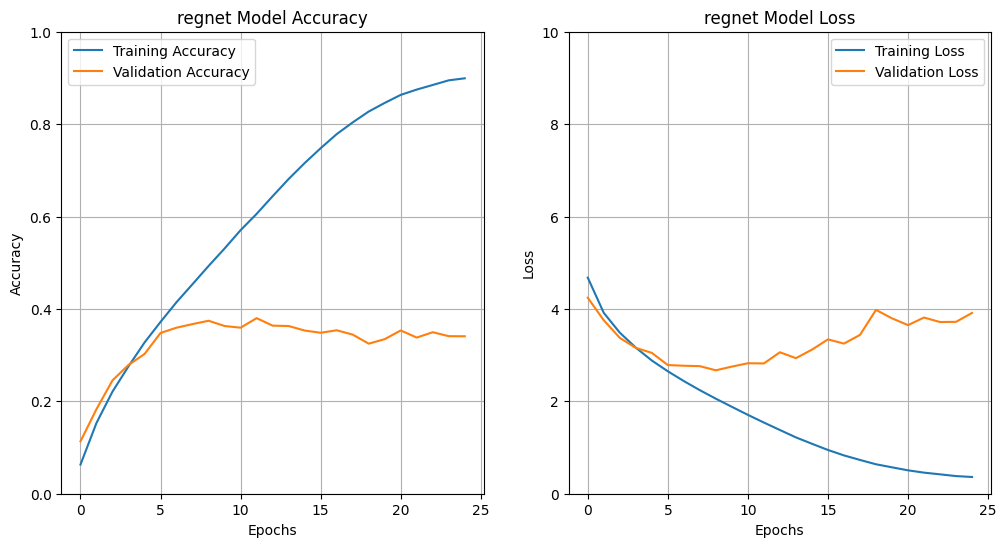

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers
from tensorflow.keras.optimizers import SGD

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(64, 64, 3), num_classes=200, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize regnet Model
regnet_model = build_regnet((64, 64, 3), 200)

# Compile the model with the new optimizer
regnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train regnet Model
regnet_history = regnet_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(regnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(regnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('regnet Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(regnet_history.history['loss'], label='Training Loss')
plt.plot(regnet_history.history['val_loss'], label='Validation Loss')
plt.title('regnet Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()

# TEST TEST


In [ ]:
!pip install pydot graphviz

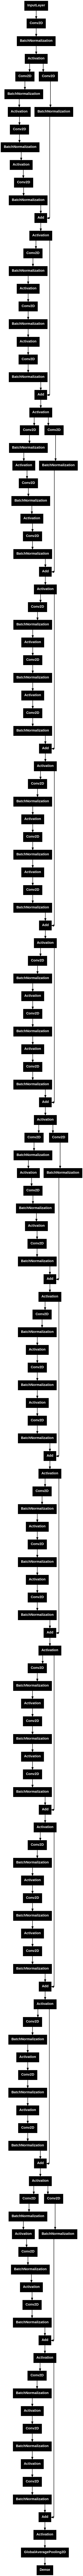

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import plot_model

def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(64, 64, 3), num_classes=200, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Build the model
model = build_regnet()

# Plot the model architecture
plot_model(model, to_file='regnet_model.png', show_shapes=False, show_layer_names=False)

# FUSION 1 VGG RESNET TINYIMAGENET

Found 100000 images belonging to 200 classes.
Found 10000 validated image filenames belonging to 200 classes.
Found 10000 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 329s 101ms/step - accuracy: 0.0065 - loss: 6.2224 - val_accuracy: 0.0168 - val_loss: 5.0606
Epoch 2/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 303s 97ms/step - accuracy: 0.0194 - loss: 5.0232 - val_accuracy: 0.0213 - val_loss: 4.8850
Epoch 3/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 300s 96ms/step - accuracy: 0.0274 - loss: 4.8522 - val_accuracy: 0.0401 - val_loss: 4.7013
Epoch 4/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 322s 103ms/step - accuracy: 0.0382 - loss: 4.7135 - val_accuracy: 0.0450 - val_loss: 4.6233
Epoch 5/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 304s 97ms/step - accuracy: 0.0528 - loss: 4.5844 - val_accuracy: 0.0564 - val_loss: 4.4949
Epoch 6/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 321s 103ms/step - accuracy: 0.0645 - loss: 4.4616 - val_accuracy: 0.0728 - val_loss: 4.3760
Epoch 7/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 303s 97ms/step - accuracy: 0.0774 - loss: 4.3815 - val_accuracy: 0.0767 - val_loss: 4.3421
Epoch 8/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 321s 103ms/step - accura

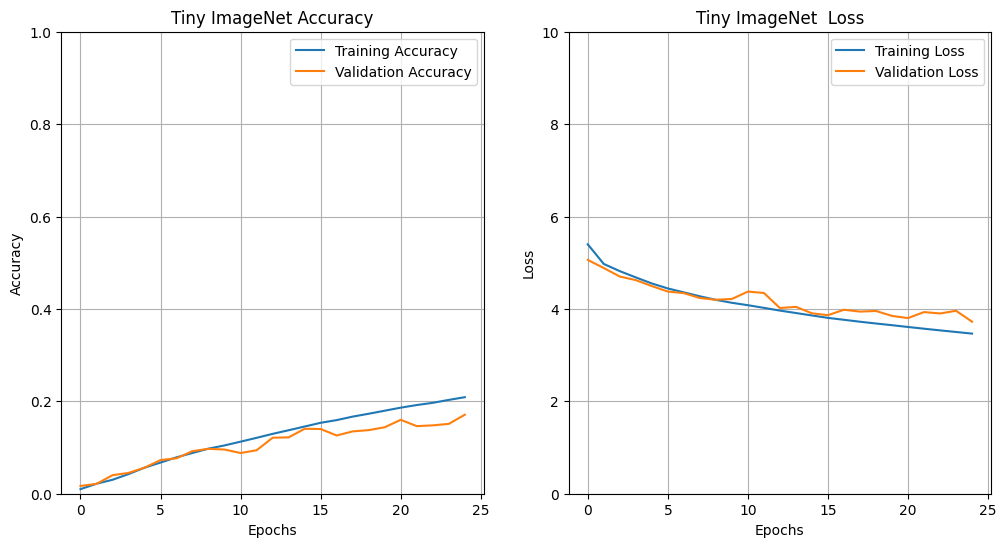

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input


# Define the base directory where the dataset is stored
base_dir = "/root/.cache/kagglehub/datasets/akash2sharma/tiny-imagenet/versions/1/tiny-imagenet-200"

# Define paths for train, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define image size and batch size
img_size = (64, 64)
batch_size = 32

# Create ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Ensure labels are one-hot encoded
)

# Load validation data
# Create a DataFrame for validation images and labels
val_images = []
val_labels = []
with open(os.path.join(val_dir, 'val_annotations.txt'), 'r') as f:
    for line in f:
        parts = line.strip().split()
        val_images.append(parts[0])
        val_labels.append(parts[1])

val_df = pd.DataFrame({
    'filename': [os.path.join(val_dir, 'images', img) for img in val_images],
    'class': val_labels
})

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
# Create a DataFrame for test images and labels
test_images = [f for f in os.listdir(os.path.join(test_dir, 'images')) if f.endswith('.JPEG')]
test_df = pd.DataFrame({
    'filename': [os.path.join(test_dir, 'images', img) for img in test_images],
    'class': ['unknown'] * len(test_images)  # Use a placeholder if labels are not available
})

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    resnet_model = build_resnet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    resnet_features = resnet_model(input_resnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, resnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_resnet], outputs=output)
    return fusion_model

# Initialize the resnet model
fusion_model = build_fusion_model(input_shape=(64, 64, 3), num_classes=200)

# Compile the model
fusion_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)






# Wrap the original generator so that it yields a tuple of ((x, x), y)
def make_fusion_generator(generator):
    for x, y in generator:
        # Convert x and y to tensors (x is a batch of images, y is a batch of one-hot labels)
        x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
        y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)
        # Yield a tuple: first element is a tuple of inputs (for VGG16 and ResNet),
        yield ((x_tensor, x_tensor), y_tensor)

# Define the expected output signature.

output_signature = (
    (tf.TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32),
     tf.TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32)),
    tf.TensorSpec(shape=(None, 200), dtype=tf.float32)
)

# Wrap your train and validation generators using tf.data.Dataset.from_generator
ds_train = tf.data.Dataset.from_generator(
    lambda: make_fusion_generator(train_generator),
    output_signature=output_signature
)

ds_val = tf.data.Dataset.from_generator(
    lambda: make_fusion_generator(val_generator),
    output_signature=output_signature
)

# Now use the wrapped datasets in your fit call
epochs = 25
history = fusion_model.fit(
    ds_train,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=ds_val,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)



# Plot Accuracy and Loss for VGG16
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Tiny ImageNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Tiny ImageNet  Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()

#ACCIDENTLY ADDED THIS PART TO THIS MODEL HEN NOT MEANT TO
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical

def evaluate_model(model, train_generator, val_generator, test_generator):
    # Function to extract images and labels from a generator
    def extract_data(generator):
        images = []
        labels = []
        for i in range(len(generator)):
            x, y = generator[i]
            images.append(x)
            labels.append(y)
        images = np.concatenate(images, axis=0)
        labels = np.concatenate(labels, axis=0)
        return images, labels

    # Extract data from generators
    train_images, train_labels = extract_data(train_generator)
    val_images, val_labels = extract_data(val_generator)
    test_images, test_labels = extract_data(test_generator)

    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Evaluate the trained fusion model
evaluate_model(fusion_model, train_generator, val_generator, test_generator)

In [ ]:
# Wrap your train and validation generators using tf.data.Dataset.from_generator
ds_test = tf.data.Dataset.from_generator(
    lambda: make_fusion_generator(test_generator),
    output_signature=output_signature
)

In [ ]:
# Predict probabilities for train, validation, and test sets
train_probs = fusion_model.predict(ds_train)
val_probs = fusion_model.predict(ds_val)
test_probs = fusion_model.predict(test_generator)

# Convert probabilities to class labels
train_preds = tf.argmax(train_probs, axis=1)
val_preds = tf.argmax(val_probs, axis=1)
test_preds = tf.argmax(test_probs, axis=1)

# Get true labels
train_true = tf.argmax(train_generator.labels, axis=1)
val_true = tf.argmax(val_generator.labels, axis=1)
test_true = tf.argmax(test_generator.labels, axis=1)

#GOOGLENET TINYIMAGENET

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

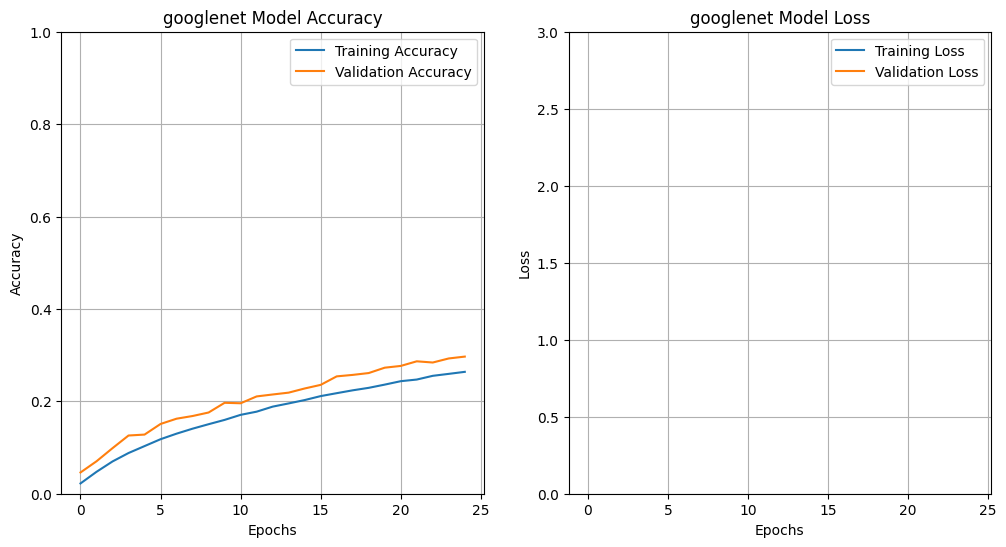

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize googlenet Model
googlenet_model = build_googlenet((64, 64, 3), 200)
googlenet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train googlenet Model
googlenet_history = googlenet_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(googlenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(googlenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('googlenet Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(googlenet_history.history['loss'], label='Training Loss')
plt.plot(googlenet_history.history['val_loss'], label='Validation Loss')
plt.title('googlenet Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()



#TINYIMAGENET VGG GOOGLENET

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 221s 68ms/step - accuracy: 0.0067 - loss: 6.2727 - val_accuracy: 0.0112 - val_loss: 5.0876
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 186s 63ms/step - accuracy: 0.0150 - loss: 5.0628 - val_accuracy: 0.0186 - val_loss: 4.9733
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 0.0205 - loss: 4.9528 - val_accuracy: 0.0278 - val_loss: 4.8731
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 0.0263 - loss: 4.8578 - val_accuracy: 0.0352 - val_loss: 4.7673
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 0.0355 - loss: 4.7478 - val_accuracy: 0.0454 - val_loss: 4.6122
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 186s 63ms/step - accuracy: 0.0441 - loss: 4.6284 - val_accuracy: 0.0554 - val_loss: 4.5432
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 187s 63ms/step - accuracy: 0.0542 - loss: 4.5512 - val_accuracy: 0.0574 - val_loss: 4.5250
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 

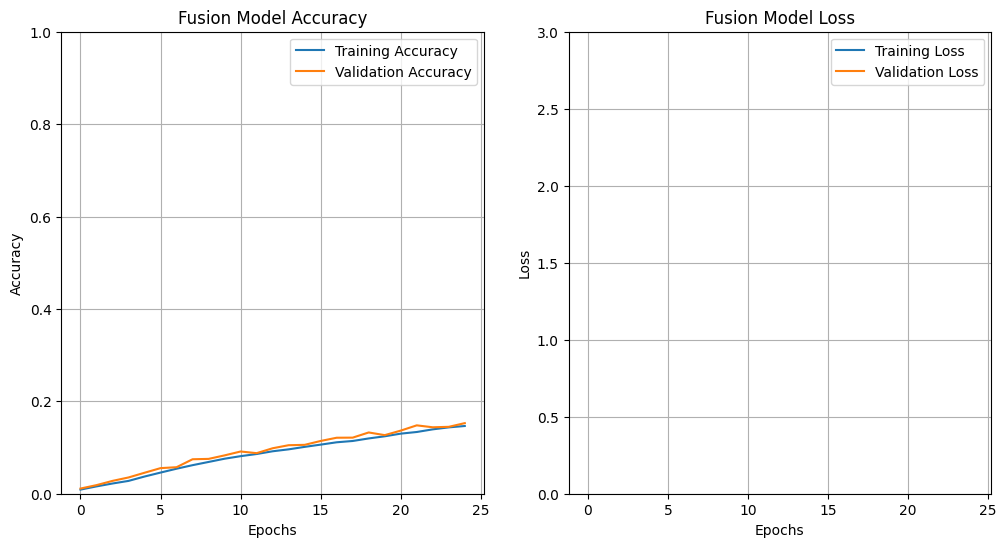

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step

Evaluation Metrics:
Train-Accuracy: 0.16, F1-score: 0.13, ROC-AUC: 0.90
Validation-Accuracy: 0.15, F1-score: 0.12, ROC-AUC: 0.90
Test-Accuracy: 0.15, F1-score: 0.12, ROC-AUC: 0.90


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogLeNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

# TINYIMAGENET vgg RESNET FUSION 1

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 280s 89ms/step - accuracy: 0.0077 - loss: 6.2486 - val_accuracy: 0.0176 - val_loss: 5.0361
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 254s 86ms/step - accuracy: 0.0202 - loss: 4.9720 - val_accuracy: 0.0288 - val_loss: 4.7585
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 254s 85ms/step - accuracy: 0.0339 - loss: 4.6990 - val_accuracy: 0.0478 - val_loss: 4.5484
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 254s 85ms/step - accuracy: 0.0510 - loss: 4.5252 - val_accuracy: 0.0526 - val_loss: 4.4361
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 253s 85ms/step - accuracy: 0.0603 - loss: 4.4160 - val_accuracy: 0.0722 - val_loss: 4.3134
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 254s 85ms/step - accuracy: 0.0726 - loss: 4.3011 - val_accuracy: 0.0770 - val_loss: 4.2278
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 253s 85ms/step - accuracy: 0.0840 - loss: 4.2043 - val_accuracy: 0.0876 - val_loss: 4.1901
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 253s 85ms/step - accuracy: 

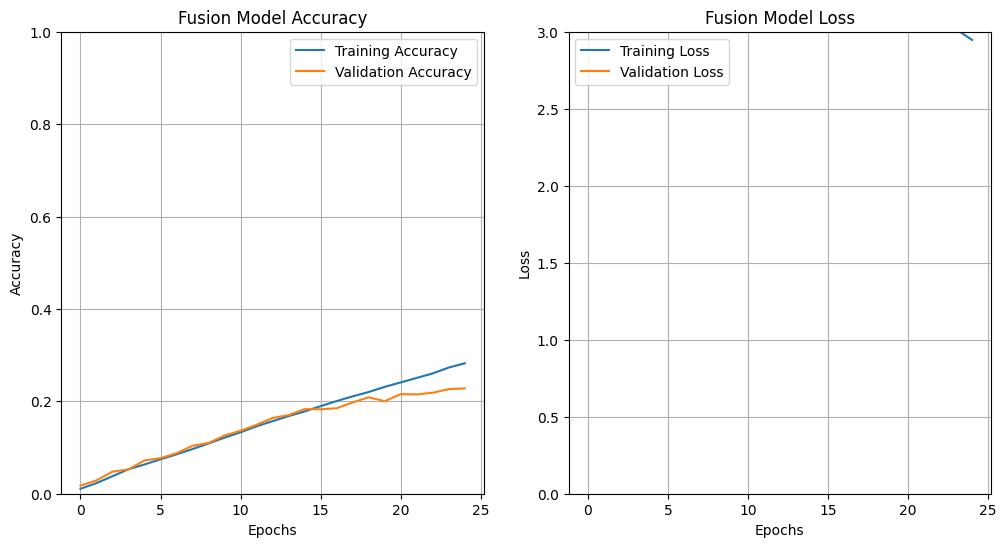

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step

Evaluation Metrics:
Train-Accuracy: 0.31, F1-score: 0.29, ROC-AUC: 0.96
Validation-Accuracy: 0.23, F1-score: 0.21, ROC-AUC: 0.93
Test-Accuracy: 0.22, F1-score: 0.20, ROC-AUC: 0.92


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)


# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    resnet_model = build_resnet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    resnet_features = resnet_model(input_resnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, resnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_resnet], outputs=output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

#Fusion 1 googlenet resnet tinyimagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

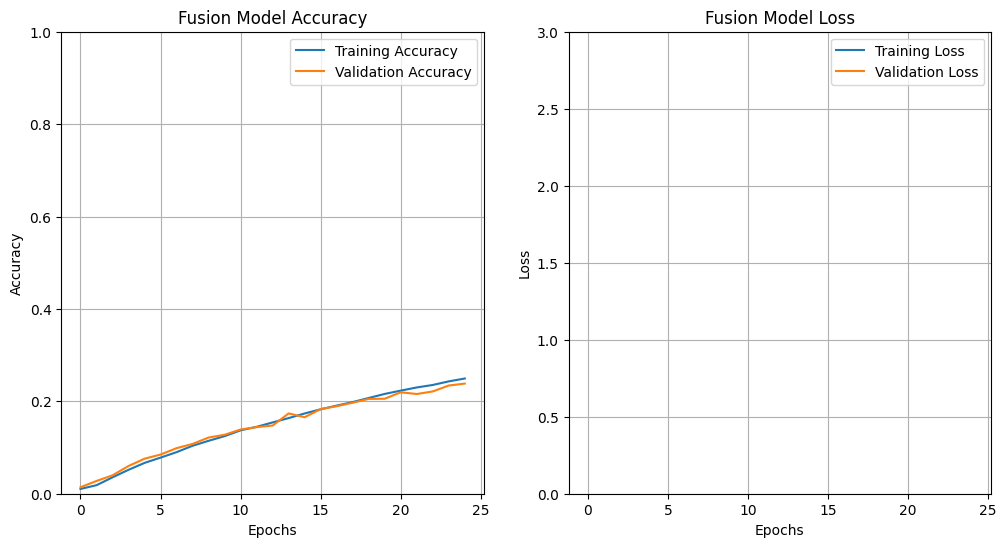

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step

Evaluation Metrics:
Train-Accuracy: 0.26, F1-score: 0.24, ROC-AUC: 0.94
Validation-Accuracy: 0.24, F1-score: 0.21, ROC-AUC: 0.93
Test-Accuracy: 0.24, F1-score: 0.21, ROC-AUC: 0.93


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([resnet_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

#fusion 2 googlenet reset tiny imagenet

Downloading...


100%|██████████| 248M/248M [00:28<00:00, 8.61MB/s]


Extracting...
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 4

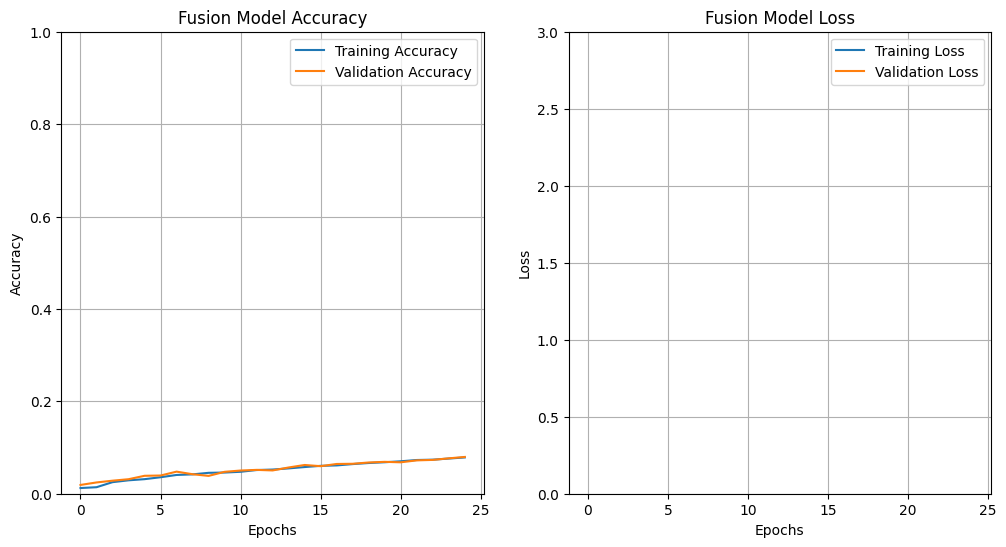

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step

Evaluation Metrics:
Train-Accuracy: 0.08, F1-score: 0.04, ROC-AUC: 0.59
Validation-Accuracy: 0.08, F1-score: 0.04, ROC-AUC: 0.59
Test-Accuracy: 0.08, F1-score: 0.04, ROC-AUC: 0.58


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([resnet_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=combined_output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

#fusion 2 vgg resnet tinyimagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 291s 92ms/step - accuracy: 0.0092 - loss: 6.3054 - val_accuracy: 0.0146 - val_loss: 5.2907
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0156 - loss: 5.2896 - val_accuracy: 0.0178 - val_loss: 5.2882
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0206 - loss: 5.2852 - val_accuracy: 0.0258 - val_loss: 5.2810
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0266 - loss: 5.2798 - val_accuracy: 0.0308 - val_loss: 5.2759
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0324 - loss: 5.2743 - val_accuracy: 0.0346 - val_loss: 5.2714
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0341 - loss: 5.2724 - val_accuracy: 0.0352 - val_loss: 5.2715
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 263s 89ms/step - accuracy: 0.0389 - loss: 5.2677 - val_accuracy: 0.0386 - val_loss: 5.2687
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 263s 89ms/step - accuracy: 

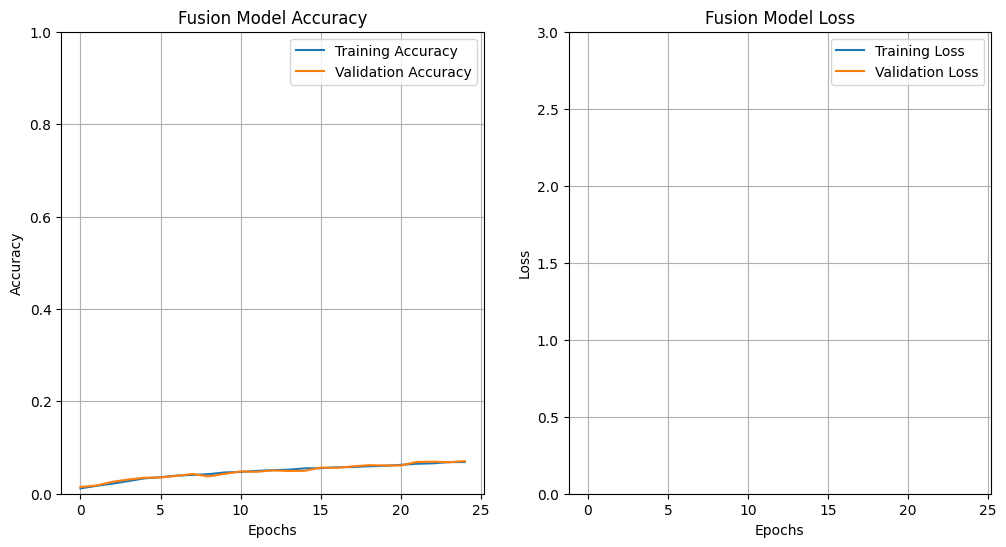

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 75s 25ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step

Evaluation Metrics:
Train-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.55
Validation-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.55
Test-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.55


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)


# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two models (ResNet + VGG16)
    resnet_model = build_resnet(input_shape, num_classes)
    vgg16_model = build_vgg16(input_shape, num_classes)

    # Define inputs
    input_resnet = layers.Input(shape=input_shape)
    input_vgg16 = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    resnet_output = resnet_model(input_resnet)
    vgg16_output = vgg16_model(input_vgg16)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_output)
    vgg16_probs = layers.Activation('softmax')(vgg16_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([resnet_probs, vgg16_probs])


    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_resnet, input_vgg16], outputs=combined_probs)
    return committee_fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

# fusion 2 vgg googlenet tinyimagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 211s 66ms/step - accuracy: 0.0081 - loss: 6.3072 - val_accuracy: 0.0128 - val_loss: 5.2911
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0153 - loss: 5.2893 - val_accuracy: 0.0230 - val_loss: 5.2843
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0212 - loss: 5.2850 - val_accuracy: 0.0274 - val_loss: 5.2795
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0255 - loss: 5.2811 - val_accuracy: 0.0308 - val_loss: 5.2751
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0316 - loss: 5.2749 - val_accuracy: 0.0316 - val_loss: 5.2735
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0348 - loss: 5.2724 - val_accuracy: 0.0360 - val_loss: 5.2709
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0371 - loss: 5.2694 - val_accuracy: 0.0436 - val_loss: 5.2652
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 

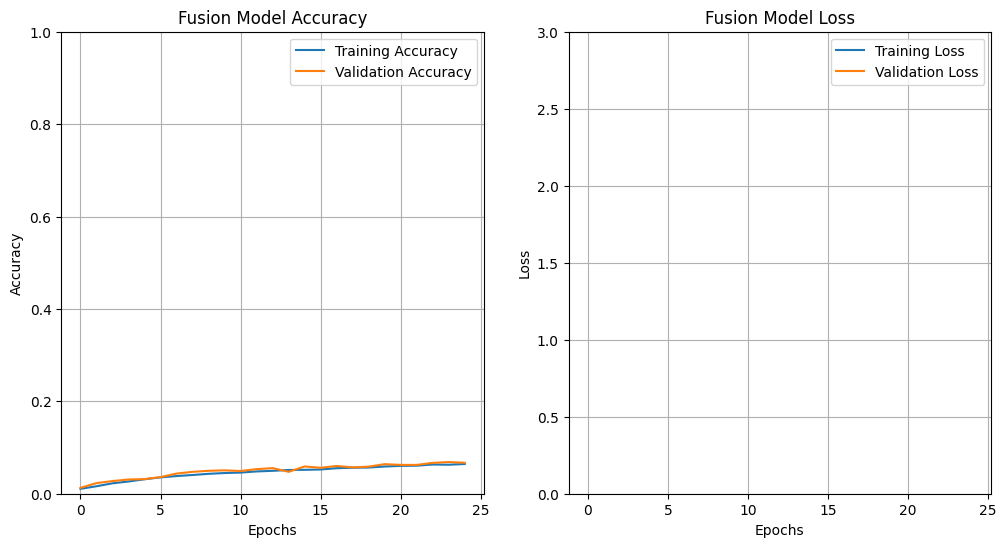

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step

Evaluation Metrics:
Train-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.56
Validation-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.56
Test-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.55


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogleNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    vgg_probs = layers.Activation('softmax')(vgg_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([vgg_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=combined_output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

#Convnext tinyimagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

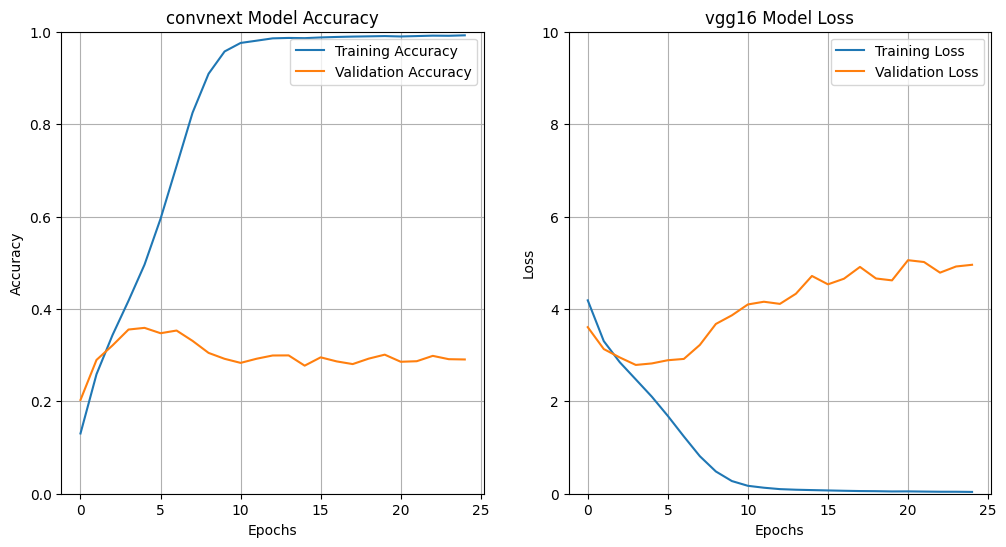

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(64, 64, 3), num_classes=200, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize convnext Model
convnext_model = build_convnext((64, 64, 3), 200)
convnext_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train convnext Model
convnext_history = convnext_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(convnext_history.history['accuracy'], label='Training Accuracy')
plt.plot(convnext_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('convnext Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(convnext_history.history['loss'], label='Training Loss')
plt.plot(convnext_history.history['val_loss'], label='Validation Loss')
plt.title('vgg16 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 187s 78ms/step - accuracy: 0.9021 - loss: 1.2080 - val_accuracy: 0.9870 - val_loss: 0.8423
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9892 - loss: 0.8308 - val_accuracy: 0.9896 - val_loss: 0.8260
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9941 - loss: 0.8168 - val_accuracy: 0.9918 - val_loss: 0.8197
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9956 - loss: 0.8126 - val_accuracy: 0.9922 - val_loss: 0.8193
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9963 - loss: 0.8103 - val_accuracy: 0.9918 - val_loss: 0.8186
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9962 - loss: 0.8084 - val_accuracy: 0.9934 - val_loss: 0.8113
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9972 - loss: 0.8061 - val_accuracy: 0.9936 - val_loss: 0.8109
Epoch 8/25
1719/17

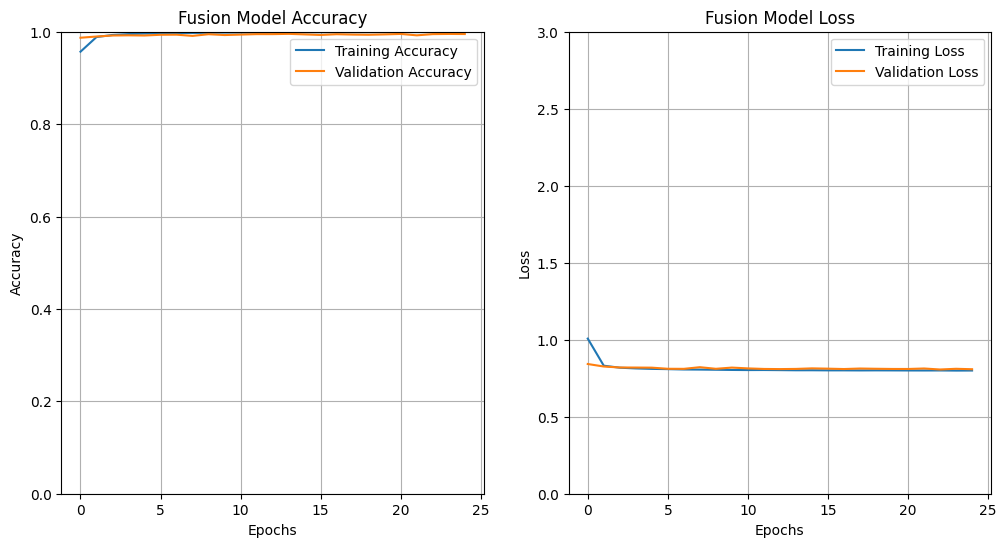

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 1.00, ROC-AUC: 1.00
Test-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00


In [1]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(28, 28, 1), num_classes=10, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(28, 28, 1), num_classes=10, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)

# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_committee_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two models (ResNet + VGG16)
    regnet_model = build_regnet(input_shape, num_classes)
    convnext_model = build_convnext(input_shape, num_classes)

    # Define inputs
    input_regnet = layers.Input(shape=input_shape)
    input_convnext = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    regnet_output = regnet_model(input_regnet)
    convnext_output = convnext_model(input_convnext)

    # Normalize outputs to ensure they are probabilities
    regnet_probs = layers.Activation('softmax')(regnet_output)
    convnext_probs = layers.Activation('softmax')(convnext_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([regnet_probs, convnext_probs])

    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_regnet, input_convnext], outputs=combined_probs)
    return committee_fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_committee_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)




Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 154s 85ms/step - accuracy: 0.4046 - loss: 1.9793 - val_accuracy: 0.5181 - val_loss: 1.7600
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.5877 - loss: 1.6454 - val_accuracy: 0.5913 - val_loss: 1.5976
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 79ms/step - accuracy: 0.6821 - loss: 1.4976 - val_accuracy: 0.6442 - val_loss: 1.5355
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 79ms/step - accuracy: 0.7617 - loss: 1.3906 - val_accuracy: 0.6737 - val_loss: 1.4858
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.8295 - loss: 1.2991 - val_accuracy: 0.6973 - val_loss: 1.4422
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.8769 - loss: 1.2153 - val_accuracy: 0.6994 - val_loss: 1.4273
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.8987 - loss: 1.1663 - val_accuracy: 0.7088 - val_loss: 1.4050
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.9207 

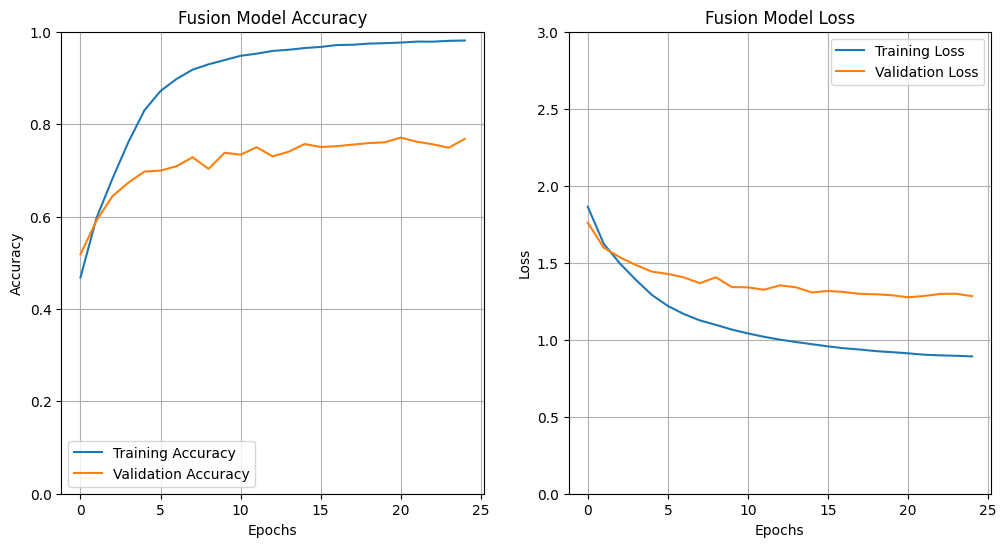

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step

Evaluation Metrics:
Train - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Validation - Accuracy: 0.77, F1 Score: 0.77, ROC-AUC: 0.96
Test - Accuracy: 0.76, F1 Score: 0.75, ROC-AUC: 0.95


In [3]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(32, 32, 3), num_classes=10, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(32, 32, 3), num_classes=10, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)

# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_committee_fusion_model(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (ResNet + VGG16)
    regnet_model = build_regnet(input_shape, num_classes)
    convnext_model = build_convnext(input_shape, num_classes)

    # Define inputs
    input_regnet = layers.Input(shape=input_shape)
    input_convnext = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    regnet_output = regnet_model(input_regnet)
    convnext_output = convnext_model(input_convnext)

    # Normalize outputs to ensure they are probabilities
    regnet_probs = layers.Activation('softmax')(regnet_output)
    convnext_probs = layers.Activation('softmax')(convnext_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([regnet_probs, convnext_probs])


    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_regnet, input_convnext], outputs=combined_probs)
    return committee_fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_committee_fusion_model((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 179s 77ms/step - accuracy: 0.6713 - loss: 0.9835 - val_accuracy: 0.9796 - val_loss: 0.0774
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 112s 65ms/step - accuracy: 0.9803 - loss: 0.0766 - val_accuracy: 0.9854 - val_loss: 0.0509
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9900 - loss: 0.0389 - val_accuracy: 0.9864 - val_loss: 0.0587
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9915 - loss: 0.0316 - val_accuracy: 0.9848 - val_loss: 0.0652
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9934 - loss: 0.0242 - val_accuracy: 0.9904 - val_loss: 0.0401
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9951 - loss: 0.0172 - val_accuracy: 0.9904 - val_loss: 0.0424
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9945 - loss: 0.0181 - val_accuracy: 0.9874 - val_loss: 0.0532
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 

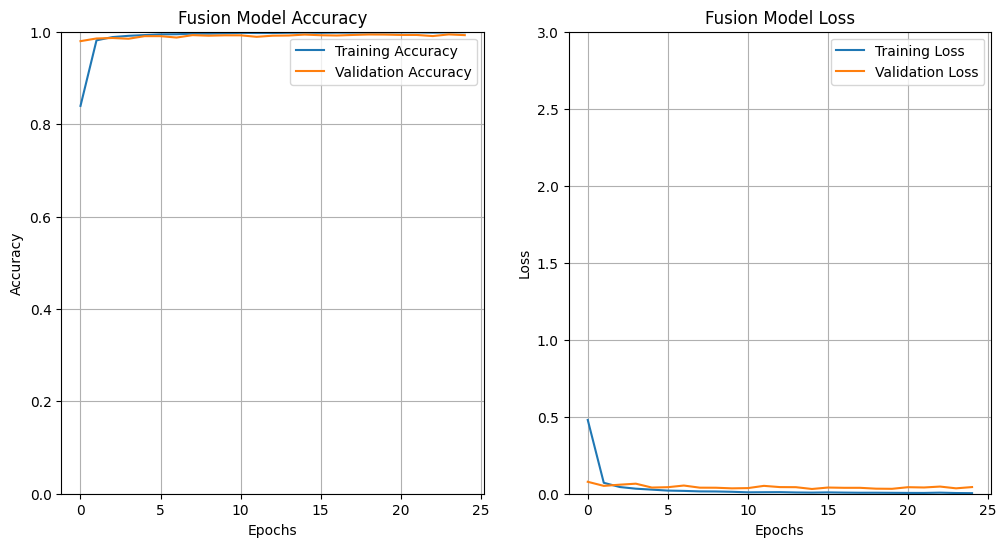

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [4]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(28, 28, 1), num_classes=10, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(28, 28, 1), num_classes=10, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two backbones
    convnext_model = build_convnext(input_shape, num_classes)
    regnet_model = build_regnet(input_shape, num_classes)

    # Define inputs
    input_convnext = Input(shape=input_shape)
    input_regnet = Input(shape=input_shape)

    # Extract embeddings

    convnext_features = convnext_model(input_convnext)
    regnet_features = regnet_model(input_regnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([convnext_features, regnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_convnext, input_regnet], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)




In [ ]:
with open(file_path, "r") as f:
    for i, line in enumerate(f, 1):
        columns = line.strip().split(",")  # Adjust to ";" if needed
        if len(columns) != 37:  # Expected number of columns
            print(f"Row {i} has {len(columns)} columns instead of 37: {line}")


Row 1 has 36 columns instead of 37: Test_type,Name,Train_accuracy_epoch_1,Train_accuracy_epoch_5,Train_accuracy_epoch_10,Train_accuracy_epoch_15,Train_accuracy_epoch_20,Train_accuracy_epoch_25,Val_accuracy_epoch_1,Val_accuracy_epoch_5,Val_accuracy_epoch_10,Val_accuracy_epoch_15,Val_accuracy_epoch_20,Val_accuracy_epoch_25,Test_accuracy_epoch_1,Test_accuracy,Train_loss_epoch_1,Train_loss_epoch_5,Train_loss_epoch_10,Train_loss_epoch_15,Train_loss_epoch_20,Train_loss_epoch_25,Val_loss_epoch_1,Val_loss_epoch_5,Val_loss_epoch_10,Val_loss_epoch_15,Val_loss_epoch_20,Val_loss_epoch_25,Test_loss_epoch_1,Test_loss,Train_F1_final,Val_F1_final,Test_F1_final,Train_ROC-AUC_final, Val_ROC-AUC_final,Test_ROC-AUC_final

Row 8 has 38 columns instead of 37: Test type 2,vgg_resnet_cifar_fusion1,0.2025,0.6004,0.7633,0.8883,0.9495,0.9735,0.3634,0.6201,0.7146,0.7387,0.7485,0.7400,,,,3.9088,1.1247,0.7042,0.3688,0.1846,0.1136,1.6507,1.0711,0.8664,0.9213,1.0888,1.3169,,,,0.97,0.74,0.74,1.00,0.96,0.96

Row 9 has 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision.datasets import VisionDataset
from torchvision.datasets.utils import download_url, extract_archive, verify_str_arg
from PIL import Image

import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


#Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Inception module (simplified with fewer filters)
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])


# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)


# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model


# Define Fusion Model (Hybrid GoogleNet + SetIO 2D CNN)
def build_fusion_model_hybrid_setio(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two models (Hybrid GoogleNet + SetIO 2D CNN)
    hybrid_googlenet_model = hybrid_googlenet_vgg16(input_shape, num_classes)
    setio_2d_cnn_model = create_setio_2d_cnn(input_shape, num_classes)

    # Define inputs
    input_hybrid_googlenet = layers.Input(shape=input_shape)
    input_setio_2d_cnn = layers.Input(shape=input_shape)

    # Extract features from both models
    hybrid_googlenet_features = hybrid_googlenet_model(input_hybrid_googlenet)
    setio_2d_cnn_features = setio_2d_cnn_model(input_setio_2d_cnn)


    # Concatenate the features from both models
    combined_features = layers.Concatenate()([hybrid_googlenet_features, setio_2d_cnn_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final fusion model
    fusion_model = models.Model(inputs=[input_hybrid_googlenet, input_setio_2d_cnn], outputs=output)
    return fusion_model


# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Build and Compile the Fusion Model
fusion_model = build_fusion_model_hybrid_setio(input_shape=(64, 64, 3), num_classes=200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Fusion Model
history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25, batch_size=32,
    validation_data=([val_images, val_images], val_labels)
)

# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

#vgg16 transfer

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, roc_auc_score
from torchvision.datasets import VisionDataset
from torchvision.datasets.utils import download_url, extract_archive, verify_str_arg
from torchvision.datasets.folder import default_loader
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, roc_auc_score
from torchvision.datasets import VisionDataset
from torchvision.datasets.utils import download_url, extract_archive, verify_str_arg
from torchvision.datasets.folder import default_loader

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images

# Load TinyImageNet dataset
def load_tiny_imagenet(root='./data', split='train', download=True):
    dataset = TinyImageNet(root=root, split=split, download=download)
    images = []
    labels = []
    for img, label in dataset:
        images.append(np.array(img))
        labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load train and test data
x_train, y_train = load_tiny_imagenet(split='train')
x_test, y_test = load_tiny_imagenet(split='val')

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(200, activation='softmax')  # TinyImageNet has 200 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,  # Use x_train and y_train directly
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 on TinyImageNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 on TinyImageNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# # Evaluate Metrics Function
# def evaluate_metrics(model, x_train, y_train, x_test, y_test):
#     y_train_onehot = to_categorical(y_train, num_classes=200)
#     y_test_onehot = to_categorical(y_test, num_classes=200)

#     # Training Metrics
#     train_loss, train_accuracy = model.evaluate(x_train, y_train_onehot, verbose=0)
#     train_predictions = np.argmax(model.predict(x_train), axis=1)
#     train_f1 = f1_score(y_train, train_predictions, average='weighted')
#     train_roc_auc = roc_auc_score(y_train_onehot, model.predict(x_train), multi_class='ovr')

#     # Test Metrics
#     test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
#     test_predictions = np.argmax(model.predict(x_test), axis=1)
#     test_f1 = f1_score(y_test, test_predictions, average='weighted')
#     test_roc_auc = roc_auc_score(y_test_onehot, model.predict(x_test), multi_class='ovr')

#     print("\nEvaluation Metrics:")
#     print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
#     print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# # Perform the evaluation
# evaluate_metrics(model, x_train, y_train, x_test, y_test)

Downloading...


100%|██████████| 248M/248M [01:20<00:00, 3.08MB/s]


Extracting...
Files already downloaded and verified.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 65s 24ms/step - accuracy: 0.1384 - loss: 4.0061 - val_accuracy: 0.0000e+00 - val_loss: 16.3546
Epoch 2/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 62s 25ms/step - accuracy: 0.2987 - loss: 2.9649 - val_accuracy: 0.0000e+00 - val_loss: 17.8516
Epoch 3/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 61s 25ms/step - accuracy: 0.3412 - loss: 2.7427 - val_accuracy: 0.0000e+00 - val_loss: 20.4397
Epoch 4/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 61s 25ms/step - accuracy: 0.3693 - loss: 2.6064 - val_accuracy: 0.0000e+00 - val_loss: 21.8220
Epoch 5/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 61s 25ms/step - accuracy: 0.3875 - loss: 2.5355 - val_accuracy: 0.0000e+00 - val_loss: 22.6627
Epoch 6/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 61s 25ms/step - accuracy: 0.4055 - loss: 2.4430 - val_accuracy: 0.0000e+00 - val_loss: 24.0405
Epoch 7/25
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 61s 24ms/step - accuracy: 0.4127

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.image import resize

# Resize images to (75, 75) or larger
def resize_images(images, target_size=(75, 75)):
    resized_images = np.zeros((images.shape[0], target_size[0], target_size[1], 3))
    for i, img in enumerate(images):
        resized_images[i] = resize(img, target_size).numpy()
    return resized_images

# Resize train and test images
x_train_resized = resize_images(x_train, target_size=(75, 75))
x_test_resized = resize_images(x_test, target_size=(75, 75))

# Load pre-trained InceptionV3 model (excluding top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(200, activation='softmax')  # TinyImageNet has 200 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,  # Use x_train and y_train directly
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('InceptionV3 on TinyImageNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('InceptionV3 on TinyImageNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

In [ ]:
# Load pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(200, activation='softmax')  # TinyImageNet has 200 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,  # Use x_train and y_train directly
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)
# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 on TinyImageNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 on TinyImageNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# # Perform the evaluation
# evaluate_metrics(model, x_train, y_train, x_test, y_test)

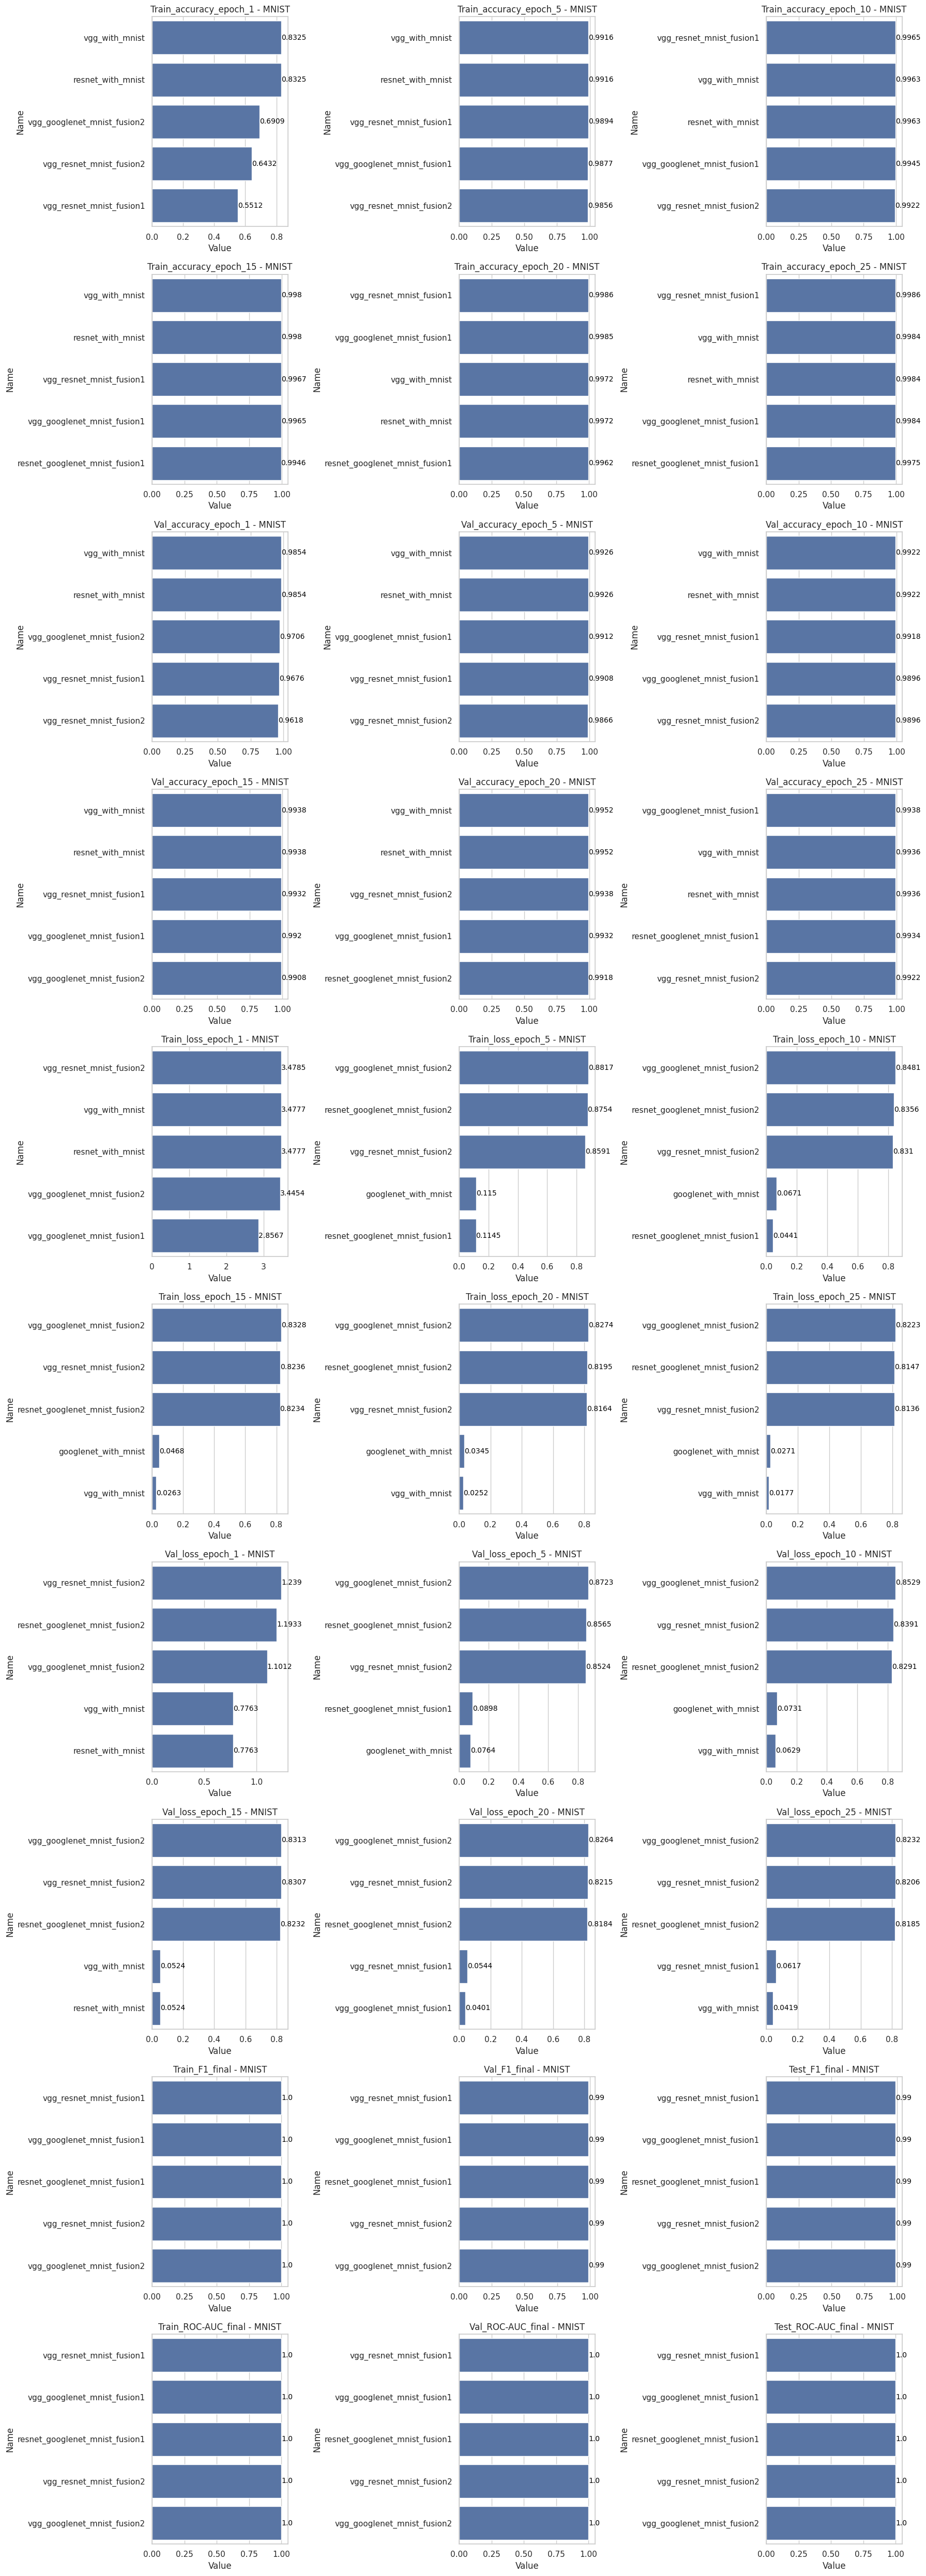

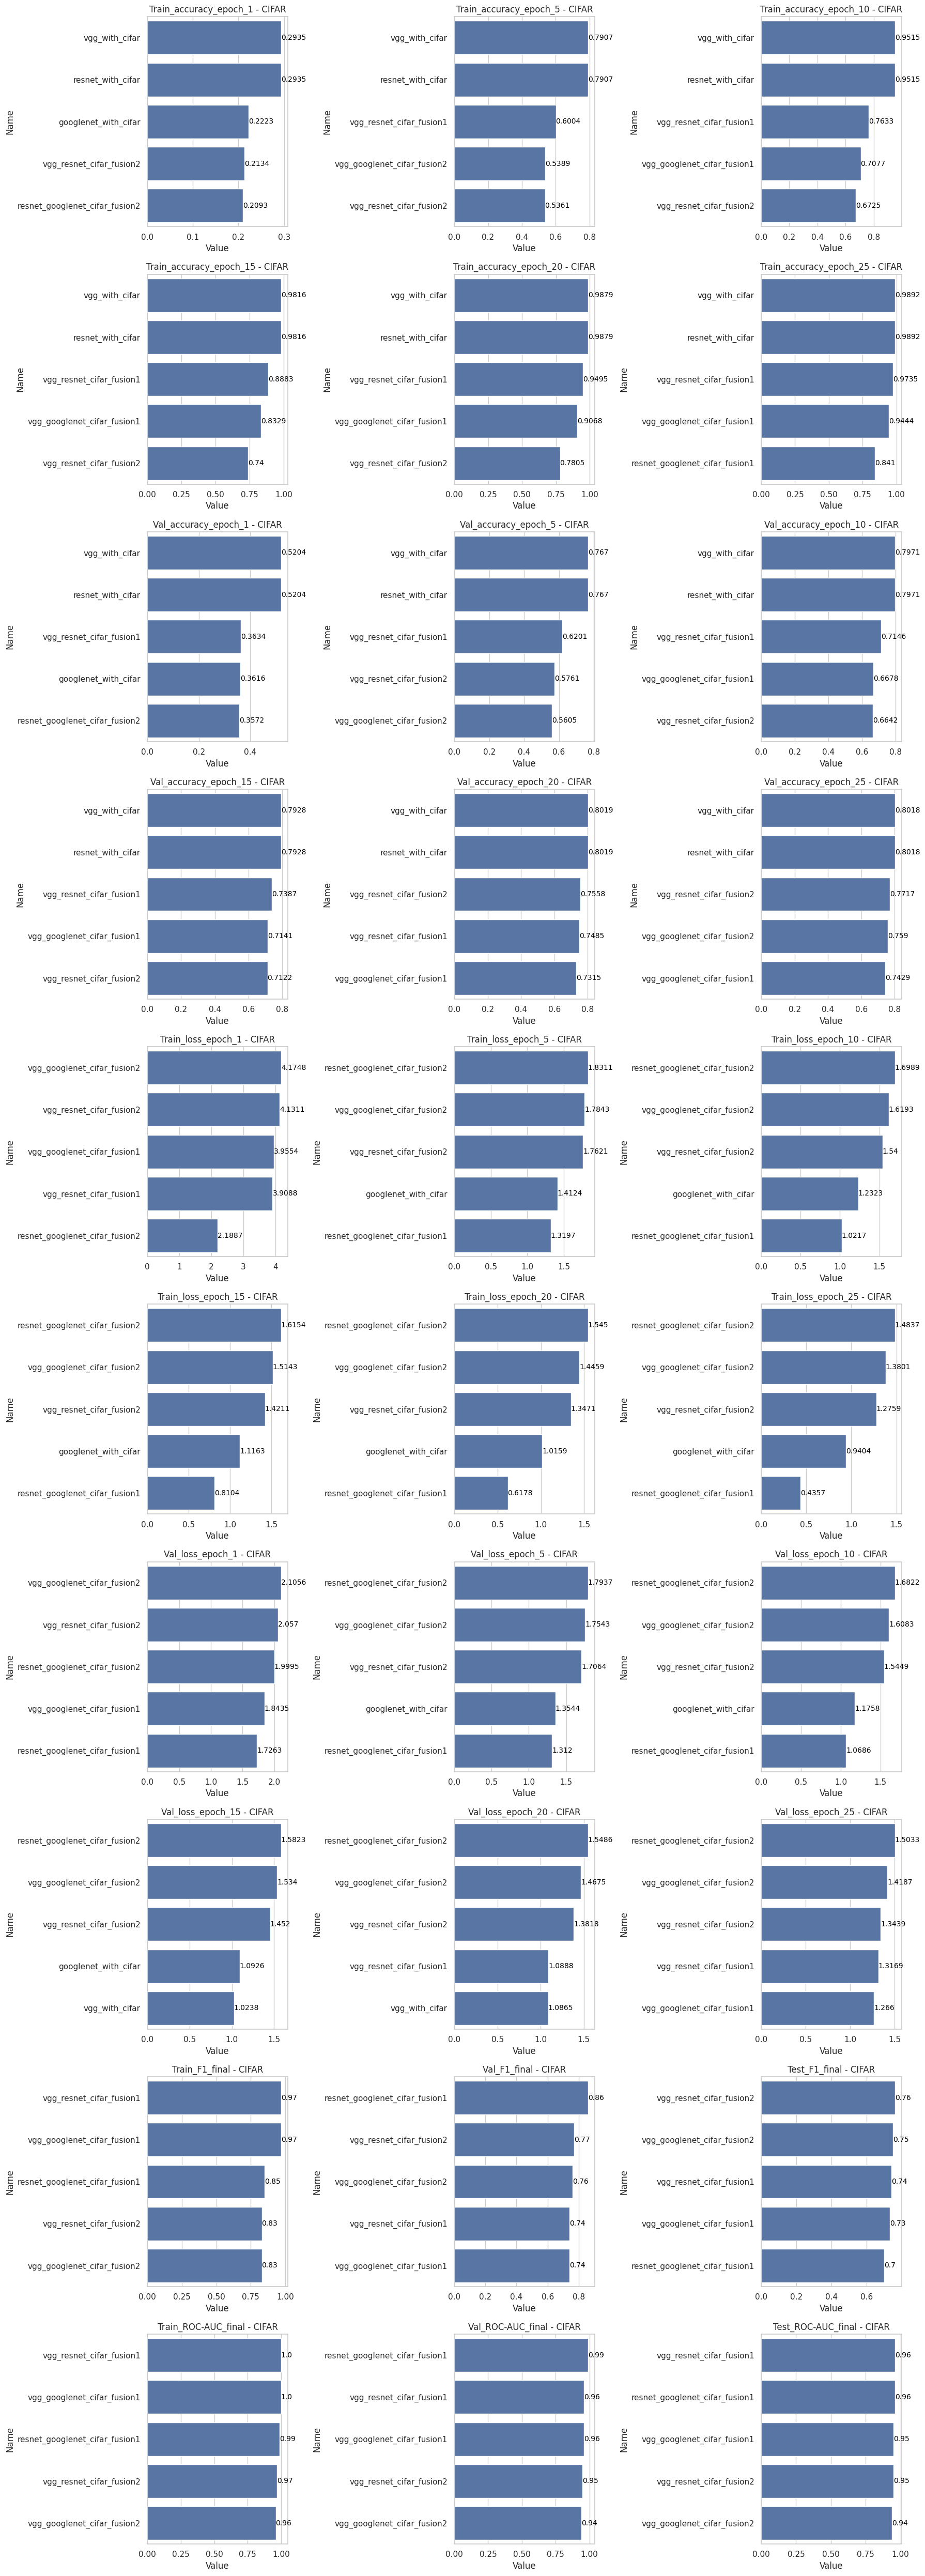

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "FINAL EVALUATION.csv"
df = pd.read_csv(file_path)

# Clean column names (strip extra spaces)
df.columns = df.columns.str.strip()

# Ensure 'Dataset' and 'Name' columns exist
if 'Dataset' not in df.columns or 'Name' not in df.columns:
    raise ValueError("The 'Dataset' or 'Name' column is missing in the dataset.")

# Filter datasets
mnist_data = df[df['Dataset'] == 'mnist']
cifar_data = df[df['Dataset'] == 'cifar']

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Function to get top 5 values for a dataset
def get_top_5(data, numerical_cols):
    return {col: data[['Name', col]].nlargest(5, col) for col in numerical_cols if data[col].notnull().any()}

# Get top 5 values for mnist and cifar
top_5_mnist = get_top_5(mnist_data, numerical_cols)
top_5_cifar = get_top_5(cifar_data, numerical_cols)

# Set plot style
sns.set(style="whitegrid")

# Function to plot top 5 values
def plot_top_5(top_5_values, title):
    num_plots = len(top_5_values)
    cols = 3  # Number of columns in subplot grid
    rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate number of rows

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 5))
    axes = axes.flatten()

    # Plot top 5 values for each metric with names and exact values inside bars
    for idx, (col, values) in enumerate(top_5_values.items()):
        sns.barplot(x=values[col], y=values['Name'], ax=axes[idx])
        axes[idx].set_title(f"{col} - {title}")
        axes[idx].set_xlabel("Value")
        axes[idx].set_ylabel("Name")

        # Add exact values inside the bars
        for i, (name, value) in enumerate(zip(values['Name'], values[col])):
            axes[idx].text(value, i, f'{value}', va='center', ha='left', fontsize=10, color='black')

    # Hide any unused subplots
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Plot top 5 for mnist
plot_top_5(top_5_mnist, "MNIST")

# Plot top 5 for cifar
plot_top_5(top_5_cifar, "CIFAR")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - accuracy: 0.1703 - loss: 5.7696 - val_accuracy: 0.3552 - val_loss: 1.7059
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.3853 - loss: 1.6495 - val_accuracy: 0.4816 - val_loss: 1.4201
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.4889 - loss: 1.3924 - val_accuracy: 0.5328 - val_loss: 1.3131
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5665 - loss: 1.2168 - val_accuracy: 0.6107 - val_loss: 1.1208
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6243 - loss: 1.0849 - val_accuracy: 0.6367 - val_loss: 1.0559
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6708 - loss: 0.9587 - val_accuracy: 0.6901 - val_loss: 0.9413
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7109 - loss: 0.8665 - val_accuracy: 0.7069 - val_loss: 0.9023
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.7486 -

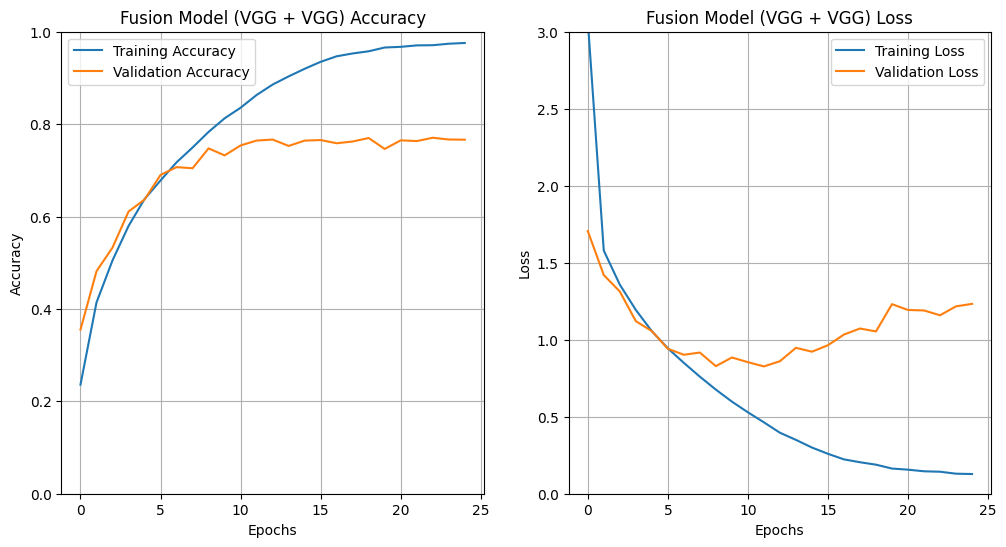

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Evaluation Metrics:
Train - Accuracy: 0.98, F1 Score: 0.98, ROC-AUC: 1.00
Validation - Accuracy: 0.77, F1 Score: 0.77, ROC-AUC: 0.97
Test - Accuracy: 0.76, F1 Score: 0.76, ROC-AUC: 0.97


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + VGG)
def build_fusion_model_vgg_vgg(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two VGG backbones
    vgg16_model_1 = build_vgg16(input_shape, num_classes)
    vgg16_model_2 = build_vgg16(input_shape, num_classes)

    # Define inputs
    input_vgg1 = Input(shape=input_shape)
    input_vgg2 = Input(shape=input_shape)

    # Extract embeddings
    vgg_features_1 = vgg16_model_1(input_vgg1)
    vgg_features_2 = vgg16_model_2(input_vgg2)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features_1, vgg_features_2])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg1, input_vgg2], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model_vgg_vgg = build_fusion_model_vgg_vgg((32, 32, 3), 10)
fusion_model_vgg_vgg.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history_vgg_vgg = fusion_model_vgg_vgg.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history_vgg_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history_vgg_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model (VGG + VGG) Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history_vgg_vgg.history['loss'], label='Training Loss')
plt.plot(fusion_history_vgg_vgg.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model (VGG + VGG) Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model_vgg_vgg, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.2021 - loss: 2.0843 - val_accuracy: 0.3364 - val_loss: 1.6777
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.3463 - loss: 1.6523 - val_accuracy: 0.4240 - val_loss: 1.5029
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.4267 - loss: 1.4884 - val_accuracy: 0.4817 - val_loss: 1.3814
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.4913 - loss: 1.3403 - val_accuracy: 0.5248 - val_loss: 1.2734
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.5397 - loss: 1.2355 - val_accuracy: 0.5448 - val_loss: 1.2212
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5644 - loss: 1.1636 - val_accuracy: 0.5805 - val_loss: 1.1523
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.5998 - loss: 1.0855 - val_accuracy: 0.5967 - val_loss: 1.0882
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6168 -

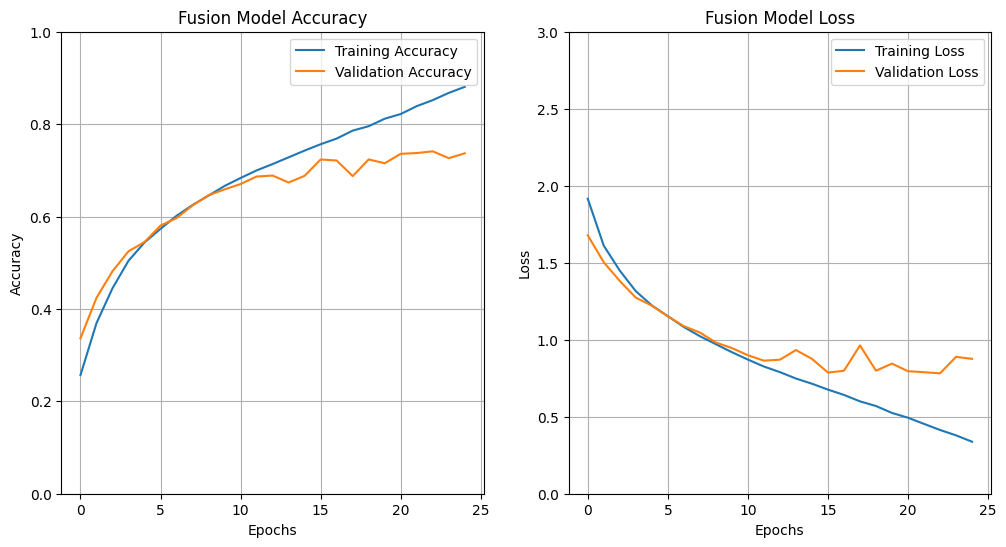

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.89, F1 Score: 0.88, ROC-AUC: 0.99
Validation - Accuracy: 0.74, F1 Score: 0.73, ROC-AUC: 0.97
Test - Accuracy: 0.74, F1 Score: 0.73, ROC-AUC: 0.96


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Define Fusion Model (VGG + ResNet)
def build_fusion_model_resnet(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    resnet_model1 = build_resnet(input_shape, num_classes)
    resnet_model2 = build_resnet(input_shape, num_classes)

    # Define inputs
    input_resnet1 = Input(shape=input_shape)
    input_resnet2 = Input(shape=input_shape)

    # Extract embeddings
    resnet_features1 = resnet_model1(input_resnet1)
    resnet_features2 = resnet_model2(input_resnet2)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([resnet_features1, resnet_features2])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_resnet1,input_resnet2], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_resnet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history_resnet = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history_resnet.history['loss'], label='Training Loss')
plt.plot(fusion_history_resnet.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - accuracy: 0.1773 - loss: 2.1316 - val_accuracy: 0.3095 - val_loss: 1.7699
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3268 - loss: 1.7253 - val_accuracy: 0.3658 - val_loss: 1.6303
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3715 - loss: 1.6148 - val_accuracy: 0.3690 - val_loss: 1.6703
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3943 - loss: 1.5537 - val_accuracy: 0.4301 - val_loss: 1.4915
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4277 - loss: 1.4850 - val_accuracy: 0.4676 - val_loss: 1.4024
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4671 - loss: 1.4046 - val_accuracy: 0.4828 - val_loss: 1.3839
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4898 - loss: 1.3506 - val_accuracy: 0.5275 - val_loss: 1.2647
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5146 - 

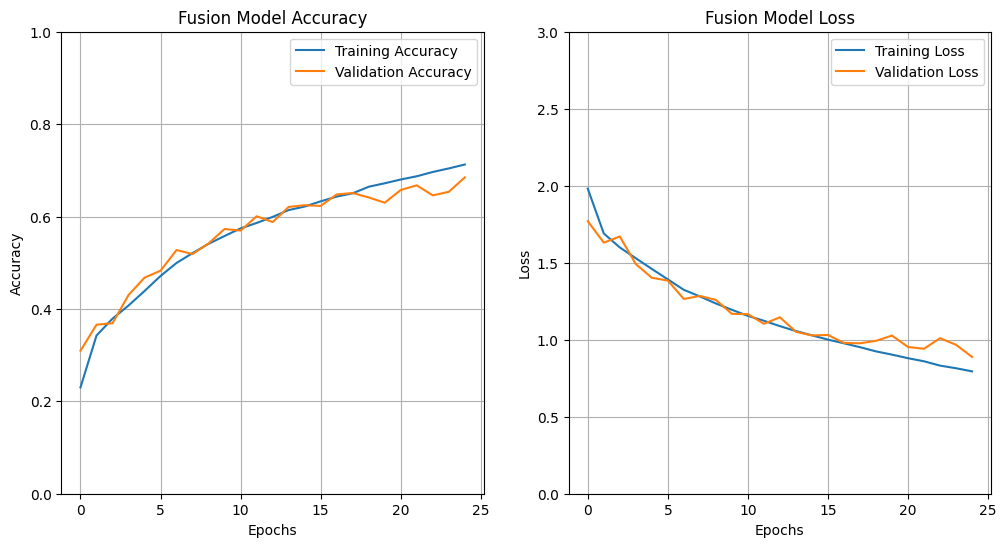

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Evaluation Metrics:
Train - Accuracy: 0.74, F1 Score: 0.73, ROC-AUC: 0.97
Validation - Accuracy: 0.68, F1 Score: 0.68, ROC-AUC: 0.95
Test - Accuracy: 0.68, F1 Score: 0.68, ROC-AUC: 0.95


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)


# Define Fusion Model (VGG + ResNet)
def build_fusion_model_googlenet(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    googlenet_model1 = build_googlenet(input_shape, num_classes)
    googlenet_model2 = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_googlenet1 = Input(shape=input_shape)
    input_googlenet2 = Input(shape=input_shape)

    # Extract embeddings
    googlenet_features1 = googlenet_model1(input_googlenet1)
    googlenet_features2 = googlenet_model2(input_googlenet2)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([googlenet_features1, googlenet_features2])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_googlenet1,input_googlenet2], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_googlenet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history_googlenet = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history_googlenet.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history_googlenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history_googlenet.history['loss'], label='Training Loss')
plt.plot(fusion_history_googlenet.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)
